In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
import warnings
warnings.filterwarnings('ignore')

# <font color='blue'>For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.</font>

## <font color='blue'>Please do perform the following questions on each of these two data sets separately.</font>

## <font color='blue'>1. Read the data as an appropriate Time Series data and plot the data.</font>

### <font color='violet'>- Sparkling Dataset</font>

In [2]:
# Lets read the Sparkling.csv and check the head of records
df1 = pd.read_csv('Sparkling.csv')
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [3]:
# Lets check the tail of records
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [4]:
# We can see that the data is monthly sales of Sparkling wine from Jan,1980 to July, 1995. Lets create a monthly date series
# for the mentioned time period and add to the dataframe.
date = pd.date_range('1980-01-01',periods=len(df1),freq='M')
df1['Time_Series'] = date
df1.head()

YearMonth  Sparkling Time_Series
0   1980-01       1686  1980-01-31
1   1980-02       1591  1980-02-29
2   1980-03       2304  1980-03-31
3   1980-04       1712  1980-04-30
4   1980-05       1471  1980-05-31

In [5]:
# Lets make the Time_Series column as index and drop the YearMonth column
df1.drop('YearMonth',axis = 1, inplace=True)
df1.set_index('Time_Series',inplace=True)
df1.head()

Sparkling
Time_Series           
1980-01-31        1686
1980-02-29        1591
1980-03-31        2304
1980-04-30        1712
1980-05-31        1471

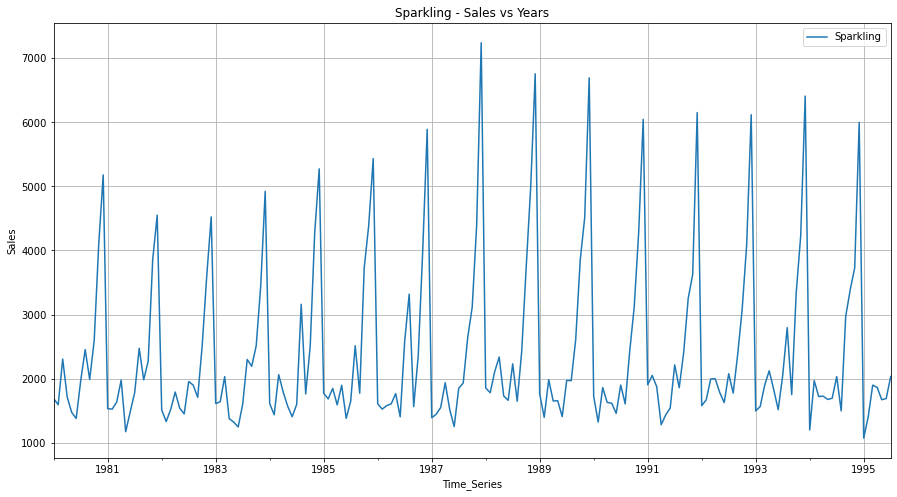

In [6]:
# Now lets plot the data.
df1.plot(grid=True);
plt.ylabel('Sales');
plt.title('Sparkling - Sales vs Years');

### <font color='violet'>- Rose Dataset</font>

In [7]:
# Lets read the Rose.csv and check the head of records
df2 = pd.read_csv('Rose.csv')
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [8]:
# Lets check the tail of records
df2.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [9]:
# We can see that the data is monthly sales of Sparkling wine from Jan,1980 to July, 1995. Lets create a monthly date series
# for the mentioned time period and add to the dataframe.
date = pd.date_range('1980-01-01',periods=len(df2),freq='M')
df2['Time_Series'] = date
df2.head()

YearMonth   Rose Time_Series
0   1980-01  112.0  1980-01-31
1   1980-02  118.0  1980-02-29
2   1980-03  129.0  1980-03-31
3   1980-04   99.0  1980-04-30
4   1980-05  116.0  1980-05-31

In [10]:
# Lets make the Time_Series column as index and drop the YearMonth column
df2.drop('YearMonth',axis = 1, inplace=True)
df2.set_index('Time_Series',inplace=True)
df2.head()

Rose
Time_Series       
1980-01-31   112.0
1980-02-29   118.0
1980-03-31   129.0
1980-04-30    99.0
1980-05-31   116.0

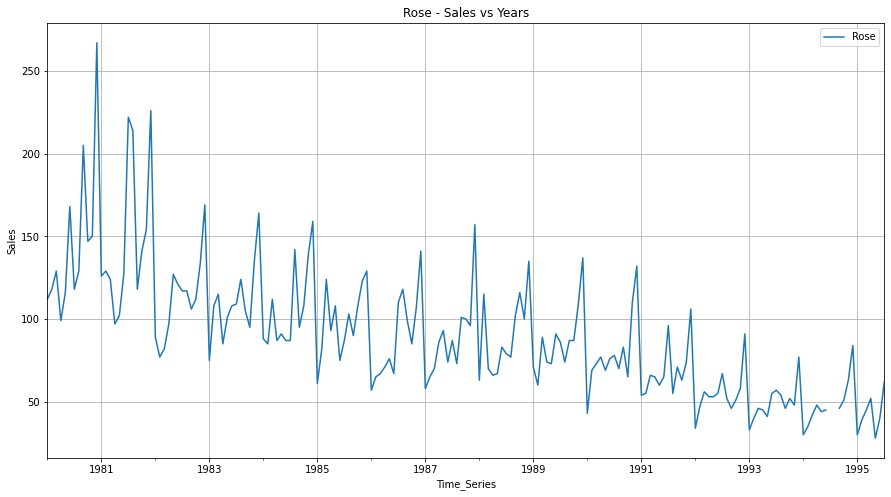

In [11]:
# Now lets plot the data.
df2.plot(grid=True);
plt.ylabel('Sales');
plt.title('Rose - Sales vs Years');

## <font color='blue'>2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</font>

### <font color='violet'>- Sparkling Dataset</font>

In [12]:
# Lets look at the concise summary of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [13]:
# Lets look at the detail summary of the data
df1_desc = pd.DataFrame(df1.describe().T)
df1_desc

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [14]:
# lets calculate the range, inter quartile information
df1_desc['Range'] = df1_desc['max'] - df1_desc['min']
df1_desc['IQR']   = df1_desc['75%'] - df1_desc['25%']
df1_desc['Qmin']  = np.where((df1_desc['25%'] - 1.5 * df1_desc['IQR']) > df1_desc['min'], 
                              (df1_desc['25%'] - 1.5 * df1_desc['IQR']), df1_desc['min'])
df1_desc['Qmax']  = np.where((df1_desc['75%'] + 1.5 * df1_desc['IQR']) < df1_desc['max'], 
                              (df1_desc['75%'] + 1.5 * df1_desc['IQR']), df1_desc['max'])
df1_desc

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max   Range    IQR    Qmin    Qmax  
Sparkling  7242.0  6172.0  944.0  1070.0  3965.0

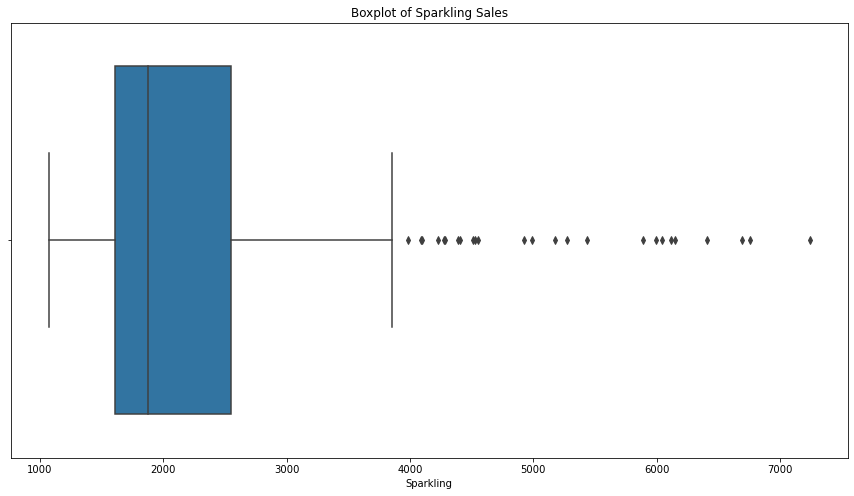

In [15]:
# Lets plot the bocplot of the data
sns.boxplot(x=df1['Sparkling']);
plt.title('Boxplot of Sparkling Sales');

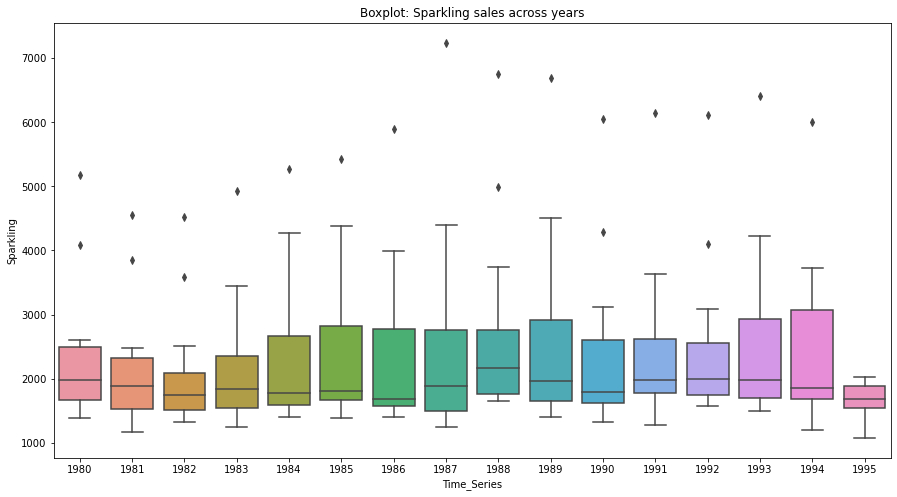

In [16]:
# Lets plot a boxplot to understand the sales across years.
sns.boxplot(x = df1.index.year,y = df1['Sparkling']);
plt.title('Boxplot: Sparkling sales across years');

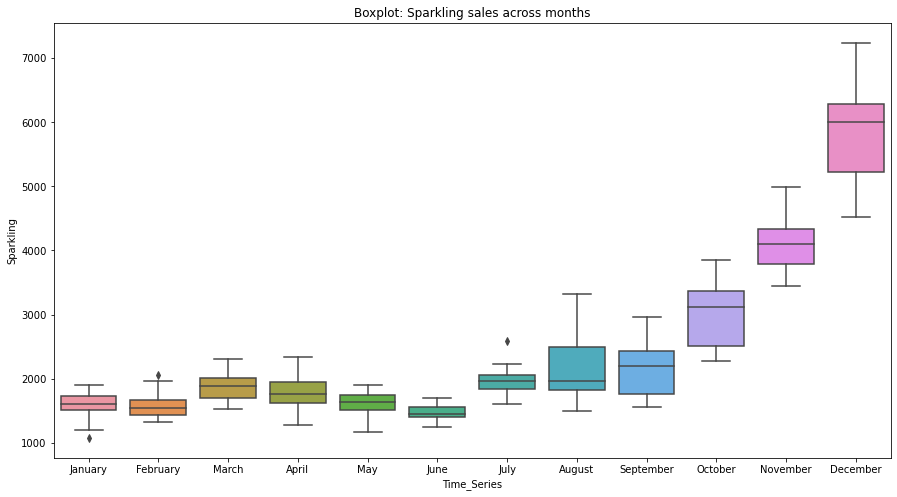

In [17]:
# Lets plot a boxplot to understand how the sales varies across months.
sns.boxplot(x = df1.index.month_name(),y = df1['Sparkling']);
plt.title('Boxplot: Sparkling sales across months');

In [18]:
# Lets plot a graph of monthly sales across years.
df1_mth_pivot = pd.pivot_table(df1,index = df1.index.year,columns = df1.index.month_name(),values ='Sparkling')
df1_mth_pivot

Time_Series   April  August  December  February  January    July    June  \
Time_Series                                                                
1980         1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981         1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982         1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983         1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984         1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985         1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986         1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987         1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988         2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989         1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990         1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991         1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992         1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993         2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994         1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995         1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Series   March     May  November  October  September  
Time_Series                                                
1980         2304.0  1471.0    4087.0   2596.0     1984.0  
1981         1633.0  1170.0    3857.0   2273.0     1981.0  
1982         1518.0  1537.0    3593.0   2514.0     1706.0  
1983         2030.0  1320.0    3440.0   2511.0     2191.0  
1984         2061.0  1567.0    4273.0   2504.0     1759.0  
1985         1846.0  1896.0    4388.0   3727.0     1771.0  
1986         1577.0  1765.0    3987.0   2349.0     1562.0  
1987         1548.0  1518.0    4405.0   3114.0     2638.0  
1988         2108.0  1728.0    4988.0   3740.0     2421.0  
1989         1982.0  1654.0    4514.0   3845.0     2608.0  
1990         1859.0  1615.0    4286.0   3116.0     2424.0  
1991         1874.0  1432.0    3627.0   3252.0     2408.0  
1992         1993.0  1783.0    4096.0   3088.0     2377.0  
1993         1898.0  1831.0    4227.0   3339.0     1749.0  
1994         1720.0  1674.0    3729.0   3385.0     2968.0  
1995         1897.0  1670.0       NaN      NaN        NaN

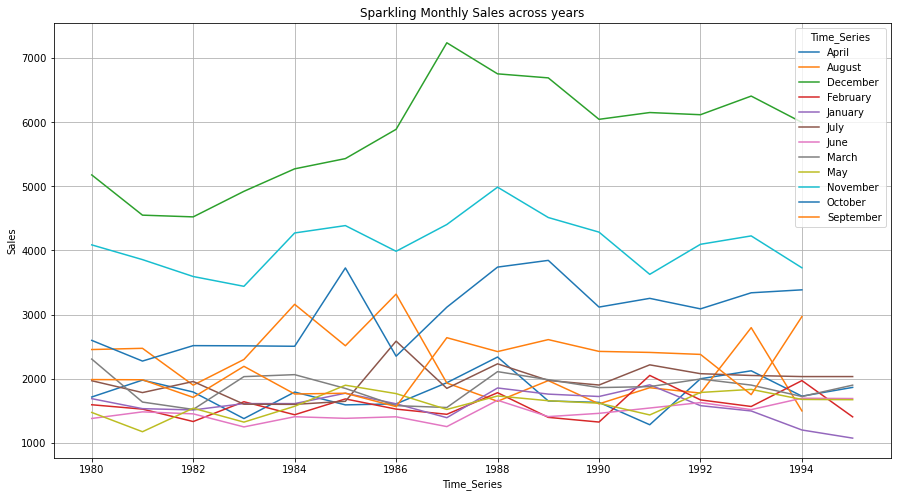

In [19]:
#Lets plot the graph
df1_mth_pivot.plot();
plt.grid(True);
plt.ylabel('Sales');
plt.title('Sparkling Monthly Sales across years');

In [20]:
# Lets plot a graph of the average and percentage change of Sales across years.
df1_avg = df1.groupby(df1.index)['Sparkling'].mean()
df1_pct_chg = df1.groupby(df1.index)['Sparkling'].sum().pct_change()

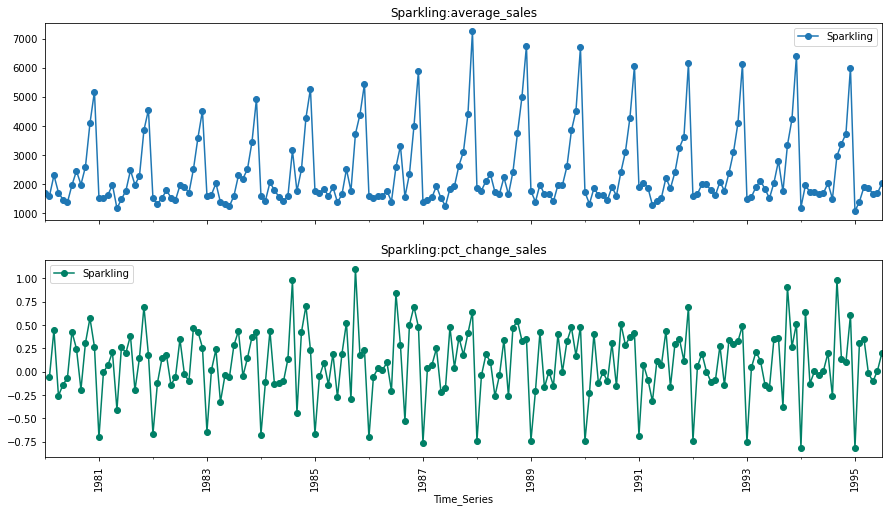

In [21]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = df1_avg.plot(legend=True,ax=axis1,marker='o',title="Sparkling:average_sales")

ax1.set_xticks(range(len(df1_avg)))
ax1.set_xticklabels(df1_avg.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = df1_pct_chg.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sparkling:pct_change_sales")

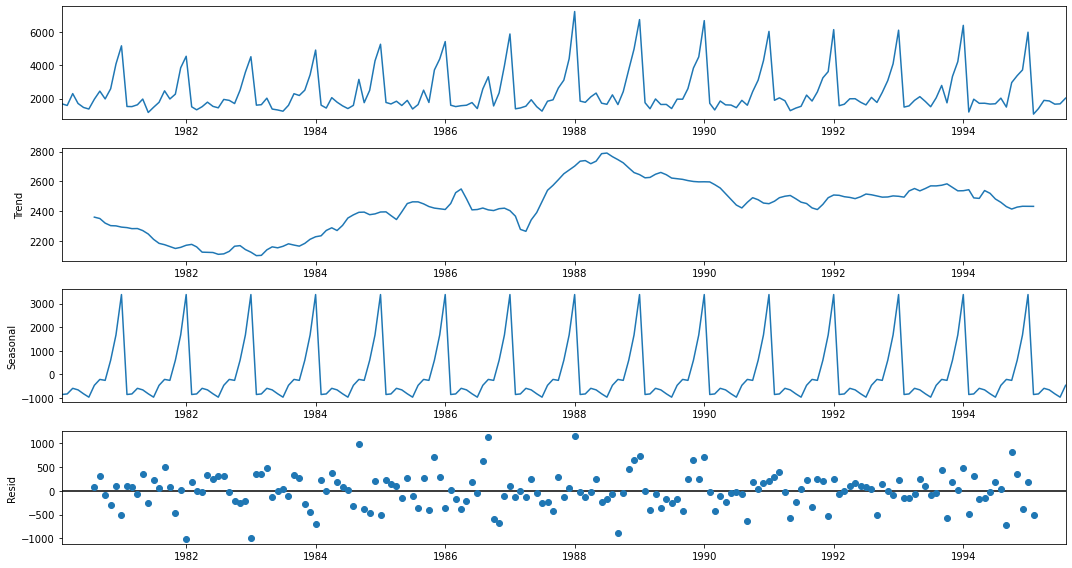

In [22]:
# Let us decompose the time series and understand the components - additive decomposition
df1_decompose = seasonal_decompose(df1,model = 'additive');
df1_decompose.plot();

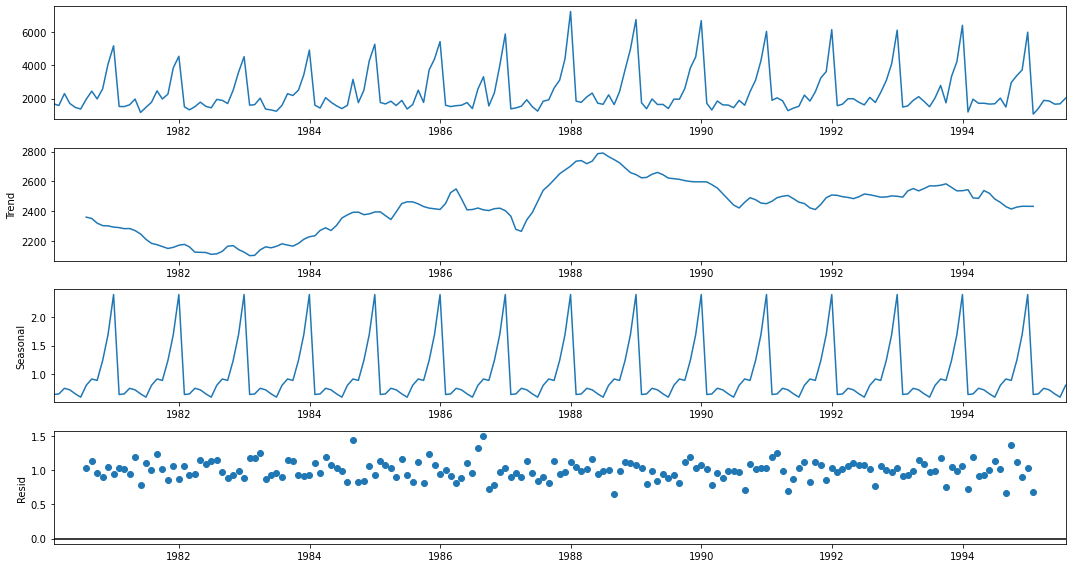

In [23]:
# Let us decompose the time series and understand the components - multiplicative decomposition
df1_decompose = seasonal_decompose(df1,model = 'multiplicative');
df1_decompose.plot();

### <font color='violet'>- Rose Dataset</font>

In [24]:
# Lets look at the concise summary of the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [25]:
# Lets check the null values in the dataset
df2[df2['Rose'].isnull()]

Rose
Time_Series      
1994-07-31    NaN
1994-08-31    NaN

In [26]:
# Lets check the year 1994
df2.loc['1994']

Rose
Time_Series      
1994-01-31   30.0
1994-02-28   35.0
1994-03-31   42.0
1994-04-30   48.0
1994-05-31   44.0
1994-06-30   45.0
1994-07-31    NaN
1994-08-31    NaN
1994-09-30   46.0
1994-10-31   51.0
1994-11-30   63.0
1994-12-31   84.0

In [27]:
# Lets impute the null values with Linear interpolation
df2['Rose'] = round(df2['Rose'].interpolate(),1)
df2.loc['1994']

Rose
Time_Series      
1994-01-31   30.0
1994-02-28   35.0
1994-03-31   42.0
1994-04-30   48.0
1994-05-31   44.0
1994-06-30   45.0
1994-07-31   45.3
1994-08-31   45.7
1994-09-30   46.0
1994-10-31   51.0
1994-11-30   63.0
1994-12-31   84.0

In [28]:
# Lets look at the detail summary of the data
df2_desc = pd.DataFrame(df2.describe().T)
df2_desc

count       mean        std   min   25%   50%    75%    max
Rose  187.0  89.914439  39.238327  28.0  62.5  85.0  111.0  267.0

In [29]:
# lets calculate the range, inter quartile information
df2_desc['Range'] = df2_desc['max'] - df2_desc['min']
df2_desc['IQR']   = df2_desc['75%'] - df2_desc['25%']
df2_desc['Qmin']  = np.where((df2_desc['25%'] - 1.5 * df2_desc['IQR']) > df2_desc['min'], 
                              (df2_desc['25%'] - 1.5 * df2_desc['IQR']), df2_desc['min'])
df2_desc['Qmax']  = np.where((df2_desc['75%'] + 1.5 * df2_desc['IQR']) < df2_desc['max'], 
                              (df2_desc['75%'] + 1.5 * df2_desc['IQR']), df2_desc['max'])
df2_desc

count       mean        std   min   25%   50%    75%    max  Range  \
Rose  187.0  89.914439  39.238327  28.0  62.5  85.0  111.0  267.0  239.0   

       IQR  Qmin    Qmax  
Rose  48.5  28.0  183.75

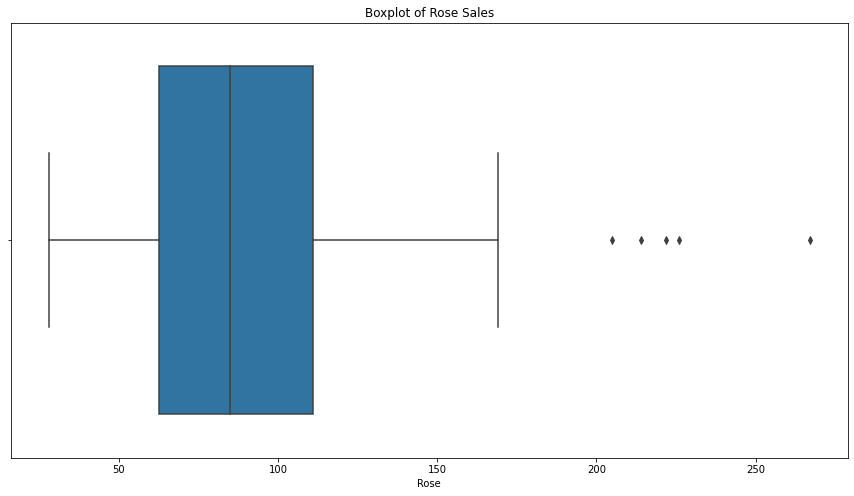

In [30]:
# Lets plot the bocplot of the data
sns.boxplot(x=df2['Rose']);
plt.title('Boxplot of Rose Sales');

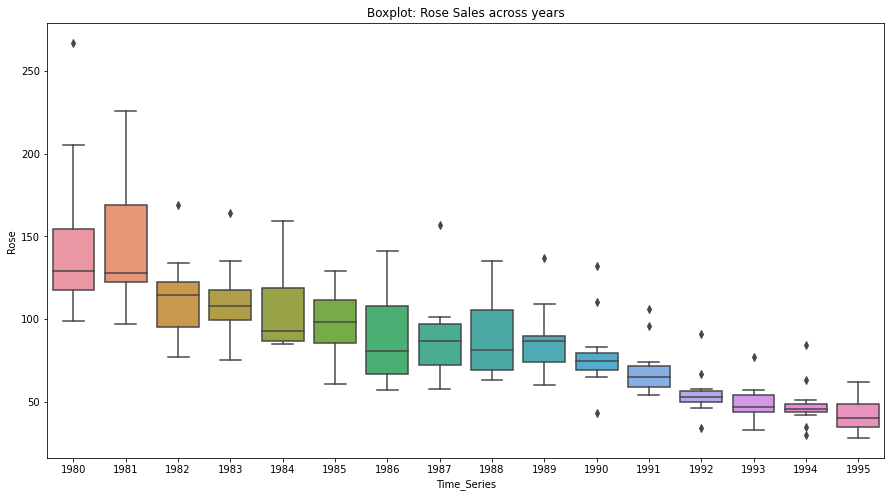

In [31]:
# Lets plot a boxplot to understand the sales across years.
sns.boxplot(x = df2.index.year,y = df2['Rose']);
plt.title('Boxplot: Rose Sales across years');

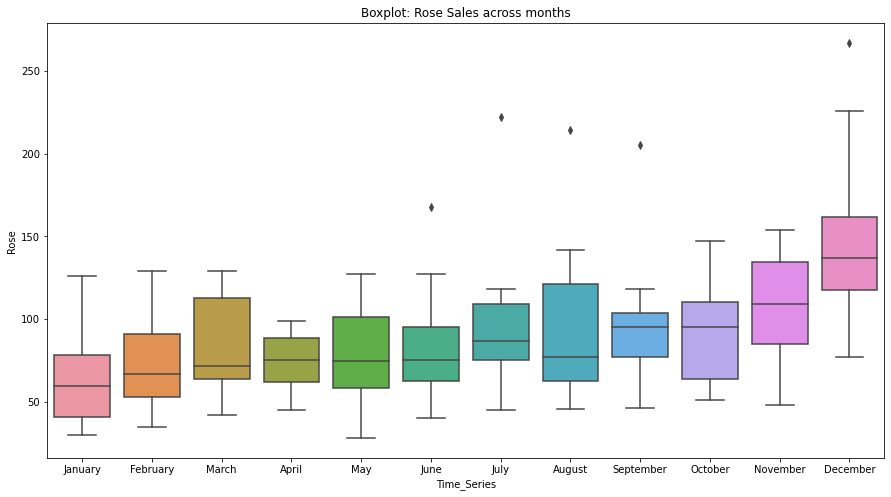

In [32]:
# Lets plot a boxplot to understand how the sales varies across months.
sns.boxplot(x = df2.index.month_name(),y = df2['Rose']);
plt.title('Boxplot: Rose Sales across months');

In [33]:
# Lets plot a graph of monthly sales across years.
df2_mth_pivot = pd.pivot_table(df2,index = df2.index.year,columns = df2.index.month_name(),values ='Rose')
df2_mth_pivot

Time_Series  April  August  December  February  January   July   June  March  \
Time_Series                                                                    
1980          99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981          97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982          97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983          85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984          87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985          93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986          71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987          86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988          66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989          74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990          77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991          65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992          53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993          45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994          48.0    45.7      84.0      35.0     30.0   45.3   45.0   42.0   
1995          52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

Time_Series    May  November  October  September  
Time_Series                                       
1980         116.0     150.0    147.0      205.0  
1981         102.0     154.0    141.0      118.0  
1982         127.0     134.0    112.0      106.0  
1983         101.0     135.0     95.0      105.0  
1984          91.0     139.0    108.0       95.0  
1985         108.0     123.0    108.0       90.0  
1986          76.0     107.0     85.0       99.0  
1987          93.0      96.0    100.0      101.0  
1988          67.0     100.0    116.0      102.0  
1989          73.0     109.0     87.0       87.0  
1990          69.0     110.0     65.0       83.0  
1991          60.0      74.0     63.0       71.0  
1992          53.0      58.0     51.0       46.0  
1993          41.0      48.0     52.0       46.0  
1994          44.0      63.0     51.0       46.0  
1995          28.0       NaN      NaN        NaN

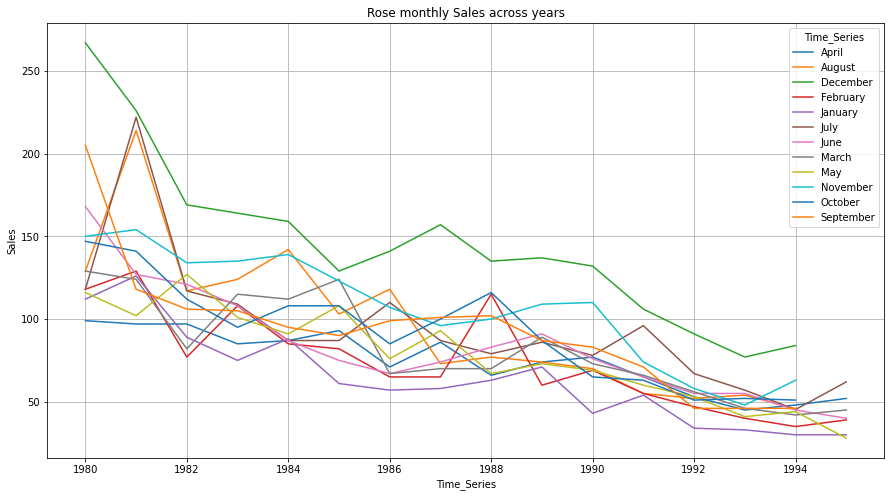

In [34]:
#Lets plot the graph
df2_mth_pivot.plot();
plt.grid(True);
plt.ylabel('Sales');
plt.title('Rose monthly Sales across years');

In [35]:
# Lets plot a graph of the average and percentage change of Sales across years.
df2_avg = df2.groupby(df2.index)['Rose'].mean()
df2_pct_chg = df2.groupby(df2.index)['Rose'].sum().pct_change()

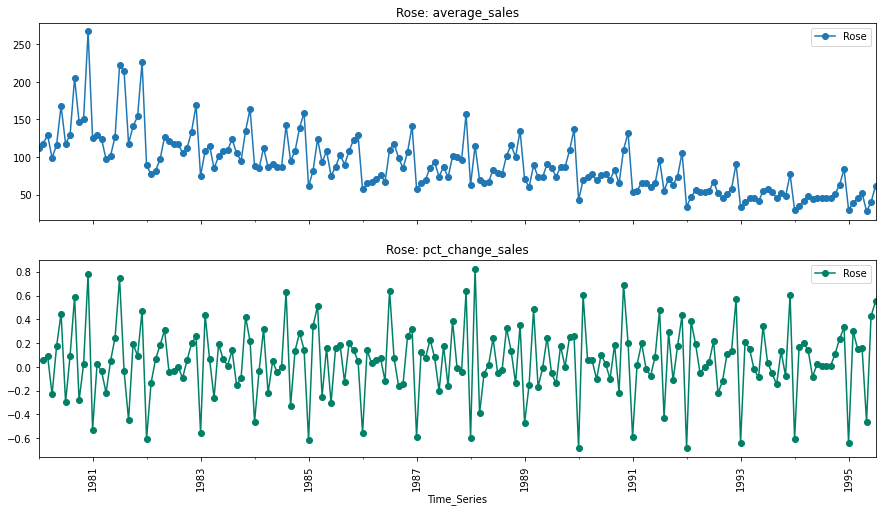

In [36]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = df2_avg.plot(legend=True,ax=axis1,marker='o',title="Rose: average_sales")

ax1.set_xticks(range(len(df2_avg)))
ax1.set_xticklabels(df2_avg.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = df2_pct_chg.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Rose: pct_change_sales")

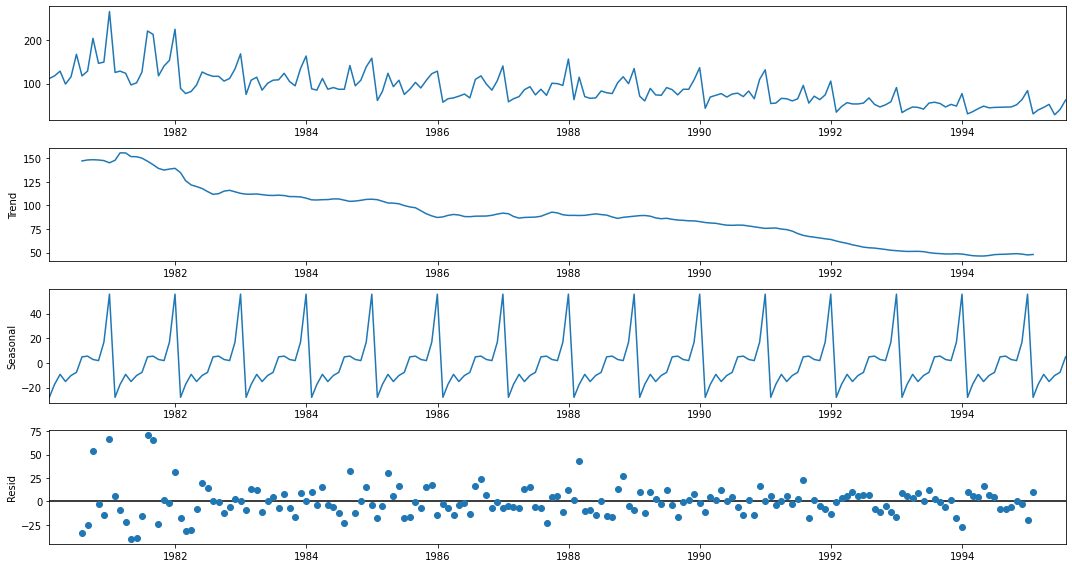

In [37]:
# Let us decompose the time series and understand the components - additive decomposition
df2_decompose = seasonal_decompose(df2,model = 'additive');
df2_decompose.plot();

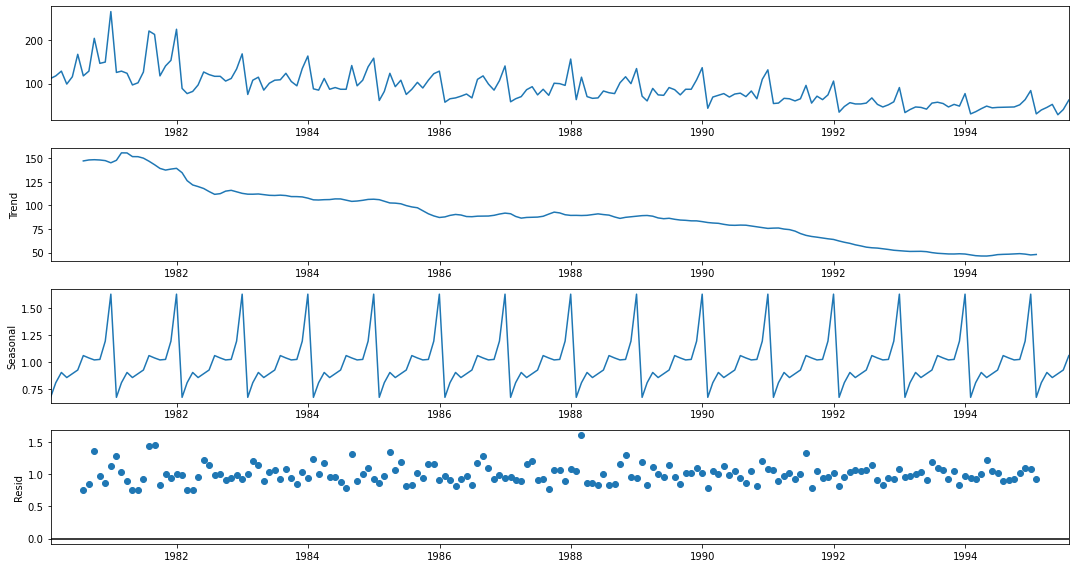

In [38]:
# Let us decompose the time series and understand the components - multiplicative decomposition
df2_decompose = seasonal_decompose(df2,model = 'multiplicative');
df2_decompose.plot();

## <font color='blue'>3. Split the data into training and test. The test data should start in 1991.</font>

### <font color='violet'>- Sparkling Dataset</font>

In [39]:
# Lets split the data into train and test
train_df1 = df1[df1.index.year < 1991]
test_df1  = df1[df1.index.year >= 1991]

In [40]:
# Lets look at the head and tail of  train dataset
print("---Head---")
print(train_df1.head(),'\n')
print("---Tail---")
print(train_df1.tail(),'\n')

---Head---
             Sparkling
Time_Series           
1980-01-31        1686
1980-02-29        1591
1980-03-31        2304
1980-04-30        1712
1980-05-31        1471 

---Tail---
             Sparkling
Time_Series           
1990-08-31        1605
1990-09-30        2424
1990-10-31        3116
1990-11-30        4286
1990-12-31        6047 



In [41]:
# Lets look at the head and tail of  test dataset
print("---Head---")
print(test_df1.head(),'\n')
print("---Tail---")
print(test_df1.tail(),'\n')

---Head---
             Sparkling
Time_Series           
1991-01-31        1902
1991-02-28        2049
1991-03-31        1874
1991-04-30        1279
1991-05-31        1432 

---Tail---
             Sparkling
Time_Series           
1995-03-31        1897
1995-04-30        1862
1995-05-31        1670
1995-06-30        1688
1995-07-31        2031 



In [42]:
# Lets look at the number of records in train & test
print("Shape of train dataset for Sparkling is {}".format(train_df1.shape))
print("Shape of test dataset for Sparkling is {}".format(test_df1.shape))

Shape of train dataset for Sparkling is (132, 1)
Shape of test dataset for Sparkling is (55, 1)


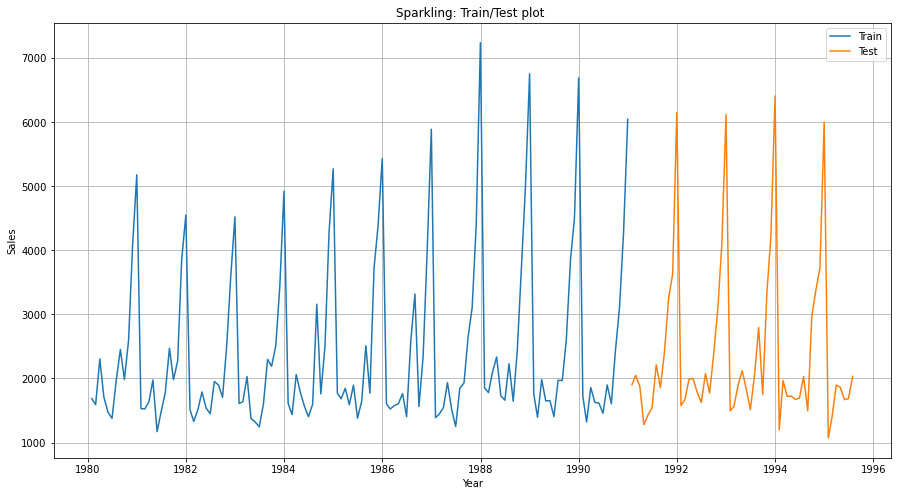

In [43]:
# Lets plot the train and test dataset
plt.plot(train_df1,label = 'Train');
plt.plot(test_df1,label = 'Test');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: Train/Test plot ');
plt.legend(loc='best');

### <font color='violet'>- Rose Dataset</font>

In [44]:
# Lets split the data into train and test
train_df2 = df2[df2.index.year < 1991]
test_df2  = df2[df2.index.year >= 1991]

In [45]:
# Lets look at the head and tail of  train dataset
print("---Head---")
print(train_df2.head(),'\n')
print("---Tail---")
print(train_df2.tail(),'\n')

---Head---
              Rose
Time_Series       
1980-01-31   112.0
1980-02-29   118.0
1980-03-31   129.0
1980-04-30    99.0
1980-05-31   116.0 

---Tail---
              Rose
Time_Series       
1990-08-31    70.0
1990-09-30    83.0
1990-10-31    65.0
1990-11-30   110.0
1990-12-31   132.0 



In [46]:
# Lets look at the head and tail of  test dataset
print("---Head---")
print(test_df2.head(),'\n')
print("---Tail---")
print(test_df2.tail(),'\n')

---Head---
             Rose
Time_Series      
1991-01-31   54.0
1991-02-28   55.0
1991-03-31   66.0
1991-04-30   65.0
1991-05-31   60.0 

---Tail---
             Rose
Time_Series      
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0 



In [47]:
# Lets look at the number of records in train & test
print("Shape of train dataset for Rose is {}".format(train_df2.shape))
print("Shape of test dataset for Rose is {}".format(test_df2.shape))

Shape of train dataset for Rose is (132, 1)
Shape of test dataset for Rose is (55, 1)


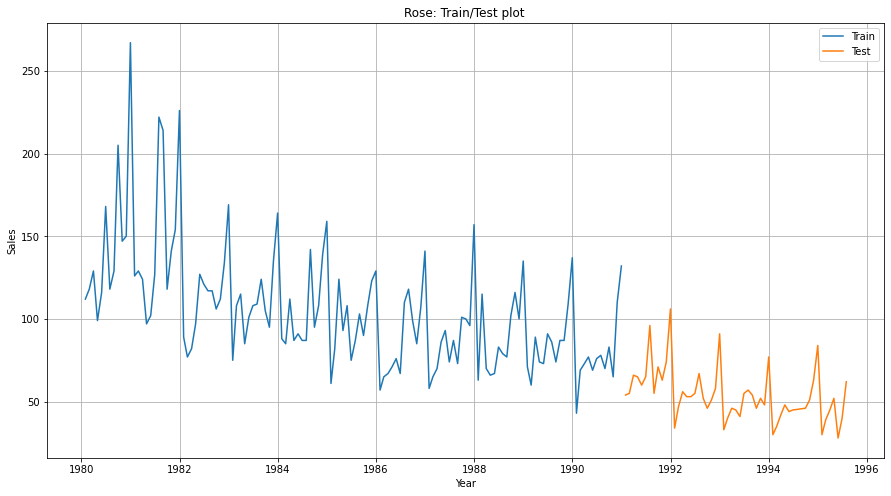

In [48]:
# Lets plot the train and test dataset
plt.plot(train_df2,label = 'Train');
plt.plot(test_df2,label = 'Test');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: Train/Test plot ');
plt.legend(loc='best');

## <font color='blue'>4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.</font>

### We will perform each of the models on both the datasets and evaluate the model using RMSE

In [49]:
# Lets create a dataset for each wine sales data to store the results of all the test RMSE values of different models.
results_df1 = pd.DataFrame(columns = {'Test_RMSE'})
results_df2 = pd.DataFrame(columns = {'Test_RMSE'})
results_df1

Empty DataFrame
Columns: [Test_RMSE]
Index: []

### 4.1 Simple Exponential Smoothing

### <font color='violet'> ---- Sparkling Dataset</font>

In [50]:
# First we will apply simple exponential smoothing in optimized mode and find the alpha thus determined.
model_SES = SimpleExpSmoothing(train_df1['Sparkling']);
model_SES_autofit = model_SES.fit(optimized=True);

In [51]:
# Lets look at the parameters of the autofitted model
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
# Lets store the SES results in a dataframe
results_SES = pd.DataFrame(columns = {'Test_RMSE'})
results_SES

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [53]:
# Lets predict the test dataset values based on the autofitted model
test_df1_SES = test_df1.copy()
test_df1_SES['Predict'] = model_SES_autofit.forecast(steps = len(test_df1))
test_df1_SES.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  2724.932624
1991-02-28        2049  2724.932624
1991-03-31        1874  2724.932624
1991-04-30        1279  2724.932624
1991-05-31        1432  2724.932624

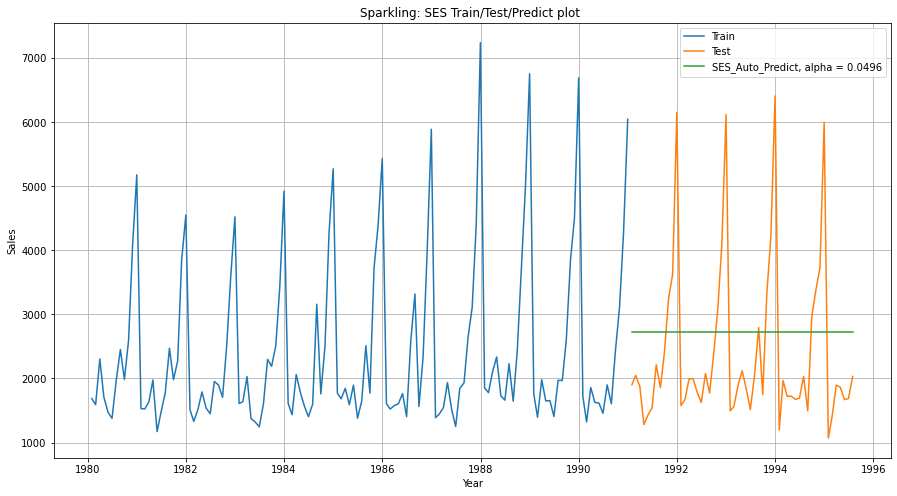

In [54]:
# Lets plot the train test and predicted values
# Lets plot the train and test dataset
plt.plot(train_df1,label = 'Train');
plt.plot(test_df1,label = 'Test');
plt.plot(test_df1_SES['Predict'],label = 'SES_Auto_Predict, alpha = 0.0496');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: SES Train/Test/Predict plot ');
plt.legend(loc='best');

In [55]:
# Lets calculate the test RMSE value for the above autofitted model and store into the results_SES dataset
model_SES_autofit_RMSE = mean_squared_error(test_df1['Sparkling'],test_df1_SES['Predict'],squared=False)
print("RMSE value on test dataset for SES autofit model is {}".format(model_SES_autofit_RMSE))

RMSE value on test dataset for SES autofit model is 1316.0354872762928


In [56]:
# Lets store the parameter and RMSE value into results_SES
results_SES_df1 = pd.DataFrame({'Test_RMSE' : model_SES_autofit_RMSE}, index = ['alpha=0.0496'])
results_SES = pd.concat([results_SES,results_SES_df1])
results_SES

Test_RMSE
alpha=0.0496  1316.035487

In [57]:
# Next we will run a loop with different alpha values to understand which particular value works best for alpha on the test 
# set based on RMSE values
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_predict = model_SES_alpha_i.forecast(len(test_df1))
    
    model_SES_RMSE = mean_squared_error(test_df1['Sparkling'],SES_predict,squared=False)
    results_SES_df1 = pd.DataFrame({'Test_RMSE' : model_SES_RMSE}, index = ['alpha='+str(round(i,1))])
    results_SES = pd.concat([results_SES,results_SES_df1])
    
results_SES

Test_RMSE
alpha=0.0496  1316.035487
alpha=0.1     1375.393398
alpha=0.2     1595.206839
alpha=0.3     1935.507132
alpha=0.4     2311.919615
alpha=0.5     2666.351413
alpha=0.6     2979.204388
alpha=0.7     3249.944092
alpha=0.8     3483.801006
alpha=0.9     3686.794285

In [58]:
# Lets see the best value of alpha based on least RMSE value
results_SES.sort_values('Test_RMSE')

Test_RMSE
alpha=0.0496  1316.035487
alpha=0.1     1375.393398
alpha=0.2     1595.206839
alpha=0.3     1935.507132
alpha=0.4     2311.919615
alpha=0.5     2666.351413
alpha=0.6     2979.204388
alpha=0.7     3249.944092
alpha=0.8     3483.801006
alpha=0.9     3686.794285

In [59]:
# We can see that alpha = 0.0496 hast the least RMSE vaue for test dataset. Lets store this alpha in the overall results.
results_SES_final = pd.DataFrame({'Test_RMSE': results_SES.Test_RMSE.sort_values()[0]},
                                index = ['alpha=0.0496_SimpleExponentialSmoothing'])
results_df1 = pd.concat([results_df1,results_SES_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing  1316.035487

### <font color='violet'> ---- Rose Dataset</font>

In [60]:
# First we will apply simple exponential smoothing in optimized mode and find the alpha thus determined.
model_SES = SimpleExpSmoothing(train_df2['Rose']);
model_SES_autofit = model_SES.fit(optimized=True);

In [61]:
# Lets look at the parameters of the autofitted model
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
# Lets store the DES results in a dataframe
results_SES = pd.DataFrame(columns = {'Test_RMSE'})
results_SES

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [63]:
# Lets predict the test dataset values based on the autofitted model
test_df2_SES = test_df2.copy()
test_df2_SES['Predict'] = model_SES_autofit.forecast(steps = len(test_df2))
test_df2_SES.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  87.104983
1991-02-28   55.0  87.104983
1991-03-31   66.0  87.104983
1991-04-30   65.0  87.104983
1991-05-31   60.0  87.104983

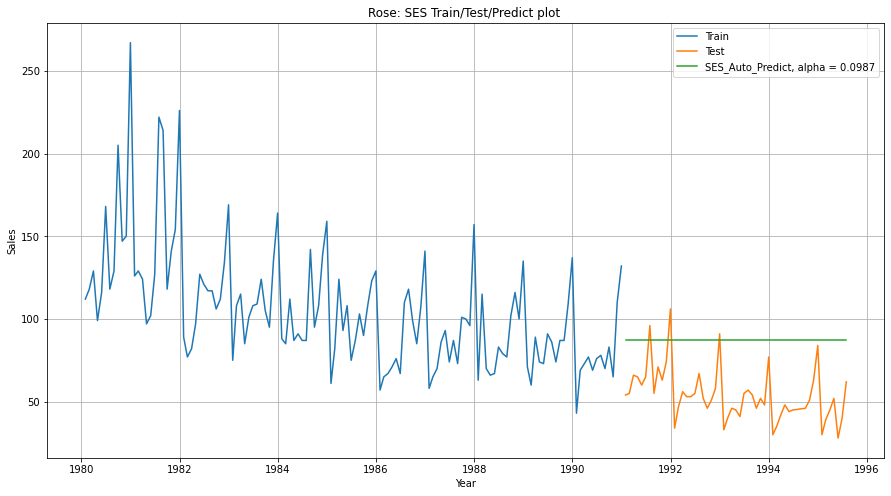

In [64]:
# Lets plot the train test and predicted values
# Lets plot the train and test dataset
plt.plot(train_df2,label = 'Train');
plt.plot(test_df2,label = 'Test');
plt.plot(test_df2_SES['Predict'] ,label = 'SES_Auto_Predict, alpha = 0.0987');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: SES Train/Test/Predict plot ');
plt.legend(loc='best');

In [65]:
# Lets calculate the test RMSE value for the above autofitted model and store into the results_SES dataset
model_SES_autofit_RMSE = mean_squared_error(test_df2['Rose'],test_df2_SES['Predict'],squared=False)
print("RMSE value on test dataset for SES autofit model is {}".format(model_SES_autofit_RMSE))

RMSE value on test dataset for SES autofit model is 36.79623342215522


In [66]:
# Lets store the parameter and RMSE value into results_SES
results_SES_df2 = pd.DataFrame({'Test_RMSE' : model_SES_autofit_RMSE}, index = ['alpha=0.0987'])
results_SES = pd.concat([results_SES,results_SES_df2])
results_SES

Test_RMSE
alpha=0.0987  36.796233

In [67]:
# Next we will run a loop with different alpha values to understand which particular value works best for alpha on the test 
# set based on RMSE values
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_predict = model_SES_alpha_i.forecast(len(test_df2))
    
    model_SES_RMSE = mean_squared_error(test_df2['Rose'],SES_predict,squared=False)
    results_SES_df2 = pd.DataFrame({'Test_RMSE' : model_SES_RMSE}, index = ['alpha='+str(round(i,1))])
    results_SES = pd.concat([results_SES,results_SES_df2])
    
results_SES

Test_RMSE
alpha=0.0987  36.796233
alpha=0.1     36.828039
alpha=0.2     41.361882
alpha=0.3     47.504826
alpha=0.4     53.767410
alpha=0.5     59.641789
alpha=0.6     64.971291
alpha=0.7     69.698165
alpha=0.8     73.773995
alpha=0.9     77.139279

In [68]:
# Lets see the best value of alpha based on least RMSE value
results_SES.sort_values('Test_RMSE')

Test_RMSE
alpha=0.0987  36.796233
alpha=0.1     36.828039
alpha=0.2     41.361882
alpha=0.3     47.504826
alpha=0.4     53.767410
alpha=0.5     59.641789
alpha=0.6     64.971291
alpha=0.7     69.698165
alpha=0.8     73.773995
alpha=0.9     77.139279

In [69]:
# We can see that alpha = 0.0987 hast the least RMSE vaue for test dataset. Lets store this alpha in the overall results.
results_SES_final = pd.DataFrame({'Test_RMSE': results_SES.Test_RMSE.sort_values()[0]},
                                index = ['alpha=0.0987_SimpleExponentialSmoothing'])
results_df2 = pd.concat([results_df2,results_SES_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing  36.796233

### 4.2 Double Exponential Smoothing

### <font color='violet'> ---- Sparkling Dataset</font>

In [70]:
# First we will apply double exponential smoothing in optimized mode and find the alpha thus determined.
model_DES = Holt(train_df1['Sparkling']);
model_DES_autofit = model_DES.fit(optimized=True);

In [71]:
# Lets look at the parameters of the autofitted model
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
# Lets store the DES results in a dataframe
results_DES = pd.DataFrame(columns = {'Test_RMSE'})
results_DES

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [73]:
# Lets predict the test dataset values based on the autofitted model
test_df1_DES = test_df1.copy()
test_df1_DES['Predict'] = model_DES_autofit.forecast(steps = len(test_df1))
test_df1_DES.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  5221.278699
1991-02-28        2049  5127.886554
1991-03-31        1874  5034.494409
1991-04-30        1279  4941.102264
1991-05-31        1432  4847.710119

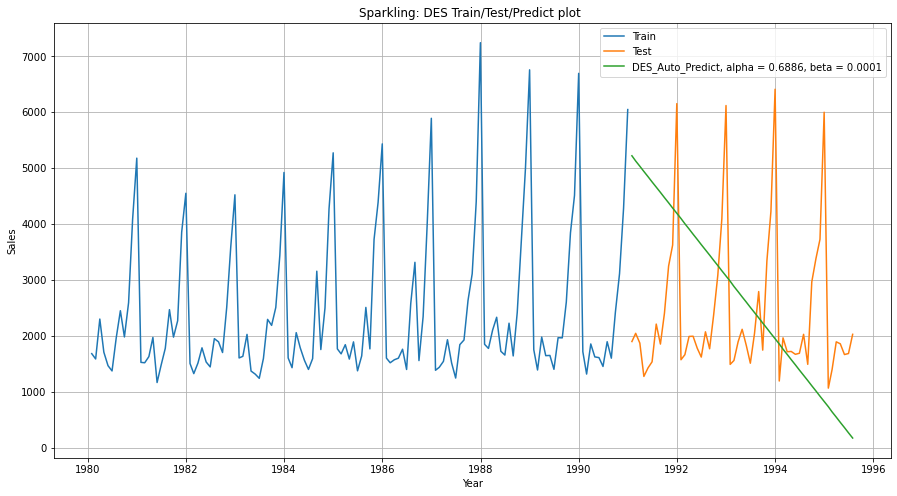

In [74]:
# Lets plot the train test and predicted values
plt.plot(train_df1,label = 'Train');
plt.plot(test_df1,label = 'Test');
plt.plot(test_df1_DES['Predict'],label = 'DES_Auto_Predict, alpha = 0.6886, beta = 0.0001');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: DES Train/Test/Predict plot ');
plt.legend(loc='best');

In [75]:
# Lets calculate the test RMSE value for the above autofitted model and store into the results_DES dataset
model_DES_autofit_RMSE = mean_squared_error(test_df1['Sparkling'],test_df1_DES['Predict'],squared=False)
print("RMSE value on test dataset for DES autofit model is {}".format(model_DES_autofit_RMSE))

RMSE value on test dataset for DES autofit model is 2007.238525758568


In [76]:
# Lets store the parameter and RMSE value into results_SES
results_DES_df1 = pd.DataFrame({'Test_RMSE' : model_DES_autofit_RMSE}, index = ['alpha=0.6886,beta=0.0001'])
results_DES = pd.concat([results_DES,results_DES_df1])
results_DES

Test_RMSE
alpha=0.6886,beta=0.0001  2007.238526

In [77]:
# Next we will run a loop with different alpha and beta values to understand which particular value works best for alpha on 
# the test set based on RMSE values
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_predict = model_DES_alpha_i_j.forecast(steps = len(test_df1))
        
        model_DES_RMSE = mean_squared_error(test_df1['Sparkling'],DES_predict,squared=False)
        
        results_DES_df1 = pd.DataFrame({'Test_RMSE' : model_DES_RMSE},index=['alpha='+str(round(i,1))+',beta='+str(round(j,1))])
        results_DES = pd.concat([results_DES,results_DES_df1])
    
results_DES

Test_RMSE
alpha=0.6886,beta=0.0001   2007.238526
alpha=0.1,beta=0.1         1778.564670
alpha=0.1,beta=0.2         2599.439986
alpha=0.1,beta=0.3         4293.084674
alpha=0.1,beta=0.4         6039.537339
...                                ...
alpha=1.0,beta=0.6        49327.087977
alpha=1.0,beta=0.7        52655.765663
alpha=1.0,beta=0.8        55442.273880
alpha=1.0,beta=0.9        57823.177011
alpha=1.0,beta=1.0        59877.076519

[101 rows x 1 columns]

In [78]:
# Lets see the best value of alpha based on least RMSE value
results_DES.sort_values('Test_RMSE')

Test_RMSE
alpha=0.1,beta=0.1         1778.564670
alpha=0.6886,beta=0.0001   2007.238526
alpha=0.1,beta=0.2         2599.439986
alpha=0.2,beta=0.1         3611.763322
alpha=0.1,beta=0.3         4293.084674
...                                ...
alpha=1.0,beta=0.9        57823.177011
alpha=0.8,beta=1.0        57990.117908
alpha=0.9,beta=1.0        59008.254331
alpha=1.0,beta=1.0        59877.076519
alpha=0.2,beta=1.0        60749.773505

[101 rows x 1 columns]

In [79]:
# We can see that alpha = 0.1 and beta = 0.1 hast the least RMSE vaue for test dataset.
# Lets create the model for this alpha and beta value
model_DES = model_DES.fit(smoothing_level=0.1,smoothing_trend=0.1,optimized=False,use_brute=True)
test_df1_DES = test_df1.copy()
test_df1_DES['Predict'] = model_DES.forecast(steps = len(test_df1))
test_df1_DES.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  2849.235097
1991-02-28        2049  2876.192175
1991-03-31        1874  2903.149252
1991-04-30        1279  2930.106330
1991-05-31        1432  2957.063408

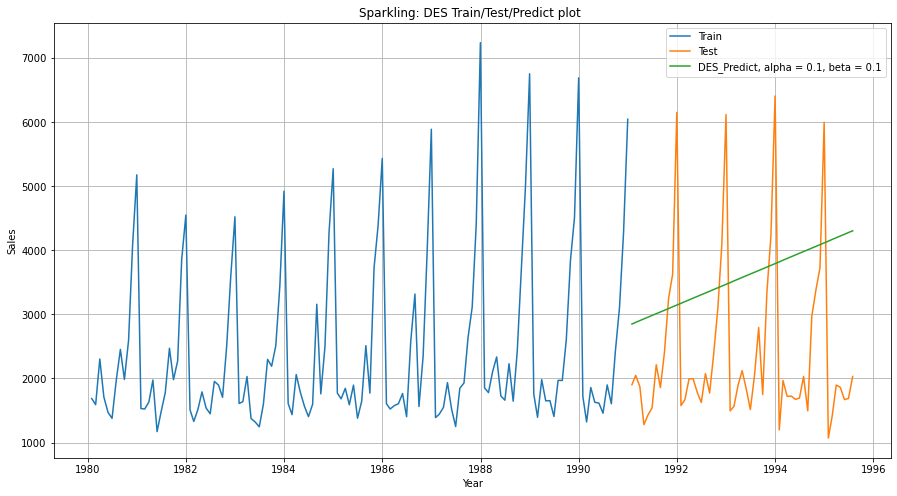

In [80]:
# Lets plot a graph for the above predicted value
# Lets plot the train test and predicted values
plt.plot(train_df1,label = 'Train');
plt.plot(test_df1,label = 'Test');
plt.plot(test_df1_DES['Predict'],label = 'DES_Predict, alpha = 0.1, beta = 0.1');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: DES Train/Test/Predict plot ');
plt.legend(loc='best');

In [81]:
#Lets store this alpha in the overall results.
results_DES_final = pd.DataFrame({'Test_RMSE': results_DES.Test_RMSE.sort_values()[0]},
                                index = ['alpha=0.1_beta=0.1_DoubleExponentialSmoothing'])
results_df1 = pd.concat([results_df1,results_DES_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing        1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing  1778.564670

### <font color='violet'> ---- Rose Dataset</font>

In [82]:
# First we will apply double exponential smoothing in optimized mode and find the alpha thus determined.
model_DES = Holt(train_df2['Rose']);
model_DES_autofit = model_DES.fit(optimized=True);

In [83]:
# Lets look at the parameters of the autofitted model
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
# Lets store the DES results in a dataframe
results_DES = pd.DataFrame(columns = {'Test_RMSE'})
results_DES

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [85]:
# Lets predict the test dataset values based on the autofitted model
test_df2_DES = test_df2.copy()
test_df2_DES['Predict'] = model_DES_autofit.forecast(steps = len(test_df2))
test_df2_DES.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  73.259732
1991-02-28   55.0  72.767150
1991-03-31   66.0  72.274569
1991-04-30   65.0  71.781987
1991-05-31   60.0  71.289405

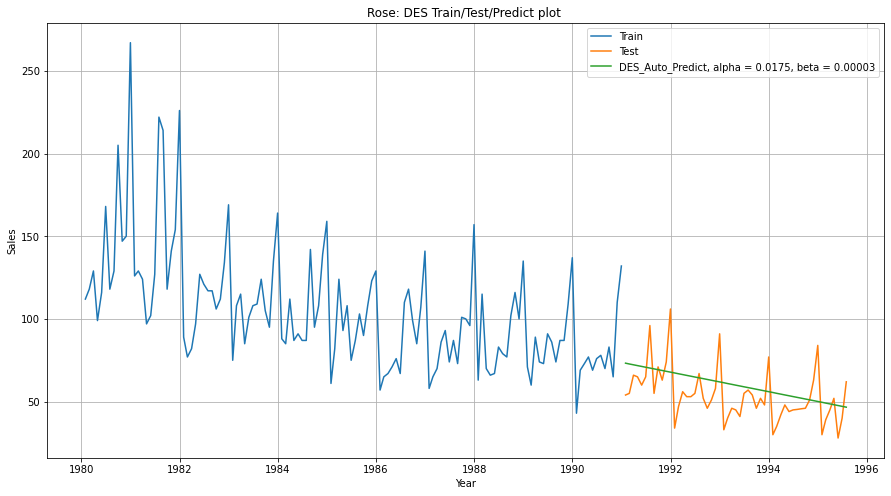

In [86]:
# Lets plot the train test and predicted values
plt.plot(train_df2,label = 'Train');
plt.plot(test_df2,label = 'Test');
plt.plot(test_df2_DES['Predict'],label = 'DES_Auto_Predict, alpha = 0.0175, beta = 0.00003');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: DES Train/Test/Predict plot ');
plt.legend(loc='best');

In [87]:
# Lets calculate the test RMSE value for the above autofitted model and store into the results_DES dataset
model_DES_autofit_RMSE = mean_squared_error(test_df2['Rose'],test_df2_DES['Predict'],squared=False)
print("RMSE value on test dataset for DES autofit model is {}".format(model_DES_autofit_RMSE))

RMSE value on test dataset for DES autofit model is 15.707084805421891


In [88]:
# Lets store the parameter and RMSE value into results_DES
results_DES_df2 = pd.DataFrame({'Test_RMSE' : model_DES_autofit_RMSE}, index = ['alpha=0.0175,beta=0.00003'])
results_DES = pd.concat([results_DES,results_DES_df2])
results_DES

Test_RMSE
alpha=0.0175,beta=0.00003  15.707085

In [89]:
# Next we will run a loop with different alpha and beta values to understand which particular value works best for alpha on 
# the test set based on RMSE values
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_predict = model_DES_alpha_i_j.forecast(steps = len(test_df2))
        
        model_DES_RMSE = mean_squared_error(test_df2['Rose'],DES_predict,squared=False)
        
        results_DES_df2 = pd.DataFrame({'Test_RMSE' : model_DES_RMSE},index=['alpha='+str(round(i,1))+',beta='+str(round(j,1))])
        results_DES = pd.concat([results_DES,results_DES_df2])
    
results_DES

Test_RMSE
alpha=0.0175,beta=0.00003   15.707085
alpha=0.1,beta=0.1          36.923420
alpha=0.1,beta=0.2          48.688645
alpha=0.1,beta=0.3          78.156632
alpha=0.1,beta=0.4          99.583461
...                               ...
alpha=1.0,beta=0.6         801.680201
alpha=1.0,beta=0.7         841.892556
alpha=1.0,beta=0.8         853.965520
alpha=1.0,beta=0.9         834.710918
alpha=1.0,beta=1.0         780.079562

[101 rows x 1 columns]

In [90]:
# Lets see the best value of alpha based on least RMSE value
results_DES.sort_values('Test_RMSE')

Test_RMSE
alpha=0.0175,beta=0.00003    15.707085
alpha=0.1,beta=0.1           36.923420
alpha=0.1,beta=0.2           48.688645
alpha=0.2,beta=0.1           65.731697
alpha=0.1,beta=0.3           78.156632
...                                ...
alpha=0.8,beta=0.9         1052.464775
alpha=0.7,beta=0.9         1061.847925
alpha=0.8,beta=1.0         1095.112268
alpha=0.6,beta=1.0         1102.085811
alpha=0.7,beta=1.0         1125.186708

[101 rows x 1 columns]

In [91]:
#We can see that the autofit model has the least RMSE value
#Lets store this alpha,beta in the overall results.
results_DES_final = pd.DataFrame({'Test_RMSE': results_DES.Test_RMSE.sort_values()[0]},
                                index = ['alpha=0.0175_beta=0.00003_DoubleExponentialSmoothing'])
results_df2 = pd.concat([results_df2,results_DES_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085

### 4.3 Triple Exponential Smoothing

### <font color='violet'> ---- Sparkling Dataset</font>

In [92]:
# First we will apply triple exponential smoothing in optimized mode and find the alpha,beta & gamma thus determined.
model_TES = ExponentialSmoothing(train_df1['Sparkling'],trend='additive',seasonal='multiplicative',freq='M');
model_TES_autofit = model_TES.fit();

In [93]:
# Lets look at the parameters of the autofitted model
model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
# Lets store the DES results in a dataframe
results_TES = pd.DataFrame(columns = {'Test_RMSE'})
results_TES

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [95]:
# Lets predict the test dataset values based on the autofitted model
test_df1_TES = test_df1.copy()
test_df1_TES['Predict'] = model_TES_autofit.forecast(steps = len(test_df1))
test_df1_TES.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  1587.497468
1991-02-28        2049  1356.394925
1991-03-31        1874  1762.929755
1991-04-30        1279  1656.165933
1991-05-31        1432  1542.002730

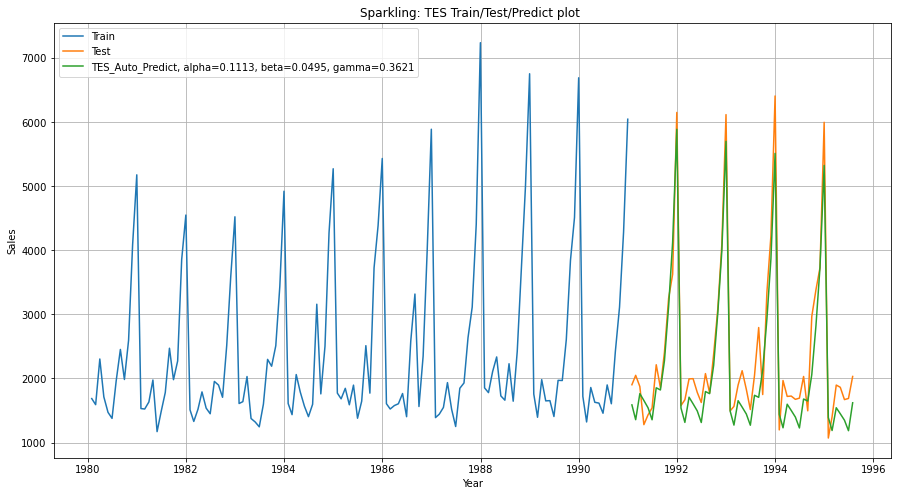

In [96]:
# Lets plot the train test and predicted values
plt.plot(train_df1,label = 'Train');
plt.plot(test_df1,label = 'Test');
plt.plot(test_df1_TES['Predict'],label = 'TES_Auto_Predict, alpha=0.1113, beta=0.0495, gamma=0.3621');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: TES Train/Test/Predict plot ');
plt.legend(loc='best');

In [97]:
# Lets calculate the test RMSE value for the above autofitted model and store into the results_TES dataset
model_TES_autofit_RMSE = mean_squared_error(test_df1['Sparkling'],test_df1_TES['Predict'],squared=False)
print("RMSE value on test dataset for TES autofit model is {}".format(model_TES_autofit_RMSE))

RMSE value on test dataset for TES autofit model is 404.286809456071


In [98]:
# Lets store the parameter and RMSE value into results_TES
results_TES_df1 = pd.DataFrame({'Test_RMSE' : model_TES_autofit_RMSE}, index = ['alpha=0.1113,beta=0.0495,gamma=0.3621'])
results_TES = pd.concat([results_TES,results_TES_df1])
results_TES

Test_RMSE
alpha=0.1113,beta=0.0495,gamma=0.3621  404.286809

In [99]:
# Next we will run a loop with different alpha,beta & gamma values to understand which particular value works best for values
# on the test set based on RMSE values

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_predict = model_TES_alpha_i_j_k.forecast(len(test_df1))
        
            model_TES_RMSE = mean_squared_error(test_df1['Sparkling'],TES_predict,squared=False)
            
            results_TES_df1 = pd.DataFrame({'Test_RMSE' : model_TES_RMSE},index=['alpha='+str(round(i,1))+
                                                                                 ',beta='+str(round(j,1)) +
                                                                                 ',gamma='+str(round(k,1))])
            results_TES = pd.concat([results_TES,results_TES_df1])
    
results_TES

Test_RMSE
alpha=0.1113,beta=0.0495,gamma=0.3621  4.042868e+02
alpha=0.1,beta=0.1,gamma=0.1           5.910387e+02
alpha=0.1,beta=0.1,gamma=0.2           6.214407e+02
alpha=0.1,beta=0.1,gamma=0.3           6.395595e+02
alpha=0.1,beta=0.1,gamma=0.4           6.447910e+02
...                                             ...
alpha=1.0,beta=1.0,gamma=0.6           4.386054e+06
alpha=1.0,beta=1.0,gamma=0.7           8.649577e+06
alpha=1.0,beta=1.0,gamma=0.8           2.700435e+05
alpha=1.0,beta=1.0,gamma=0.9           2.472201e+05
alpha=1.0,beta=1.0,gamma=1.0           1.256914e+05

[1001 rows x 1 columns]

In [100]:
# Lets see the best value of alpha based on least RMSE value
results_TES.sort_values('Test_RMSE')

Test_RMSE
alpha=0.4,beta=0.1,gamma=0.2  3.174343e+02
alpha=0.3,beta=0.2,gamma=0.2  3.290375e+02
alpha=0.3,beta=0.1,gamma=0.1  3.370810e+02
alpha=0.2,beta=0.2,gamma=0.1  3.401865e+02
alpha=0.5,beta=0.1,gamma=0.3  3.459134e+02
...                                    ...
alpha=0.9,beta=0.5,gamma=0.9  7.893556e+06
alpha=1.0,beta=1.0,gamma=0.7  8.649577e+06
alpha=0.8,beta=0.9,gamma=0.8  9.023204e+06
alpha=1.0,beta=0.6,gamma=0.5  1.016607e+07
alpha=0.5,beta=0.6,gamma=1.0  2.102770e+07

[1001 rows x 1 columns]

In [101]:
# We can see that alpha = 0.4, beta = 0.1 and gamma = 0.2 hast the least RMSE vaue for test dataset.
# Lets create the model for this alpha,beta and gamma value
model_TES = model_TES.fit(smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)
test_df1_TES = test_df1.copy()
test_df1_TES['Predict'] = model_TES.forecast(steps = len(test_df1))
test_df1_TES.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  1558.096457
1991-02-28        2049  1425.211133
1991-03-31        1874  1844.092662
1991-04-30        1279  1791.818101
1991-05-31        1432  1658.894218

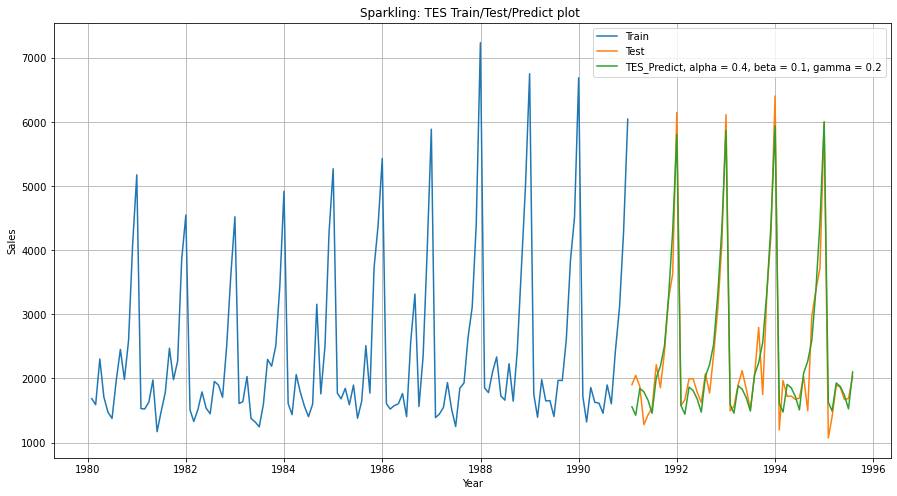

In [102]:
# Lets plot a graph for the above predicted value
# Lets plot the train test and predicted values
plt.plot(train_df1,label = 'Train');
plt.plot(test_df1,label = 'Test');
plt.plot(test_df1_TES['Predict'],label = 'TES_Predict, alpha = 0.4, beta = 0.1, gamma = 0.2');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: TES Train/Test/Predict plot ');
plt.legend(loc='best');

In [103]:
#Lets store this alpha in the overall results.
results_TES_final = pd.DataFrame({'Test_RMSE': results_TES.Test_RMSE.sort_values()[0]},
                                index = ['alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialSmoothing'])
results_df1 = pd.concat([results_df1,results_TES_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302

### <font color='violet'> ---- Rose Dataset</font>

In [104]:
# First we will apply triple exponential smoothing in optimized mode and find the alpha,beta & gamma thus determined.
model_TES = ExponentialSmoothing(train_df2['Rose'],trend='additive',seasonal='multiplicative',freq='M');
model_TES_autofit = model_TES.fit();

In [105]:
# Lets look at the parameters of the autofitted model
model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [106]:
# Lets store the DES results in a dataframe
results_TES = pd.DataFrame(columns = {'Test_RMSE'})
results_TES

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [107]:
# Lets predict the test dataset values based on the autofitted model
test_df2_TES = test_df2.copy()
test_df2_TES['Predict'] = model_TES_autofit.forecast(steps = len(test_df2))
test_df2_TES.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  56.321655
1991-02-28   55.0  63.664690
1991-03-31   66.0  69.374024
1991-04-30   65.0  60.435528
1991-05-31   60.0  67.758341

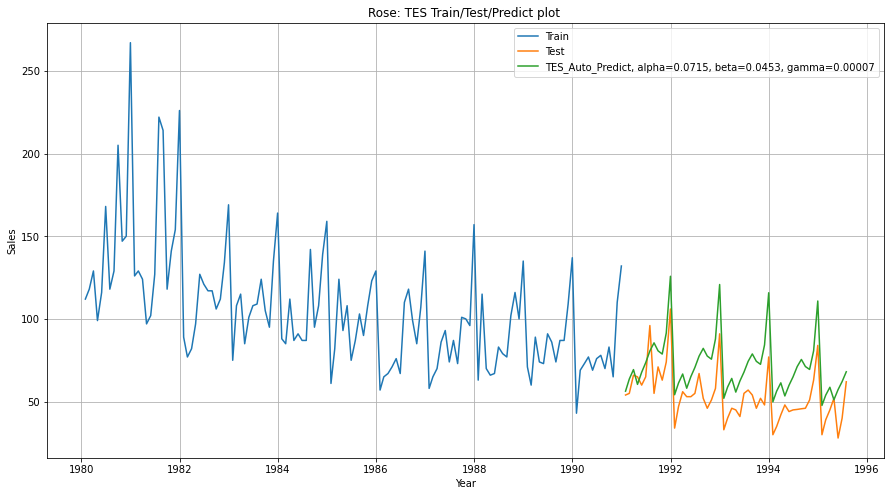

In [108]:
# Lets plot the train test and predicted values
plt.plot(train_df2,label = 'Train');
plt.plot(test_df2,label = 'Test');
plt.plot(test_df2_TES['Predict'],label = 'TES_Auto_Predict, alpha=0.0715, beta=0.0453, gamma=0.00007');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: TES Train/Test/Predict plot ');
plt.legend(loc='best');

In [109]:
# Lets calculate the test RMSE value for the above autofitted model and store into the results_TES dataset
model_TES_autofit_RMSE = mean_squared_error(test_df2['Rose'],test_df2_TES['Predict'],squared=False)
print("RMSE value on test dataset for TES autofit model is {}".format(model_TES_autofit_RMSE))

RMSE value on test dataset for TES autofit model is 20.1566441820518


In [110]:
# Lets store the parameter and RMSE value into results_TES
results_TES_df2 = pd.DataFrame({'Test_RMSE' : model_TES_autofit_RMSE}, index = ['alpha=0.0715,beta=0.0453,gamma=0.00007'])
results_TES = pd.concat([results_TES,results_TES_df2])
results_TES

Test_RMSE
alpha=0.0715,beta=0.0453,gamma=0.00007  20.156644

In [111]:
# Next we will run a loop with different alpha,beta & gamma values to understand which particular value works best for values
# on the test set based on RMSE values

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,
                                                  optimized=False,use_brute=True)
            TES_predict = model_TES_alpha_i_j_k.forecast(len(test_df2))
        
            model_TES_RMSE = mean_squared_error(test_df2['Rose'],TES_predict,squared=False)
            
            results_TES_df2 = pd.DataFrame({'Test_RMSE' : model_TES_RMSE},index=['alpha='+str(round(i,1))+
                                                                                 ',beta='+str(round(j,1)) +
                                                                                 ',gamma='+str(round(k,1))])
            results_TES = pd.concat([results_TES,results_TES_df2])
    
results_TES

Test_RMSE
alpha=0.0715,beta=0.0453,gamma=0.00007    20.156644
alpha=0.1,beta=0.1,gamma=0.1              11.827163
alpha=0.1,beta=0.1,gamma=0.2              11.617727
alpha=0.1,beta=0.1,gamma=0.3              11.746770
alpha=0.1,beta=0.1,gamma=0.4              12.104739
...                                             ...
alpha=1.0,beta=1.0,gamma=0.6            6630.658081
alpha=1.0,beta=1.0,gamma=0.7            9721.144273
alpha=1.0,beta=1.0,gamma=0.8            2573.842908
alpha=1.0,beta=1.0,gamma=0.9            3522.899104
alpha=1.0,beta=1.0,gamma=1.0            3104.659557

[1001 rows x 1 columns]

In [112]:
# Lets see the best value of alpha based on least RMSE value
results_TES.sort_values('Test_RMSE')

Test_RMSE
alpha=0.1,beta=0.2,gamma=0.1  9.223453e+00
alpha=0.1,beta=0.2,gamma=0.2  9.496209e+00
alpha=0.2,beta=0.6,gamma=0.2  9.566051e+00
alpha=0.1,beta=0.2,gamma=0.3  9.888273e+00
alpha=0.2,beta=0.5,gamma=0.3  9.891713e+00
...                                    ...
alpha=0.6,beta=0.7,gamma=0.8  2.555513e+05
alpha=1.0,beta=0.9,gamma=0.3  2.976504e+05
alpha=1.0,beta=0.8,gamma=0.9  3.847832e+05
alpha=0.2,beta=0.9,gamma=0.7  1.079274e+06
alpha=1.0,beta=0.7,gamma=0.8  3.139036e+07

[1001 rows x 1 columns]

In [113]:
# We can see that alpha = 0.1, beta = 0.2 and gamma = 0.1 has the least RMSE vaue for test dataset.
# Lets create the model for this alpha,beta and gamma value
model_TES = model_TES.fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.1,optimized=False,use_brute=True)
test_df2_TES = test_df2.copy()
test_df2_TES['Predict'] = model_TES.forecast(steps = len(test_df2))
test_df2_TES.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  52.563955
1991-02-28   55.0  61.440019
1991-03-31   66.0  66.082798
1991-04-30   65.0  59.044992
1991-05-31   60.0  63.420322

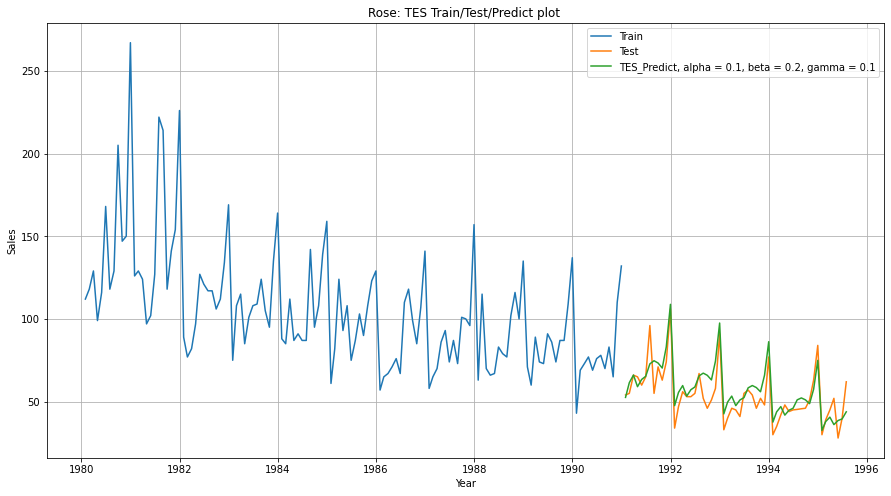

In [114]:
# Lets plot a graph for the above predicted value
# Lets plot the train test and predicted values
plt.plot(train_df2,label = 'Train');
plt.plot(test_df2,label = 'Test');
plt.plot(test_df2_TES['Predict'],label = 'TES_Predict, alpha = 0.1, beta = 0.2, gamma = 0.1');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: TES Train/Test/Predict plot ');
plt.legend(loc='best');

In [115]:
#Lets store this alpha in the overall results.
results_TES_final = pd.DataFrame({'Test_RMSE': results_TES.Test_RMSE.sort_values()[0]},
                                index = ['alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialSmoothing'])
results_df2 = pd.concat([results_df2,results_TES_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453

### 4.4 Linear Regression

### <font color='violet'> ---- Sparkling Dataset</font>

In [116]:
# Let us regress the sales value against the order of time occurence. Hence first lets create ordered time instance for the 
# train and test dataset
LR_train_time = [i + 1 for i in range(len(train_df1))]
LR_test_time = [(i + 1 + len(train_df1)) for i in range(len(test_df1))]

LR_train_df1 = train_df1.copy()
LR_test_df1 = test_df1.copy()

LR_train_df1['Time'] = LR_train_time
LR_test_df1['Time'] = LR_test_time
LR_train_df1

Sparkling  Time
Time_Series                 
1980-01-31        1686     1
1980-02-29        1591     2
1980-03-31        2304     3
1980-04-30        1712     4
1980-05-31        1471     5
...                ...   ...
1990-08-31        1605   128
1990-09-30        2424   129
1990-10-31        3116   130
1990-11-30        4286   131
1990-12-31        6047   132

[132 rows x 2 columns]

In [117]:
# Lets look at the test dataset head
LR_test_df1.head()

Sparkling  Time
Time_Series                 
1991-01-31        1902   133
1991-02-28        2049   134
1991-03-31        1874   135
1991-04-30        1279   136
1991-05-31        1432   137

In [118]:
# Lets look at the test dataset head
LR_test_df1.tail()

Sparkling  Time
Time_Series                 
1995-03-31        1897   183
1995-04-30        1862   184
1995-05-31        1670   185
1995-06-30        1688   186
1995-07-31        2031   187

In [119]:
# Lets create regresiion model on training data
model_lr = LinearRegression()
model_lr.fit(LR_train_df1[['Time']],LR_train_df1['Sparkling'])

LinearRegression()

In [120]:
# Lets predict value for test
LR_test_df1['Predict'] = model_lr.predict(LR_test_df1[['Time']])
LR_test_df1.head()

Sparkling  Time      Predict
Time_Series                              
1991-01-31        1902   133  2791.652093
1991-02-28        2049   134  2797.484752
1991-03-31        1874   135  2803.317410
1991-04-30        1279   136  2809.150069
1991-05-31        1432   137  2814.982727

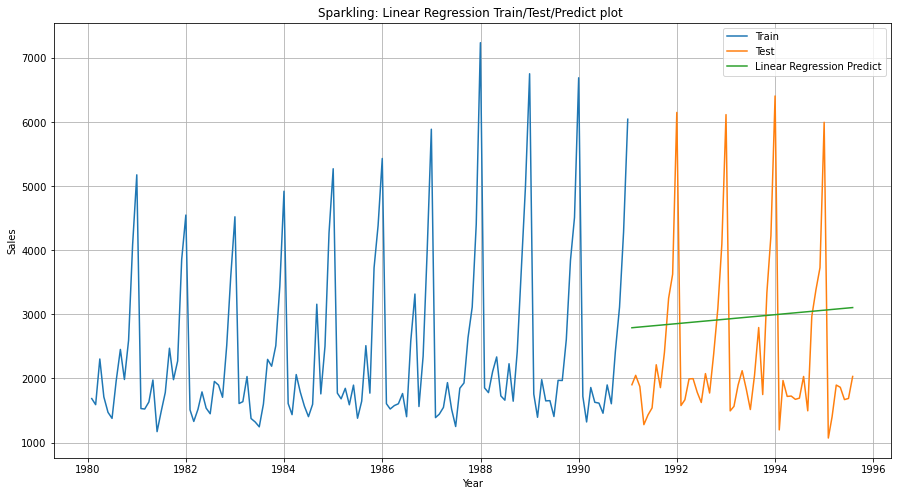

In [121]:
# Lets plot the train test and prediction
plt.plot(LR_train_df1['Sparkling'],label = 'Train');
plt.plot(LR_test_df1['Sparkling'],label = 'Test');
plt.plot(LR_test_df1['Predict'],label = 'Linear Regression Predict');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: Linear Regression Train/Test/Predict plot ');
plt.legend(loc='best');

In [122]:
# Lets calculate the RMSE value
model_LR_RMSE = mean_squared_error(LR_test_df1['Sparkling'],LR_test_df1['Predict'],squared=False)
model_LR_RMSE

1389.135174897992

In [123]:
# Lets store the model and RMSE value in results dataset
results_LR_final = pd.DataFrame({'Test_RMSE': model_LR_RMSE},
                                index = ['LinearRegression'])
results_df1 = pd.concat([results_df1,results_LR_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175

### <font color='violet'> ---- Rose Dataset</font>

In [124]:
# Let us regress the sales value against the order of time occurence. Hence first lets create ordered time instance for the 
# train and test dataset
LR_train_time = [i + 1 for i in range(len(train_df2))]
LR_test_time = [(i + 1 + len(train_df2)) for i in range(len(test_df2))]

LR_train_df2 = train_df2.copy()
LR_test_df2 = test_df2.copy()

LR_train_df2['Time'] = LR_train_time
LR_test_df2['Time'] = LR_test_time
LR_train_df2

Rose  Time
Time_Series             
1980-01-31   112.0     1
1980-02-29   118.0     2
1980-03-31   129.0     3
1980-04-30    99.0     4
1980-05-31   116.0     5
...            ...   ...
1990-08-31    70.0   128
1990-09-30    83.0   129
1990-10-31    65.0   130
1990-11-30   110.0   131
1990-12-31   132.0   132

[132 rows x 2 columns]

In [125]:
LR_test_df2.head()

Rose  Time
Time_Series            
1991-01-31   54.0   133
1991-02-28   55.0   134
1991-03-31   66.0   135
1991-04-30   65.0   136
1991-05-31   60.0   137

In [126]:
LR_test_df2.tail()

Rose  Time
Time_Series            
1995-03-31   45.0   183
1995-04-30   52.0   184
1995-05-31   28.0   185
1995-06-30   40.0   186
1995-07-31   62.0   187

In [127]:
# Lets create regresiion model on training data
model_lr = LinearRegression()
model_lr.fit(LR_train_df2[['Time']],LR_train_df2['Rose'])

LinearRegression()

In [128]:
# Lets predict value for test
LR_test_df2['Predict'] = model_lr.predict(LR_test_df2[['Time']])
LR_test_df2.head()

Rose  Time    Predict
Time_Series                       
1991-01-31   54.0   133  72.063266
1991-02-28   55.0   134  71.568888
1991-03-31   66.0   135  71.074511
1991-04-30   65.0   136  70.580133
1991-05-31   60.0   137  70.085755

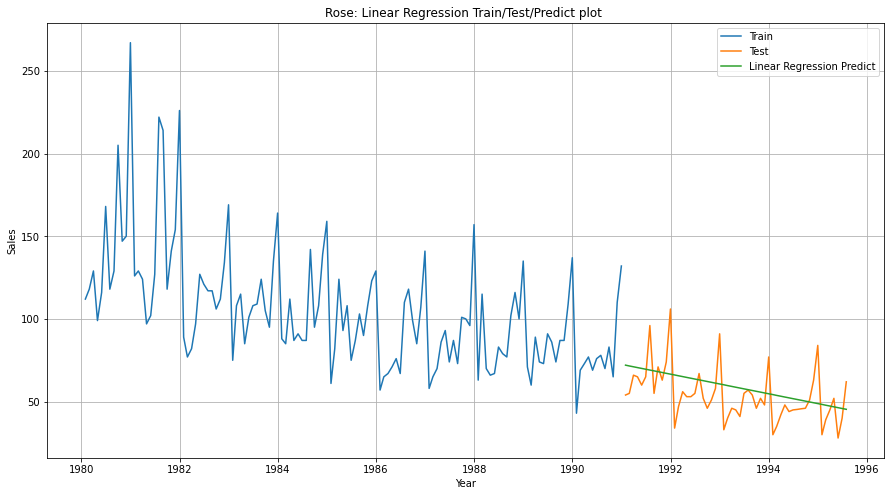

In [129]:
# Lets plot the train test and prediction
plt.plot(LR_train_df2['Rose'],label = 'Train');
plt.plot(LR_test_df2['Rose'],label = 'Test');
plt.plot(LR_test_df2['Predict'],label = 'Linear Regression Predict');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: Linear Regression Train/Test/Predict plot ');
plt.legend(loc='best');

In [130]:
# Lets calculate the RMSE value
model_LR_RMSE = mean_squared_error(LR_test_df2['Rose'],LR_test_df2['Predict'],squared=False)
model_LR_RMSE

15.268989373982947

In [131]:
# Lets store the model and RMSE value in results dataset
results_LR_final = pd.DataFrame({'Test_RMSE': model_LR_RMSE},
                                index = ['LinearRegression'])
results_df2 = pd.concat([results_df2,results_LR_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989

### 4.5 Naive Forecast

### <font color='violet'> ---- Sparkling Dataset</font>

In [132]:
# Lets take a copy of the train and test dataset for Naive forecast
NaiveModel_train = train_df1.copy()
NaiveModel_test = test_df1.copy()
NaiveModel_train.tail()

Sparkling
Time_Series           
1990-08-31        1605
1990-09-30        2424
1990-10-31        3116
1990-11-30        4286
1990-12-31        6047

In [133]:
# In Naive model the prediction for tomorrow is the same as today and the prediction for day after tomorrow is same as 
# tomorrow which is the same as today. Hence prediction value on test dataset will be the last value of the train dataset.
NaiveModel_test['Predict'] = np.asarray(train_df1['Sparkling'])[len(np.asarray(train_df1['Sparkling']))-1]
NaiveModel_test.head()

Sparkling  Predict
Time_Series                    
1991-01-31        1902     6047
1991-02-28        2049     6047
1991-03-31        1874     6047
1991-04-30        1279     6047
1991-05-31        1432     6047

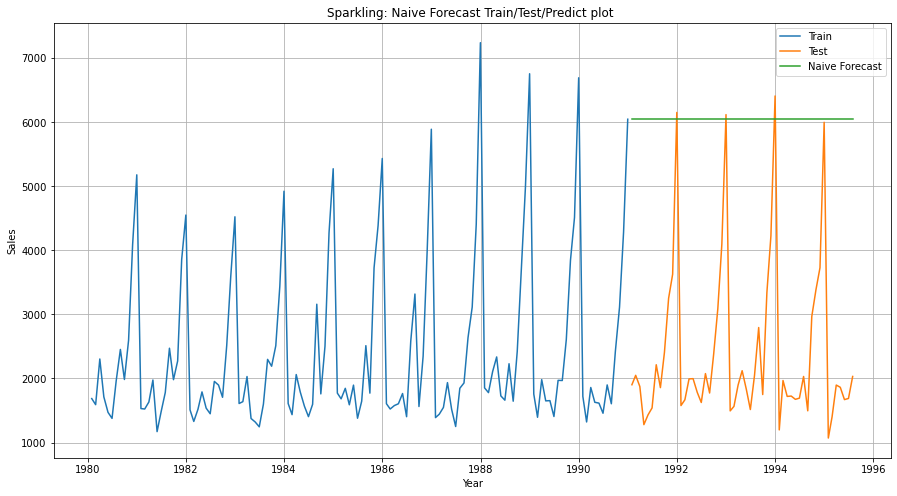

In [134]:
# Lets plot the train test and prediction
plt.plot(NaiveModel_train['Sparkling'],label = 'Train');
plt.plot(NaiveModel_test['Sparkling'],label = 'Test');
plt.plot(NaiveModel_test['Predict'],label = 'Naive Forecast');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: Naive Forecast Train/Test/Predict plot ');
plt.legend(loc='best');

In [135]:
# Lets calculate the RMSE value
model_Naive_RMSE = mean_squared_error(NaiveModel_test['Sparkling'],NaiveModel_test['Predict'],squared=False)
model_Naive_RMSE

3864.2793518443914

In [136]:
# Lets store the model and RMSE value in results dataset
results_Naive_final = pd.DataFrame({'Test_RMSE': model_Naive_RMSE},
                                index = ['NaiveForecast'])
results_df1 = pd.concat([results_df1,results_Naive_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352

### <font color='violet'> ---- Rose Dataset</font>

In [137]:
# Lets take a copy of the train and test dataset for Naive forecast
NaiveModel_train = train_df2.copy()
NaiveModel_test = test_df2.copy()
NaiveModel_train.tail()

Rose
Time_Series       
1990-08-31    70.0
1990-09-30    83.0
1990-10-31    65.0
1990-11-30   110.0
1990-12-31   132.0

In [138]:
# In Naive model the prediction for tomorrow is the same as today and the prediction for day after tomorrow is same as 
# tomorrow which is the same as today. Hence prediction value on test dataset will be the last value of the train dataset.
NaiveModel_test['Predict'] = np.asarray(train_df2['Rose'])[len(np.asarray(train_df2['Rose']))-1]
NaiveModel_test.head()

Rose  Predict
Time_Series               
1991-01-31   54.0    132.0
1991-02-28   55.0    132.0
1991-03-31   66.0    132.0
1991-04-30   65.0    132.0
1991-05-31   60.0    132.0

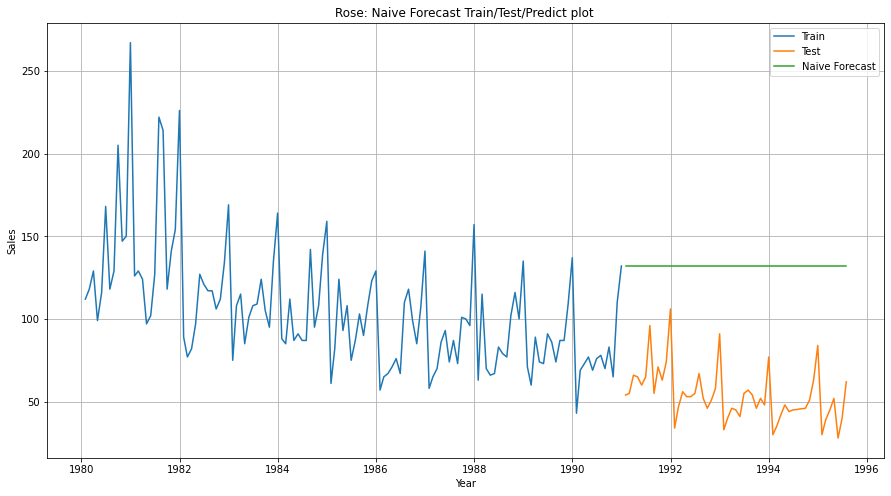

In [139]:
# Lets plot the train test and prediction
plt.plot(NaiveModel_train['Rose'],label = 'Train');
plt.plot(NaiveModel_test['Rose'],label = 'Test');
plt.plot(NaiveModel_test['Predict'],label = 'Naive Forecast');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: Naive Forecast Train/Test/Predict plot ');
plt.legend(loc='best');

In [140]:
# Lets calculate the RMSE value
model_Naive_RMSE = mean_squared_error(NaiveModel_test['Rose'],NaiveModel_test['Predict'],squared=False)
model_Naive_RMSE

79.71877616175045

In [141]:
# Lets store the model and RMSE value in results dataset
results_Naive_final = pd.DataFrame({'Test_RMSE': model_Naive_RMSE},
                                index = ['NaiveForecast'])
results_df2 = pd.concat([results_df2,results_Naive_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776

### 4.6 Simple Average Forecast

### <font color='violet'> ---- Sparkling Dataset</font>

In [142]:
# Lets take a copy of the train and test dataset for Simple Average forecast
SimpleAvg_train = train_df1.copy()
SimpleAvg_test = test_df1.copy()

In [143]:
# In Simple average model the prediction for test is going to be the mean of the train dataset over a time series data
SimpleAvg_test['Predict'] = SimpleAvg_train['Sparkling'].mean()
SimpleAvg_test.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  2403.780303
1991-02-28        2049  2403.780303
1991-03-31        1874  2403.780303
1991-04-30        1279  2403.780303
1991-05-31        1432  2403.780303

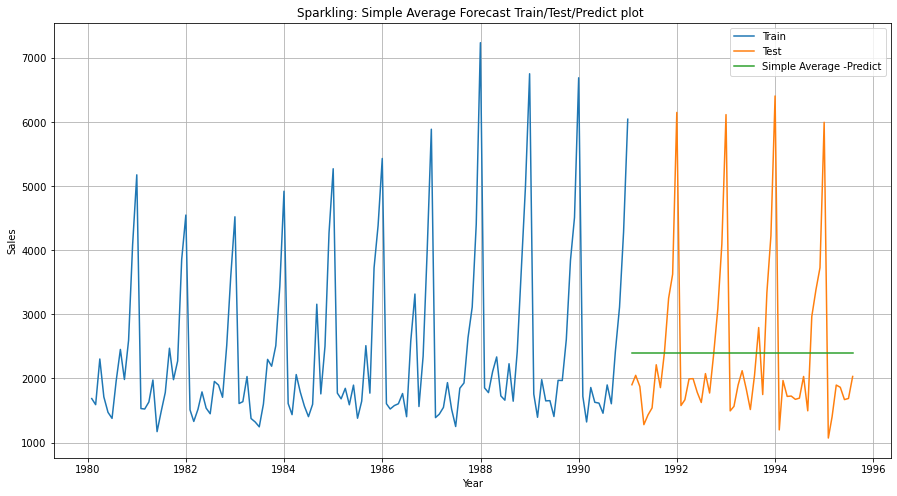

In [144]:
# Lets plot the train test and prediction
plt.plot(SimpleAvg_train['Sparkling'],label = 'Train');
plt.plot(SimpleAvg_test['Sparkling'],label = 'Test');
plt.plot(SimpleAvg_test['Predict'],label = 'Simple Average -Predict');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Sparkling: Simple Average Forecast Train/Test/Predict plot ');
plt.legend(loc='best');

In [145]:
# Lets calculate the RMSE value
model_SA_RMSE = mean_squared_error(SimpleAvg_test['Sparkling'],SimpleAvg_test['Predict'],squared=False)
model_SA_RMSE

1275.0818036965309

In [146]:
# Lets store the model and RMSE value in results dataset
results_SA_final = pd.DataFrame({'Test_RMSE': model_SA_RMSE},
                                index = ['SimpleAverage'])
results_df1 = pd.concat([results_df1,results_SA_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804

### <font color='violet'> ---- Rose Dataset</font>

In [147]:
# Lets take a copy of the train and test dataset for Simple Average forecast
SimpleAvg_train = train_df2.copy()
SimpleAvg_test = test_df2.copy()

In [148]:
# In Simple average model the prediction for test is going to be the mean of the train dataset over a time series data
SimpleAvg_test['Predict'] = SimpleAvg_train['Rose'].mean()
SimpleAvg_test.head()

Rose     Predict
Time_Series                  
1991-01-31   54.0  104.939394
1991-02-28   55.0  104.939394
1991-03-31   66.0  104.939394
1991-04-30   65.0  104.939394
1991-05-31   60.0  104.939394

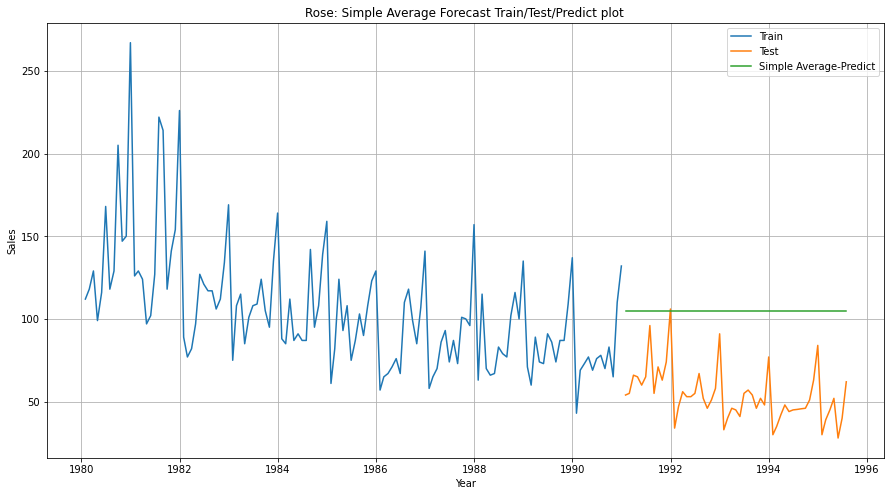

In [149]:
# Lets plot the train test and prediction
plt.plot(SimpleAvg_train['Rose'],label = 'Train');
plt.plot(SimpleAvg_test['Rose'],label = 'Test');
plt.plot(SimpleAvg_test['Predict'],label = 'Simple Average-Predict');
plt.grid(True);
plt.xlabel("Year");
plt.ylabel('Sales');
plt.title('Rose: Simple Average Forecast Train/Test/Predict plot ');
plt.legend(loc='best');

In [150]:
# Lets calculate the RMSE value
model_SA_RMSE = mean_squared_error(SimpleAvg_test['Rose'],SimpleAvg_test['Predict'],squared=False)
model_SA_RMSE

53.46057380286427

In [151]:
# Lets store the model and RMSE value in results dataset
results_SA_final = pd.DataFrame({'Test_RMSE': model_SA_RMSE},
                                index = ['SimpleAverage'])
results_df2 = pd.concat([results_df2,results_SA_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574

### 4.7 Moving Average Forecast

### <font color='violet'> ---- Sparkling Dataset</font>

In [152]:
# For Moving Average, we are going to average over the entire data.
MovingAverage_df1 = df1.copy()
MovingAverage_df1.head()

Sparkling
Time_Series           
1980-01-31        1686
1980-02-29        1591
1980-03-31        2304
1980-04-30        1712
1980-05-31        1471

In [153]:
# We will be checking moving average for multiple orders and choose the one with least RMSE value.
# Lets store the Moving Average results in a dataframe
results_MAvg = pd.DataFrame(columns = {'Test_RMSE'})
results_MAvg

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [154]:
# Lets iterate through orders 2 to 9 and create trailing moving averages for the whole data

for i in np.arange(2,10,1):
    MovingAverage_df1['Trailing_'+str(i)] = MovingAverage_df1['Sparkling'].rolling(i).mean()

MovingAverage_df1.head()

Sparkling  Trailing_2   Trailing_3  Trailing_4  Trailing_5  \
Time_Series                                                               
1980-01-31        1686         NaN          NaN         NaN         NaN   
1980-02-29        1591      1638.5          NaN         NaN         NaN   
1980-03-31        2304      1947.5  1860.333333         NaN         NaN   
1980-04-30        1712      2008.0  1869.000000     1823.25         NaN   
1980-05-31        1471      1591.5  1829.000000     1769.50      1752.8   

             Trailing_6  Trailing_7  Trailing_8  Trailing_9  
Time_Series                                                  
1980-01-31          NaN         NaN         NaN         NaN  
1980-02-29          NaN         NaN         NaN         NaN  
1980-03-31          NaN         NaN         NaN         NaN  
1980-04-30          NaN         NaN         NaN         NaN  
1980-05-31          NaN         NaN         NaN         NaN

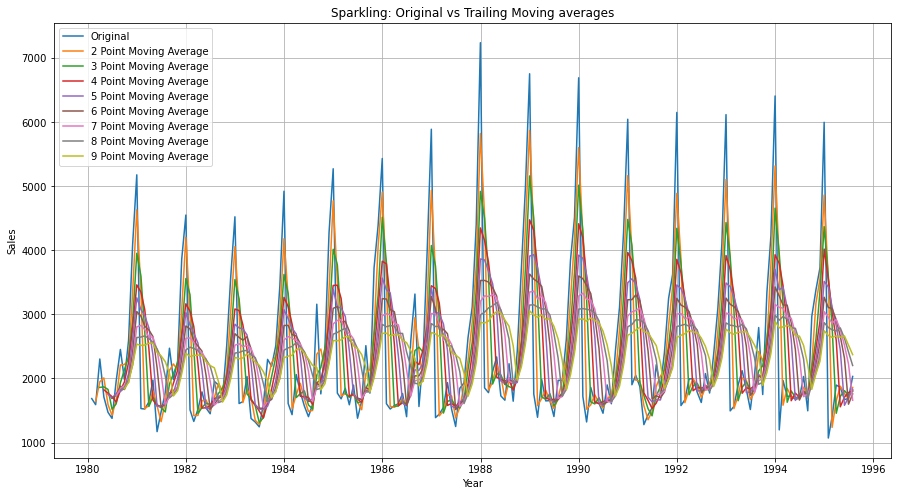

In [155]:
# Lets plot the graph
plt.plot(MovingAverage_df1['Sparkling'], label='Original')
plt.plot(MovingAverage_df1['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_5'], label='5 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_7'],label = '7 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_8'],label = '8 Point Moving Average')
plt.plot(MovingAverage_df1['Trailing_9'],label = '9 Point Moving Average')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Sparkling: Original vs Trailing Moving averages")
plt.legend(loc = 'best')
plt.grid();

In [156]:
# Lets split the dataset into train and test
MovingAvg_train_df1 = MovingAverage_df1[MovingAverage_df1.index.year < 1991]
MovingAvg_test_df1 = MovingAverage_df1[MovingAverage_df1.index.year >= 1991]

In [157]:
# Lets check the RMSE values of the different trailing moving averages
for i in np.arange(2,10,1):
    MovingAvg_RMSE_i = mean_squared_error(MovingAvg_test_df1['Sparkling'],
                                          MovingAvg_test_df1['Trailing_'+str(i)],squared=False)
    results_MAvg_df1 = pd.DataFrame({'Test_RMSE' : MovingAvg_RMSE_i},index=['MovingAvg_Interval_='+str(i)])
    results_MAvg = pd.concat([results_MAvg,results_MAvg_df1])
    
results_MAvg

Test_RMSE
MovingAvg_Interval_=2   813.400684
MovingAvg_Interval_=3  1028.605756
MovingAvg_Interval_=4  1156.589694
MovingAvg_Interval_=5  1234.045344
MovingAvg_Interval_=6  1283.927428
MovingAvg_Interval_=7  1331.163342
MovingAvg_Interval_=8  1342.567772
MovingAvg_Interval_=9  1346.278315

In [158]:
# Lets order tthe RMSE value sin ascending order
results_MAvg.sort_values('Test_RMSE')

Test_RMSE
MovingAvg_Interval_=2   813.400684
MovingAvg_Interval_=3  1028.605756
MovingAvg_Interval_=4  1156.589694
MovingAvg_Interval_=5  1234.045344
MovingAvg_Interval_=6  1283.927428
MovingAvg_Interval_=7  1331.163342
MovingAvg_Interval_=8  1342.567772
MovingAvg_Interval_=9  1346.278315

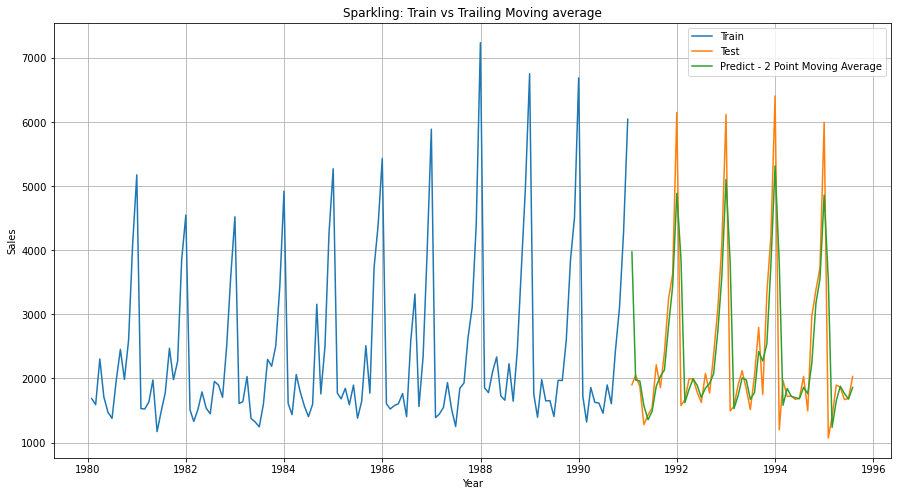

In [159]:
# We can see that moving average with interval 2 has the least RMSE value. Lets store this into final results dataset.
# Lets plot the graph for train/test and trailing moving average with inetrval-2
plt.plot(MovingAvg_train_df1['Sparkling'], label='Train')
plt.plot(MovingAvg_test_df1['Sparkling'], label='Test')
plt.plot(MovingAvg_test_df1['Trailing_2'], label='Predict - 2 Point Moving Average')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Sparkling: Train vs Trailing Moving average")
plt.legend(loc = 'best')
plt.grid();

In [160]:
# Lets store the model and RMSE value in results dataset
results_MAvg_final = pd.DataFrame({'Test_RMSE': results_MAvg.Test_RMSE.sort_values()[0]},
                                index = ['2_point_MovingAverage'])
results_df1 = pd.concat([results_df1,results_MAvg_final])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804
2_point_MovingAverage                                813.400684

### <font color='violet'> ---- Rose Dataset</font>

In [161]:
# For Moving Average, we are going to average over the entire data.
MovingAverage_df2 = df2.copy()
MovingAverage_df2.head()

Rose
Time_Series       
1980-01-31   112.0
1980-02-29   118.0
1980-03-31   129.0
1980-04-30    99.0
1980-05-31   116.0

In [162]:
# We will be checking moving average for multiple orders and choose the one with least RMSE value.
# Lets store the Moving Average results in a dataframe
results_MAvg = pd.DataFrame(columns = {'Test_RMSE'})
results_MAvg

Empty DataFrame
Columns: [Test_RMSE]
Index: []

In [163]:
# Lets iterate through orders 2 to 9 and create trailing moving averages for the whole data

for i in np.arange(2,10,1):
    MovingAverage_df2['Trailing_'+str(i)] = MovingAverage_df2['Rose'].rolling(i).mean()

MovingAverage_df2.head()

Rose  Trailing_2  Trailing_3  Trailing_4  Trailing_5  \
Time_Series                                                          
1980-01-31   112.0         NaN         NaN         NaN         NaN   
1980-02-29   118.0       115.0         NaN         NaN         NaN   
1980-03-31   129.0       123.5  119.666667         NaN         NaN   
1980-04-30    99.0       114.0  115.333333       114.5         NaN   
1980-05-31   116.0       107.5  114.666667       115.5       114.8   

             Trailing_6  Trailing_7  Trailing_8  Trailing_9  
Time_Series                                                  
1980-01-31          NaN         NaN         NaN         NaN  
1980-02-29          NaN         NaN         NaN         NaN  
1980-03-31          NaN         NaN         NaN         NaN  
1980-04-30          NaN         NaN         NaN         NaN  
1980-05-31          NaN         NaN         NaN         NaN

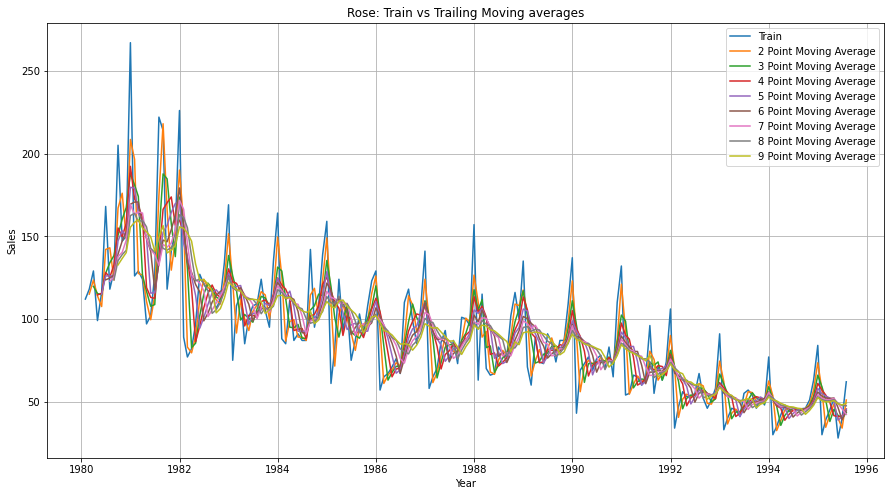

In [164]:
# Lets plot the graph
plt.plot(MovingAverage_df2['Rose'], label='Train')
plt.plot(MovingAverage_df2['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_5'], label='5 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_7'],label = '7 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_8'],label = '8 Point Moving Average')
plt.plot(MovingAverage_df2['Trailing_9'],label = '9 Point Moving Average')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Rose: Train vs Trailing Moving averages")
plt.legend(loc = 'best')
plt.grid();

In [165]:
# Lets split the dataset into train and test
MovingAvg_train_df2 = MovingAverage_df2[MovingAverage_df2.index.year < 1991]
MovingAvg_test_df2 = MovingAverage_df2[MovingAverage_df2.index.year >= 1991]

In [166]:
# Lets check the RMSE values of the different trailing moving averages
for i in np.arange(2,10,1):
    MovingAvg_RMSE_i = mean_squared_error(MovingAvg_test_df2['Rose'],
                                          MovingAvg_test_df2['Trailing_'+str(i)],squared=False)
    results_MAvg_df2 = pd.DataFrame({'Test_RMSE' : MovingAvg_RMSE_i},index=['MovingAvg_Interval_='+str(i)])
    results_MAvg = pd.concat([results_MAvg,results_MAvg_df2])
    
results_MAvg

Test_RMSE
MovingAvg_Interval_=2  11.529279
MovingAvg_Interval_=3  14.126475
MovingAvg_Interval_=4  14.451319
MovingAvg_Interval_=5  14.467347
MovingAvg_Interval_=6  14.566444
MovingAvg_Interval_=7  15.072765
MovingAvg_Interval_=8  14.805119
MovingAvg_Interval_=9  14.727646

In [167]:
# Lets order tthe RMSE value sin ascending order
results_MAvg.sort_values('Test_RMSE')

Test_RMSE
MovingAvg_Interval_=2  11.529279
MovingAvg_Interval_=3  14.126475
MovingAvg_Interval_=4  14.451319
MovingAvg_Interval_=5  14.467347
MovingAvg_Interval_=6  14.566444
MovingAvg_Interval_=9  14.727646
MovingAvg_Interval_=8  14.805119
MovingAvg_Interval_=7  15.072765

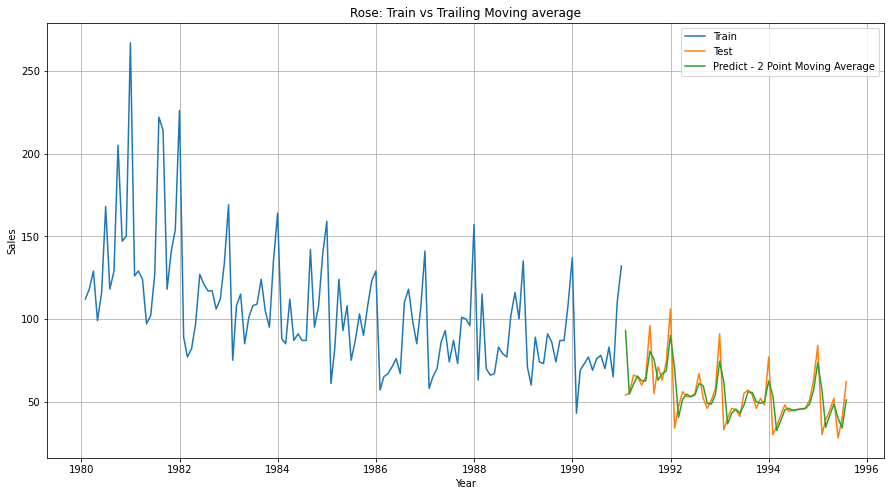

In [168]:
# We can see that moving average with interval 2 has the least RMSE value. Lets store this into final results dataset.
# Lets plot the graph for train/test and trailing moving average with inetrval-2
plt.plot(MovingAvg_train_df2['Rose'], label='Train')
plt.plot(MovingAvg_test_df2['Rose'], label='Test')
plt.plot(MovingAvg_test_df2['Trailing_2'], label='Predict - 2 Point Moving Average')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Rose: Train vs Trailing Moving average")
plt.legend(loc = 'best')
plt.grid();

In [169]:
# Lets store the model and RMSE value in results dataset
results_MAvg_final = pd.DataFrame({'Test_RMSE': results_MAvg.Test_RMSE.sort_values()[0]},
                                index = ['2_point_MovingAverage'])
results_df2 = pd.concat([results_df2,results_MAvg_final])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574
2_point_MovingAverage                               11.529279

In [170]:
# Lets check the best model performance based on RMSE for the Sparkling dataset
results_df1.sort_values('Test_RMSE')

Test_RMSE
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
2_point_MovingAverage                                813.400684
SimpleAverage                                       1275.081804
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
LinearRegression                                    1389.135175
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
NaiveForecast                                       3864.279352

In [171]:
# Lets check the best model performance based on RMSE for the Rose dataset
results_df2.sort_values('Test_RMSE')

Test_RMSE
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
2_point_MovingAverage                               11.529279
LinearRegression                                    15.268989
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.0987_SimpleExponentialSmoothing             36.796233
SimpleAverage                                       53.460574
NaiveForecast                                       79.718776

## <font color='blue'>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.</font>

In [172]:
#The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and 
# subsequently whether the series is non-stationary.
#The hypothesis in a simple form for the ADF test is:
# 𝐻0  : The Time Series has a unit root and is thus non-stationary.
# 𝐻a  : The Time Series does not have a unit root and is thus stationary.

# We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test 
# to be less than the  𝛼 = 0.05  value.

### <font color='violet'> ---- Sparkling Dataset</font>

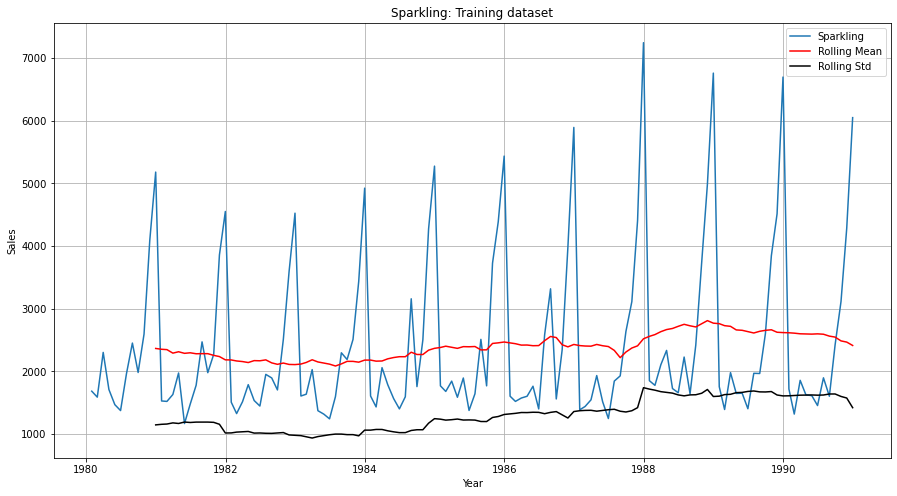

In [173]:
# Lets plot the training dataset.
rolmean = train_df1.rolling(window=12).mean() #determining the rolling mean
rolstd = train_df1.rolling(window=12).std()   #determining the rolling standard deviation   
plt.plot(train_df1,label = 'Sparkling');
plt.plot(rolmean, color='red', label='Rolling Mean');
plt.plot(rolstd, color='black', label = 'Rolling Std');
plt.grid("True");
plt.ylabel("Sales");
plt.xlabel("Year");
plt.legend(loc = 'best');
plt.title("Sparkling: Training dataset");


In [174]:
# Lets perform Dickey-Fuller test on the training dataset for Sparkling
df1_stat = adfuller(train_df1,regression='ct',autolag='AIC')
print("Dickey-Fuller test on Sparkling train dataset")
print("---------------------------------------------")
print('DF test statistic is %3.3f' %df1_stat[0])
print('DF test p-value is' ,df1_stat[1])
print('Number of lags used' ,df1_stat[2])

Dickey-Fuller test on Sparkling train dataset
---------------------------------------------
DF test statistic is -2.062
DF test p-value is 0.5674110388593686
Number of lags used 12


In [175]:
# We can see that p-value is greater than alpha 0.05, hence we do not have enough evidence to reject the null hypothesis
# Hence the training dataset has a unit root and is thus non-stationary.
# Lets perform the Dickey-Fuller test on one level of differencing of the training dataset and check the p-value
df1_stat = adfuller(train_df1.diff().dropna(),regression='ct',autolag='AIC')
print("Dickey-Fuller test on Sparkling train dataset")
print("---------------------------------------------")
print('DF test statistic is %3.3f' %df1_stat[0])
print('DF test p-value is' ,df1_stat[1])
print('Number of lags used' ,df1_stat[2])

Dickey-Fuller test on Sparkling train dataset
---------------------------------------------
DF test statistic is -7.968
DF test p-value is 8.479210655514366e-11
Number of lags used 11


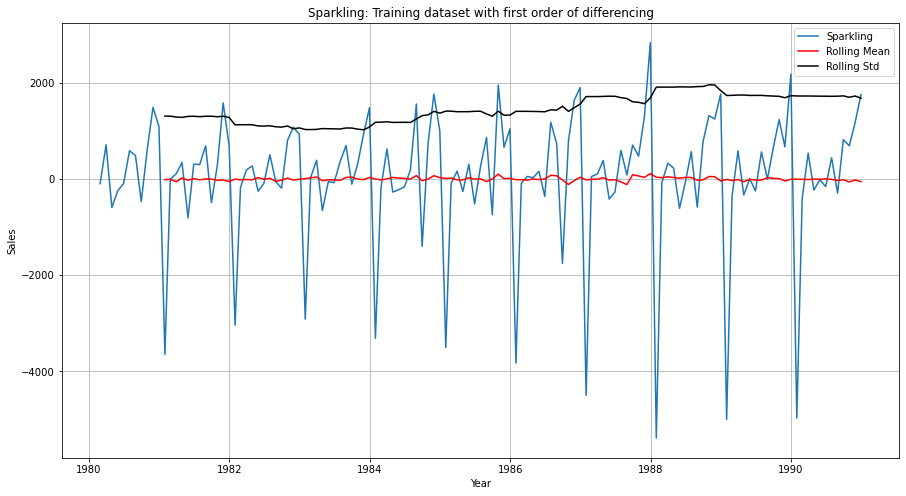

In [176]:
# Hence at one level of differencing of the training time series we have p-value < alpha (0.05) and hence we can reject the 
# null hypotheseis. The alternate hypothesis that the series dows not have a unit root and is thus stationary.
# Lets plot the stationary timeseries
rolmean = train_df1.diff().dropna().rolling(window=12).mean() #determining the rolling mean
rolstd = train_df1.diff().dropna().rolling(window=12).std()   #determining the rolling standard deviation   
plt.plot(train_df1.diff().dropna(),label = 'Sparkling');
plt.plot(rolmean, color='red', label='Rolling Mean');
plt.plot(rolstd, color='black', label = 'Rolling Std');
plt.grid("True");
plt.ylabel("Sales");
plt.xlabel("Year");
plt.legend(loc = 'best');
plt.title("Sparkling: Training dataset with first order of differencing");

### <font color='violet'> ---- Rose Dataset</font>

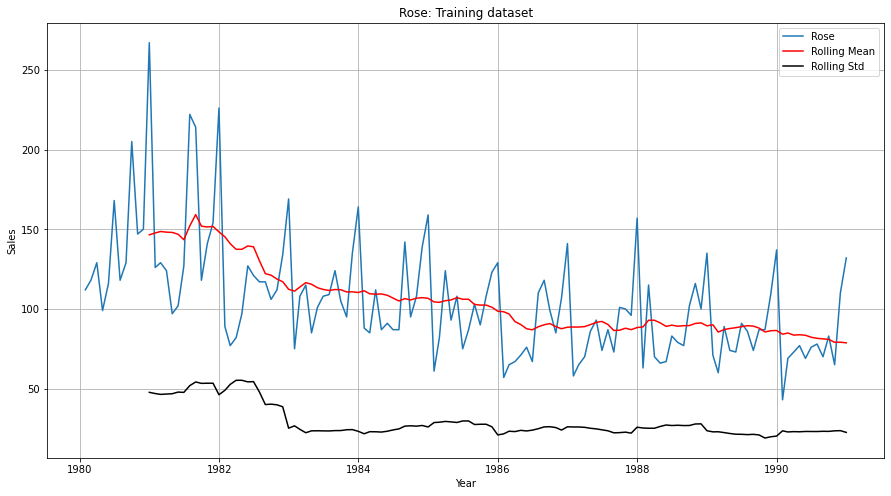

In [177]:
# Lets plot the training dataset.
rolmean = train_df2.rolling(window=12).mean() #determining the rolling mean
rolstd = train_df2.rolling(window=12).std()   #determining the rolling standard deviation   
plt.plot(train_df2,label = 'Rose');
plt.plot(rolmean, color='red', label='Rolling Mean');
plt.plot(rolstd, color='black', label = 'Rolling Std');
plt.grid("True");
plt.ylabel("Sales");
plt.xlabel("Year");
plt.legend(loc = 'best');
plt.title("Rose: Training dataset");

In [178]:
# Lets perform Dickey-Fuller test on the training dataset for Sparkling
df2_stat = adfuller(train_df2,regression='ct',autolag='AIC')
print("Dickey-Fuller test on Sparkling train dataset")
print("---------------------------------------------")
print('DF test statistic is %3.3f' %df2_stat[0])
print('DF test p-value is' ,df2_stat[1])
print('Number of lags used' ,df2_stat[2])

Dickey-Fuller test on Sparkling train dataset
---------------------------------------------
DF test statistic is -1.686
DF test p-value is 0.7569093051047063
Number of lags used 13


In [179]:
# We can see that p-value is greater than alpha 0.05, hence we do not have enough evidence to reject the null hypothesis
# Hence the training dataset has a unit root and is thus non-stationary.
# Lets perform the Dickey-Fuller test on one level of differencing of the training dataset and check the p-value
df2_stat = adfuller(train_df2.diff().dropna(),regression='ct',autolag='AIC')
print("Dickey-Fuller test on Sparkling train dataset")
print("---------------------------------------------")
print('DF test statistic is %3.3f' %df2_stat[0])
print('DF test p-value is' ,df2_stat[1])
print('Number of lags used' ,df2_stat[2])

Dickey-Fuller test on Sparkling train dataset
---------------------------------------------
DF test statistic is -6.804
DF test p-value is 3.8948313567816136e-08
Number of lags used 12


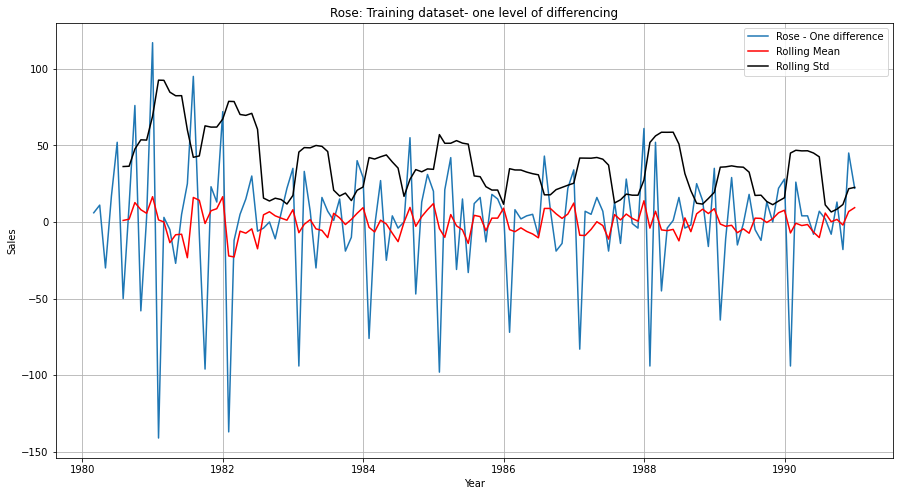

In [180]:
# Hence at one level of differencing of the training time series we have p-value < alpha (0.05) and hence we can reject the 
# null hypotheseis. The alternate hypothesis that the series dows not have a unit root and is thus stationary.
# Lets plot the stationary timeseries
rolmean = train_df2.diff().dropna().rolling(window=6).mean() #determining the rolling mean
rolstd = train_df2.diff().dropna().rolling(window=6).std()   #determining the rolling standard deviation   
plt.plot(train_df2.diff().dropna(),label = 'Rose - One difference');
plt.plot(rolmean, color='red', label='Rolling Mean');
plt.plot(rolstd, color='black', label = 'Rolling Std');
plt.grid("True");
plt.ylabel("Sales");
plt.xlabel("Year");
plt.legend(loc = 'best');
plt.title("Rose: Training dataset- one level of differencing");

## <font color='blue'>6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</font>

### 6.1 ARIMA model

### <font color='violet'> ---- Sparkling Dataset</font>

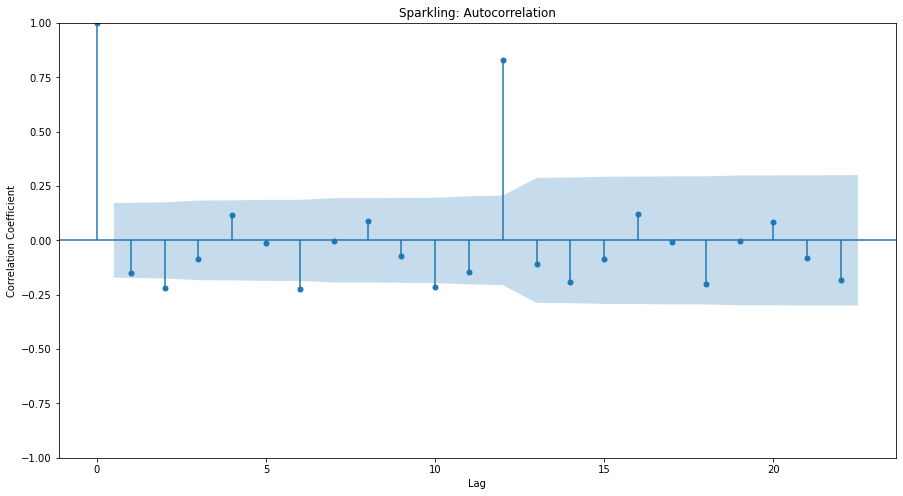

In [181]:
# Lets first plot the auto correlation function on Sparkling datatset. We have seen that data is stationary at 
# first order of differencing
plot_acf(train_df1.diff().dropna(),alpha=0.05);
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 1, hence in the ARIMA model visually q = 0

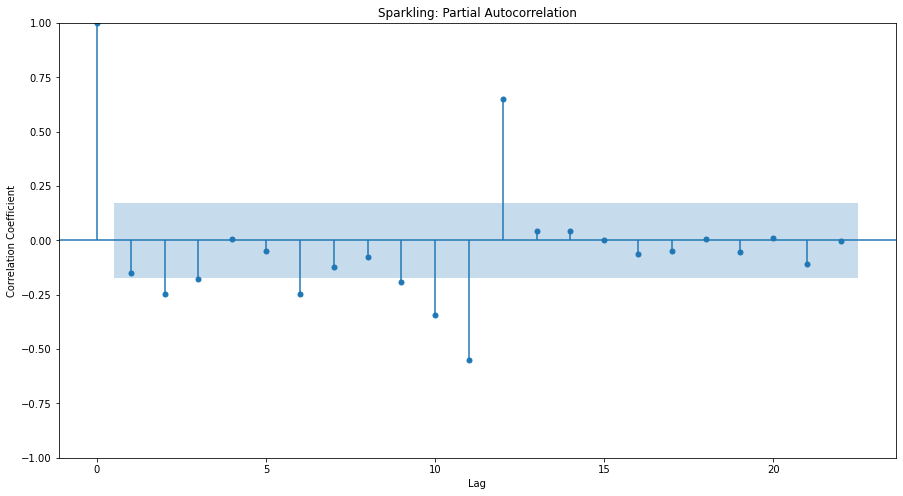

In [182]:
# Lets first plot the partial auto correlation function on Sparkling datatset.
plot_pacf(train_df1.diff().dropna(),alpha=0.05,method='ywmle');
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 0, hence in the ARIMA model, visually  p = 0

In [183]:
# Let build the automated ARIMA model and choose the best parameters based on lowest Akaike Information Criteria (AIC).
# We have seen above visually that p is 0 and q is 0, for iteration purpose we will consider range from 0 to 3.
# We have seen earlier that the training dataset is stationary when the data has one order of differencing, hence d value
# in ARIMA model is 1.

p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Sparkling ARIMA auto Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Sparkling ARIMA auto Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [184]:
# Lets create an empty datset to store the AIC results of the different ARIMA models
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [185]:
# Lets fit teh ARIMA model for each of the model parameters in pdq and store the AIC value in ARIMA_AIC

for param in pdq:
    model_ARIMA = ARIMA(train_df1['Sparkling'],order=param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': model_ARIMA.aic}, ignore_index=True)

In [186]:
# Lets sort the AIC values in ARIMA_AIC and check the model with lowest AIC or best performance.
ARIMA_AIC.sort_values('AIC')

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [187]:
# So for p=2,d=1 and q=2, the ARIMA model gives the best performance. Lets create the model and check the summary
model_auto_ARIMA = ARIMA(train_df1['Sparkling'],order=(2,1,2)).fit()
print(model_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 13 Feb 2022   AIC                           2213.509
Time:                        20:37:23   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

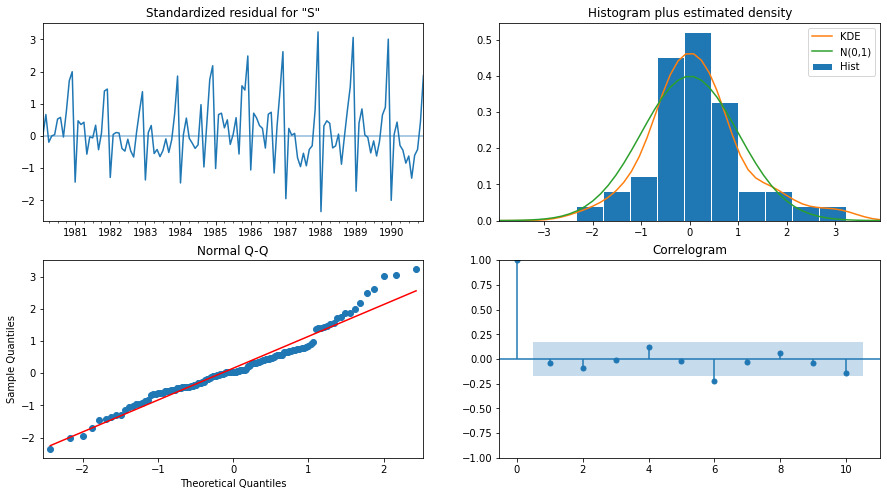

In [188]:
# Lets plot the ARIMA diagnostics plot
model_auto_ARIMA.plot_diagnostics();

In [189]:
# Using the above model lets forecast on the test set
ARIMA_test_df1 = test_df1.copy();
ARIMA_test_df1['Predict'] = model_auto_ARIMA.forecast(steps=len(test_df1))
ARIMA_test_df1.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  4252.364631
1991-02-28        2049  2863.100822
1991-03-31        1874  2043.970397
1991-04-30        1279  1746.194206
1991-05-31        1432  1813.617530

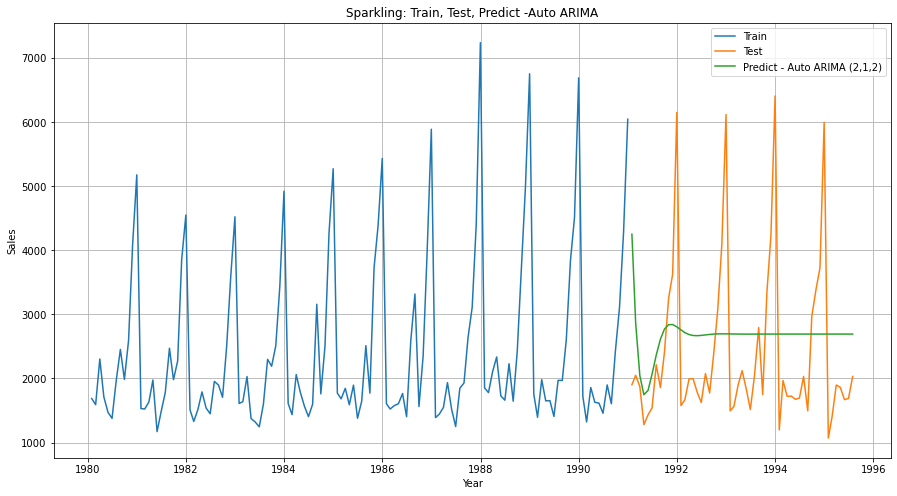

In [190]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df1['Sparkling'], label='Train')
plt.plot(ARIMA_test_df1['Sparkling'], label='Test')
plt.plot(ARIMA_test_df1['Predict'], label='Predict - Auto ARIMA (2,1,2)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Sparkling: Train, Test, Predict -Auto ARIMA")
plt.legend(loc = 'best')
plt.grid();

In [191]:
# Lets calculate the RMSE score
model_ARIMA_RMSE = mean_squared_error(ARIMA_test_df1['Sparkling'],ARIMA_test_df1['Predict'],squared = False);
model_ARIMA_RMSE

1299.9795689481477

In [192]:
# Lets store the model and RMSE value in results dataset
results_ARIMA = pd.DataFrame({'Test_RMSE': model_ARIMA_RMSE},
                                index = ['(2,1,2)_ARIMA_auto'])
results_df1 = pd.concat([results_df1,results_ARIMA])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804
2_point_MovingAverage                                813.400684
(2,1,2)_ARIMA_auto                                  1299.979569

### <font color='violet'> ---- Rose Dataset</font>

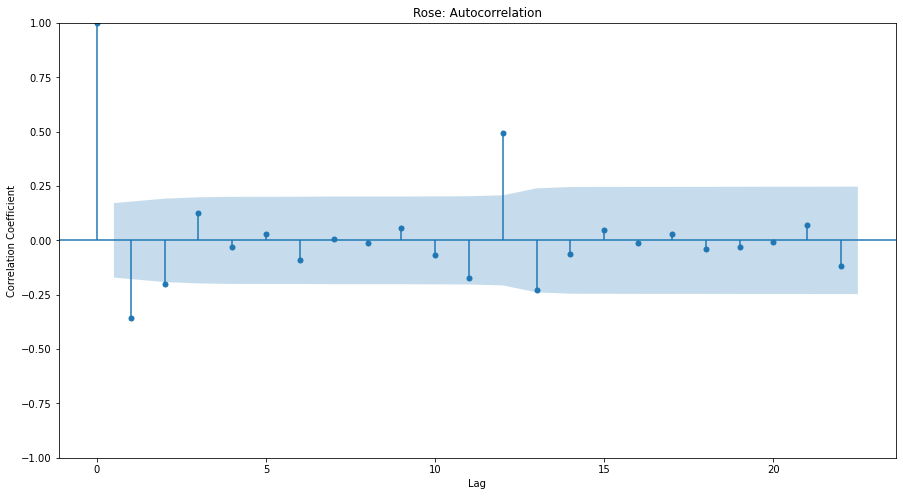

In [193]:
# Lets first plot the auto correlation function on Rose datatset. We have seen that the data is stationary at first order
# of differencing
plot_acf(train_df2.diff().dropna(),alpha=0.05);
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model q = 2

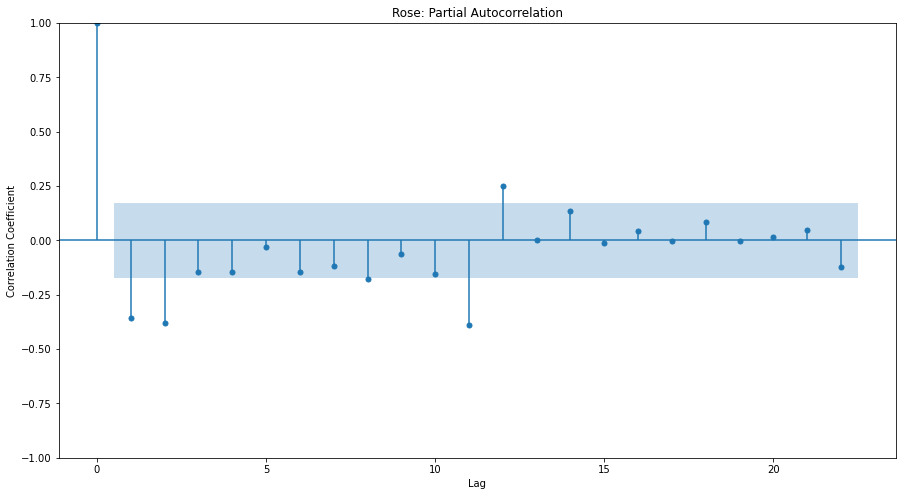

In [194]:
# Lets first plot the partial auto correlation function on Rose datatset.
plot_pacf(train_df2.diff().dropna(),alpha=0.05,method='ywmle');
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model p = 2

In [195]:
# Let build the automated ARIMA model and choose the best parameters based on lowest Akaike Information Criteria (AIC).
# We have seen above visually that p is 4 and q is 2, for iteration purpose we will consider range from 0 to 3.
# We have seen earlier that the training dataset is stationary when the data has one order of differencing, hence d value
# in ARIMA model is 1.

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Rose ARIMA auto Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Rose ARIMA auto Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [196]:
# Lets create an empty datset to store the AIC results of the different ARIMA models
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [197]:
# Lets fit teh ARIMA model for each of the model parameters in pdq and store the AIC value in ARIMA_AIC

for param in pdq:
    model_ARIMA = ARIMA(train_df2['Rose'],order=param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': model_ARIMA.aic}, ignore_index=True)

In [198]:
# Lets sort the AIC values in ARIMA_AIC and check the model with lowest AIC or best performance.
ARIMA_AIC.sort_values('AIC')

param          AIC
11  (2, 1, 3)  1274.694912
15  (3, 1, 3)  1278.658866
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [199]:
# So for p=2,d=1 and q=3, the ARIMA model gives the best performance. Lets create the model and check the summary
model_auto_ARIMA = ARIMA(train_df2['Rose'],order=(2,1,3)).fit()
print(model_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 13 Feb 2022   AIC                           1274.695
Time:                        20:37:29   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

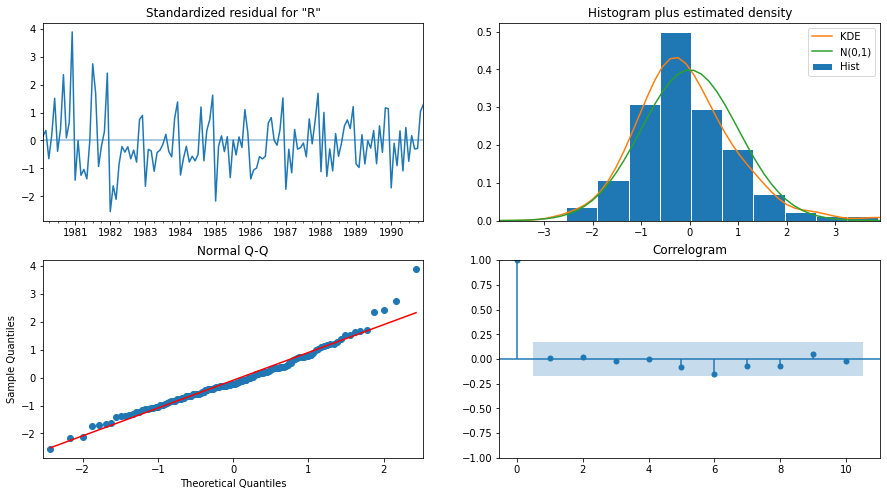

In [200]:
# Lets plot the ARIMA diagnostics plot
model_auto_ARIMA.plot_diagnostics();

In [201]:
# Using the above model lets forecast on the test set
ARIMA_test_df2 = test_df2.copy();
ARIMA_test_df2['Predict'] = model_auto_ARIMA.forecast(steps=len(test_df2))
ARIMA_test_df2.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  85.615051
1991-02-28   55.0  90.533276
1991-03-31   66.0  81.974358
1991-04-30   65.0  92.751980
1991-05-31   60.0  80.904894

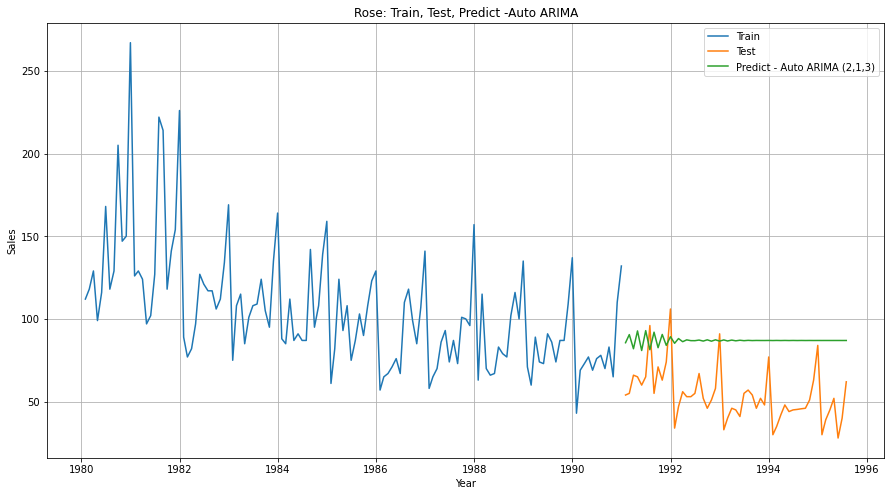

In [202]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df2['Rose'], label='Train')
plt.plot(ARIMA_test_df2['Rose'], label='Test')
plt.plot(ARIMA_test_df2['Predict'], label='Predict - Auto ARIMA (2,1,3)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Rose: Train, Test, Predict -Auto ARIMA")
plt.legend(loc = 'best')
plt.grid();

In [203]:
# Lets calculate the RMSE score
model_ARIMA_RMSE = mean_squared_error(ARIMA_test_df2['Rose'],ARIMA_test_df2['Predict'],squared = False);
model_ARIMA_RMSE

36.81742866084295

In [204]:
# Lets store the model and RMSE value in results dataset
results_ARIMA = pd.DataFrame({'Test_RMSE': model_ARIMA_RMSE},
                                index = ['(2,1,3)_ARIMA_auto'])
results_df2 = pd.concat([results_df2,results_ARIMA])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574
2_point_MovingAverage                               11.529279
(2,1,3)_ARIMA_auto                                  36.817429

### 6.2 SARIMA model

### <font color='violet'> ---- Sparkling Dataset</font>

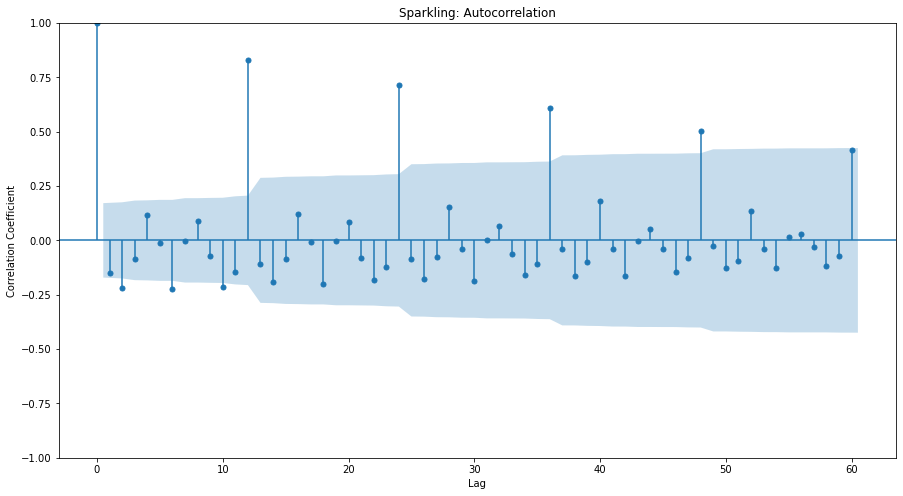

In [205]:
# Lets first plot the auto correlation function on Sparkling datatset. We have seen that data is stationary at 
# first order of differencing
plot_acf(train_df1.diff().dropna(),alpha=0.05,lags = np.arange(0,61,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 1, hence in the ARIMA model visually q = 0
#### Also we can see that seasonality is 12, based on which Q =4

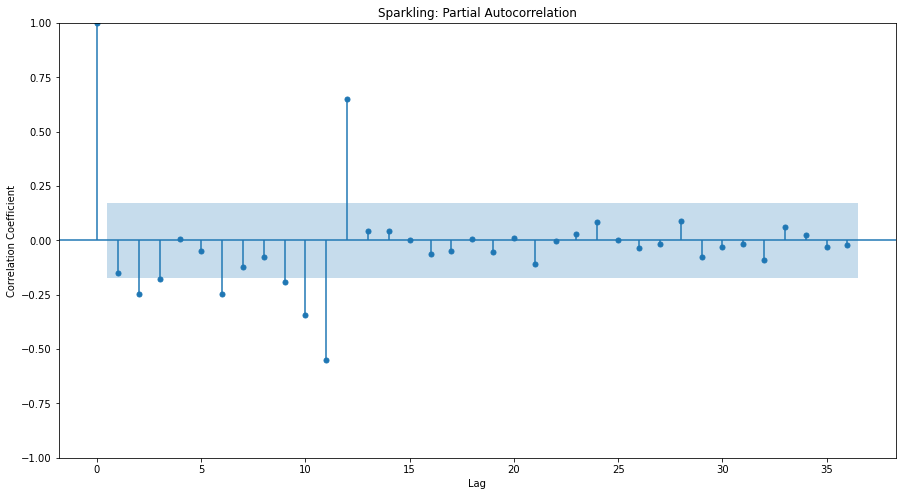

In [206]:
# Lets first plot the partial auto correlation function on Sparkling datatset.
plot_pacf(train_df1.diff().dropna(),alpha=0.05,method='ywmle',lags = np.arange(0,37,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 0, hence in the ARIMA model, visually  p = 0
#### Based on seasonality 12, we can see that P =1.

In [207]:
# Let build the automated ARIMA model and choose the best parameters based on lowest Akaike Information Criteria (AIC).
# We have seen above visually that p,q is 0 and P is 1 and Q is 4, but for iteration purpose we will consider range of p,q from 
# 0 to 2 and P,Q from 0 to 4.
# We have seen earlier that the training dataset is stationary when the data has one order of differencing, hence d value
# in ARIMA model is 1.D is 0.

p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
p = q = range(0, 5)
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the SARIMA Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the SARIMA Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 0, 3, 12)
Model: (1, 1, 1)(0, 0, 4, 12)
Model: (1, 1, 2)(1, 0, 0, 12)
Model: (2, 1, 0)(1, 0, 1, 12)
Model: (2, 1, 1)(1, 0, 2, 12)
Model: (2, 1, 2)(1, 0, 3, 12)


In [208]:
# Lets create an empty datset to store the AIC results of the different SARIMA paramaters
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [209]:
# Lets fit the SARIMA model for each of the model parameters in pdq and store the AIC value in SARIMA_AIC

for param in pdq:
    for param_seasonal in PDQ:
        model_SARIMA = sm.tsa.statespace.SARIMAX(train_df1['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = model_SARIMA.fit()
#        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0    (0, 1, 0)  (0, 0, 0, 12)  2251.359720
1    (0, 1, 0)  (0, 0, 1, 12)  1956.261462
2    (0, 1, 0)  (0, 0, 2, 12)  1723.153364
3    (0, 1, 0)  (0, 0, 3, 12)  4134.971276
4    (0, 1, 0)  (0, 0, 4, 12)  1307.271895
..         ...            ...          ...
220  (2, 1, 2)  (4, 0, 0, 12)  1234.415031
221  (2, 1, 2)  (4, 0, 1, 12)  1315.683610
222  (2, 1, 2)  (4, 0, 2, 12)  1343.404246
223  (2, 1, 2)  (4, 0, 3, 12)  1823.738930
224  (2, 1, 2)  (4, 0, 4, 12)  1332.862219

[225 rows x 3 columns]

In [210]:
# Lets sort the AIC values in SARIMA_AIC and check the model with lowest AIC or best performance.
SARIMA_AIC.sort_values('AIC')

param       seasonal          AIC
64   (0, 1, 2)  (2, 0, 4, 12)  1213.798980
139  (1, 1, 2)  (2, 0, 4, 12)  1214.320803
59   (0, 1, 2)  (1, 0, 4, 12)  1216.592039
134  (1, 1, 2)  (1, 0, 4, 12)  1217.203614
209  (2, 1, 2)  (1, 0, 4, 12)  1223.270442
..         ...            ...          ...
53   (0, 1, 2)  (0, 0, 3, 12)  4331.051094
133  (1, 1, 2)  (1, 0, 3, 12)  4379.534258
158  (2, 1, 0)  (1, 0, 3, 12)  4424.012201
128  (1, 1, 2)  (0, 0, 3, 12)  4582.480791
113  (1, 1, 1)  (2, 0, 3, 12)  4957.173539

[225 rows x 3 columns]

In [211]:
# So for p=0,d=1,q=2,P=2,D=0,Q=4 the SARIMA model gives the best performance. Lets create the model and check the summary
model_auto_SARIMA = sm.tsa.statespace.SARIMAX(train_df1['Sparkling'].values,
                                            order=(0,1,2),
                                            seasonal_order=(2,0,4,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit()
print(model_auto_SARIMA.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, [1, 2, 3, 4], 12)   Log Likelihood                -597.899
Date:                                       Sun, 13 Feb 2022   AIC                           1213.799
Time:                                               20:48:14   BIC                           1235.237
Sample:                                                    0   HQIC                          1222.394
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8554     

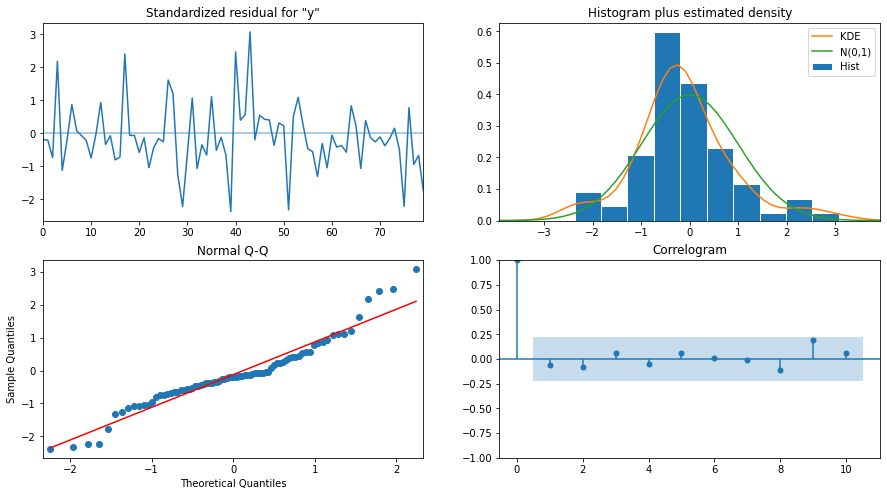

In [212]:
# Lets plot the ARIMA diagnostics plot
model_auto_SARIMA.plot_diagnostics();

In [213]:
# Using the above model lets forecast on the test set
SARIMA_test_df1 = test_df1.copy();
SARIMA_test_df1['Predict'] = model_auto_SARIMA.forecast(steps=len(test_df1))
SARIMA_test_df1.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  1467.532026
1991-02-28        2049  1405.584570
1991-03-31        1874  1813.073158
1991-04-30        1279  1623.052983
1991-05-31        1432  1492.547731

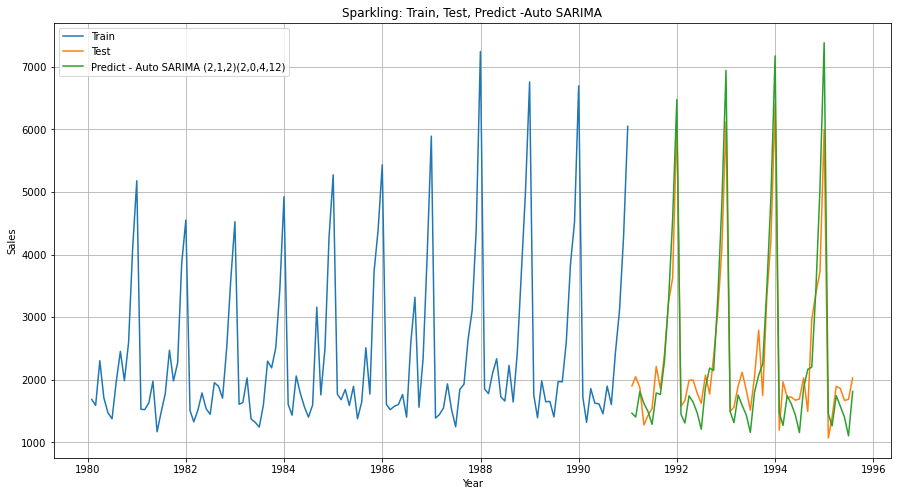

In [214]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df1['Sparkling'], label='Train')
plt.plot(SARIMA_test_df1['Sparkling'], label='Test')
plt.plot(SARIMA_test_df1['Predict'], label='Predict - Auto SARIMA (2,1,2)(2,0,4,12)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Sparkling: Train, Test, Predict -Auto SARIMA")
plt.legend(loc = 'best')
plt.grid();

In [215]:
# Lets calculate the RMSE score
model_SARIMA_RMSE = mean_squared_error(SARIMA_test_df1['Sparkling'],SARIMA_test_df1['Predict'],squared = False);
model_SARIMA_RMSE

487.38855106632866

In [216]:
# Lets store the model and RMSE value in results dataset
results_SARIMA = pd.DataFrame({'Test_RMSE': model_SARIMA_RMSE},
                                index = ['(2,1,2)(2,0,4,12)_SARIMA_auto'])
results_df1 = pd.concat([results_df1,results_SARIMA])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804
2_point_MovingAverage                                813.400684
(2,1,2)_ARIMA_auto                                  1299.979569
(2,1,2)(2,0,4,12)_SARIMA_auto                        487.388551

### <font color='violet'> ---- Rose Dataset</font>

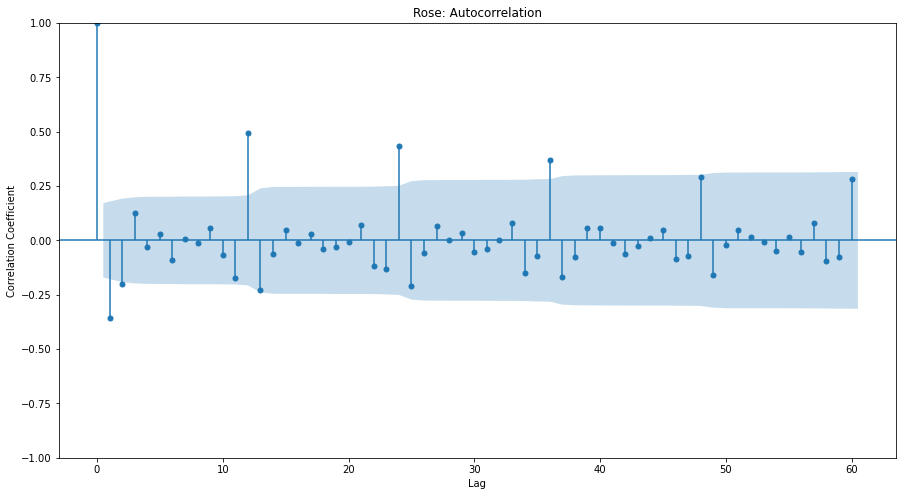

In [217]:
# Lets first plot the auto correlation function on Rose datatset. We have seen that data is stationary at 
# first order of differencing
plot_acf(train_df2.diff().dropna(),alpha=0.05,lags = np.arange(0,61,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model visually q = 2
#### Also we can see that seasonality is 12, based on which Q =3

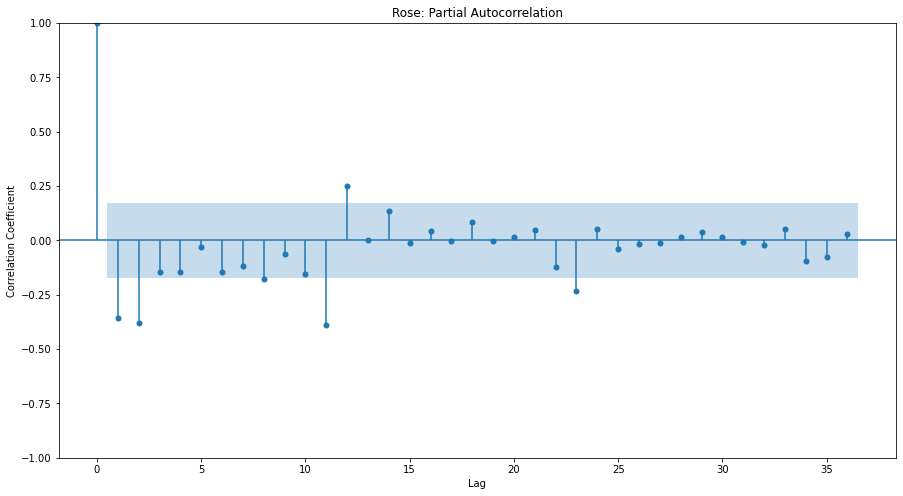

In [218]:
# Lets first plot the partial auto correlation function on Sparkling datatset.
plot_pacf(train_df2.diff().dropna(),alpha=0.05,method='ywmle',lags = np.arange(0,37,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model, visually  p = 2
#### Based on seasonality 12, we can see that P =1.

In [219]:
# Let build the automated ARIMA model and choose the best parameters based on lowest Akaike Information Criteria (AIC).
# We have seen above visually that p,q is 2 and P is 1 and Q is 3, but for iteration purpose we will consider range of p,q from 
# 0 to 2 and P,Q from 0 to 4.
# We have seen earlier that the training dataset is stationary when the data has one order of differencing, hence d value
# in ARIMA model is 1.D is 0.

p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
p = q = range(0, 5)
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the SARIMA Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the SARIMA Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 0, 3, 12)
Model: (1, 1, 1)(0, 0, 4, 12)
Model: (1, 1, 2)(1, 0, 0, 12)
Model: (2, 1, 0)(1, 0, 1, 12)
Model: (2, 1, 1)(1, 0, 2, 12)
Model: (2, 1, 2)(1, 0, 3, 12)


In [220]:
# Lets create an empty datset to store the AIC results of the different SARIMA paramaters
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [221]:
# Lets fit the SARIMA model for each of the model parameters in pdq and store the AIC value in SARIMA_AIC

for param in pdq:
    for param_seasonal in PDQ:
        model_SARIMA = sm.tsa.statespace.SARIMAX(train_df2['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = model_SARIMA.fit()
#        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0    (0, 1, 0)  (0, 0, 0, 12)  1323.965788
1    (0, 1, 0)  (0, 0, 1, 12)  1145.423083
2    (0, 1, 0)  (0, 0, 2, 12)   976.437530
3    (0, 1, 0)  (0, 0, 3, 12)  4620.270462
4    (0, 1, 0)  (0, 0, 4, 12)   763.996610
..         ...            ...          ...
220  (2, 1, 2)  (4, 0, 0, 12)   692.524043
221  (2, 1, 2)  (4, 0, 1, 12)   691.694609
222  (2, 1, 2)  (4, 0, 2, 12)   692.927717
223  (2, 1, 2)  (4, 0, 3, 12)  2848.088562
224  (2, 1, 2)  (4, 0, 4, 12)   685.440115

[225 rows x 3 columns]

In [222]:
# Lets sort the AIC values in SARIMA_AIC and check the model with lowest AIC or best performance.
SARIMA_AIC.sort_values('AIC')

param       seasonal          AIC
69   (0, 1, 2)  (3, 0, 4, 12)   680.679506
64   (0, 1, 2)  (2, 0, 4, 12)   680.764822
74   (0, 1, 2)  (4, 0, 4, 12)   681.312524
59   (0, 1, 2)  (1, 0, 4, 12)   681.512547
144  (1, 1, 2)  (3, 0, 4, 12)   682.662805
..         ...            ...          ...
28   (0, 1, 1)  (0, 0, 3, 12)  4062.432568
103  (1, 1, 1)  (0, 0, 3, 12)  4168.023459
178  (2, 1, 1)  (0, 0, 3, 12)  4170.023459
153  (2, 1, 0)  (0, 0, 3, 12)  4209.772770
3    (0, 1, 0)  (0, 0, 3, 12)  4620.270462

[225 rows x 3 columns]

In [223]:
# So for p=0,d=1,q=2,P=2,D=0 and Q=4 the ARIMA model gives the best performance. Lets create the model and check the summary
model_auto_SARIMA = sm.tsa.statespace.SARIMAX(train_df2['Rose'].values,
                                            order=(0,1,2),
                                            seasonal_order=(3,0,4,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit()
print(model_auto_SARIMA.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(3, 0, [1, 2, 3, 4], 12)   Log Likelihood                -330.340
Date:                                       Sun, 13 Feb 2022   AIC                            680.680
Time:                                               20:57:44   BIC                            704.500
Sample:                                                    0   HQIC                           690.230
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9502     

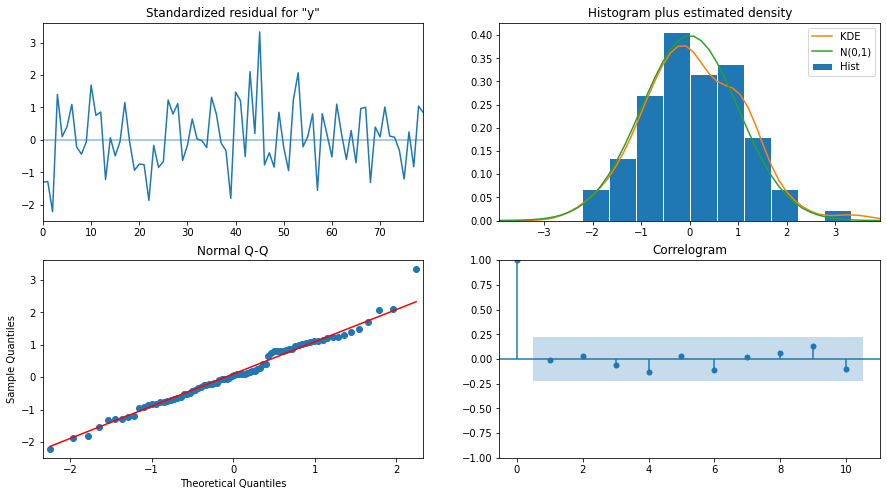

In [224]:
# Lets plot the ARIMA diagnostics plot
model_auto_SARIMA.plot_diagnostics();

In [225]:
# Using the above model lets forecast on the test set
SARIMA_test_df2 = test_df2.copy();
SARIMA_test_df2['Predict'] = model_auto_SARIMA.forecast(steps=len(test_df2))
SARIMA_test_df2.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  51.815704
1991-02-28   55.0  58.589488
1991-03-31   66.0  74.686748
1991-04-30   65.0  73.840644
1991-05-31   60.0  76.115877

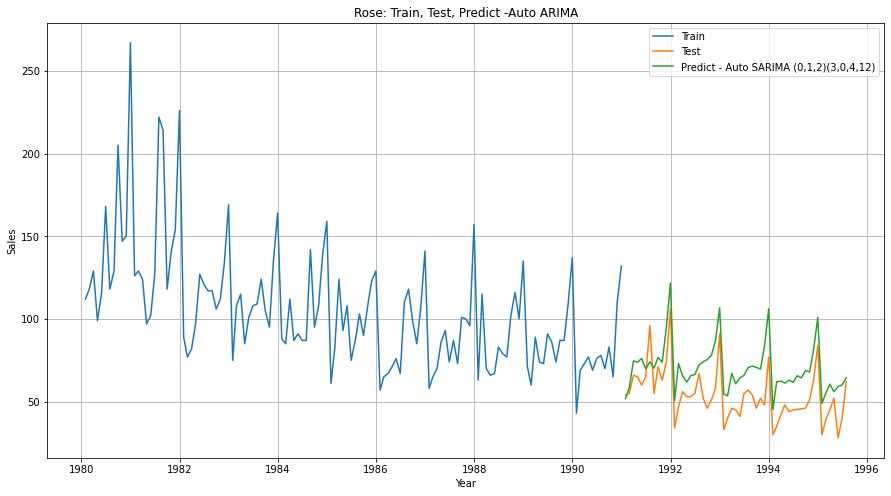

In [226]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df2['Rose'], label='Train')
plt.plot(SARIMA_test_df2['Rose'], label='Test')
plt.plot(SARIMA_test_df2['Predict'], label='Predict - Auto SARIMA (0,1,2)(3,0,4,12)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Rose: Train, Test, Predict -Auto ARIMA")
plt.legend(loc = 'best')
plt.grid();

In [227]:
# Lets calculate the RMSE score
model_SARIMA_RMSE = mean_squared_error(SARIMA_test_df2['Rose'],SARIMA_test_df2['Predict'],squared = False);
model_SARIMA_RMSE

18.479344474798747

In [228]:
# Lets store the model and RMSE value in results dataset
results_SARIMA = pd.DataFrame({'Test_RMSE': model_SARIMA_RMSE},
                                index = ['(0,1,2)(3,0,4,12)_SARIMA_auto'])
results_df2 = pd.concat([results_df2,results_SARIMA])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574
2_point_MovingAverage                               11.529279
(2,1,3)_ARIMA_auto                                  36.817429
(0,1,2)(3,0,4,12)_SARIMA_auto                       18.479344

## <font color='blue'>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</font>

### 7.1 ARIMA model

### <font color='violet'> ---- Sparkling Dataset</font>

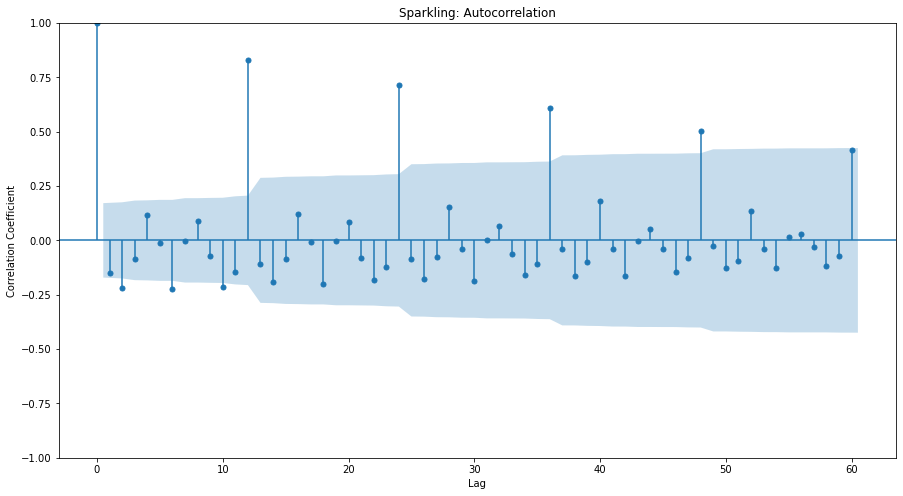

In [229]:
# Lets first plot the auto correlation function on Sparkling datatset. We have seen that data is stationary at 
# first order of differencing, hence d = 1
plot_acf(train_df1.diff().dropna(),alpha=0.05,lags = np.arange(0,61,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 0, hence in the ARIMA model visually q = 0


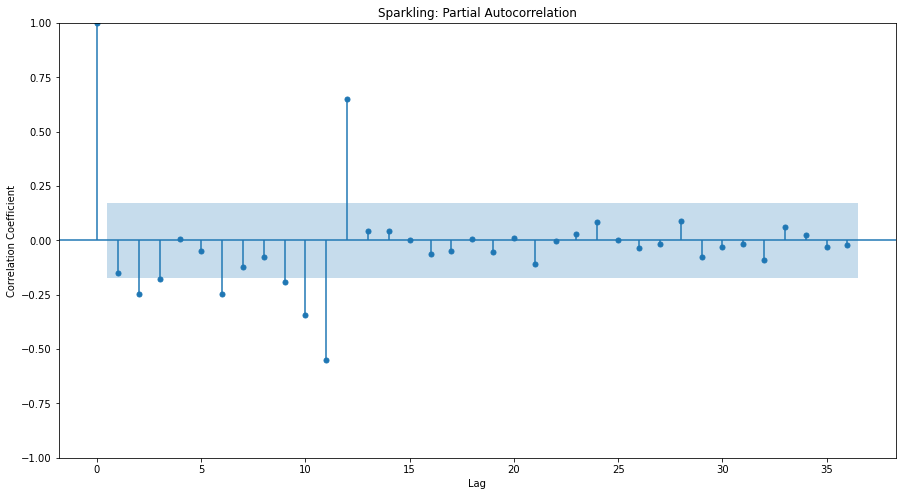

In [230]:
# Next lets plot the partial auto correlation function on Sparkling datatset.
plot_pacf(train_df1.diff().dropna(),alpha=0.05,method='ywmle',lags = np.arange(0,37,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 0, hence in the ARIMA model, visually  p = 0

In [231]:
# So for p=0,d=1 and q=0, the ARIMA model gives the best performance. Lets create the model and check the summary
model_ARIMA = ARIMA(train_df1['Sparkling'],order=(0,1,0)).fit()
print(model_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 13 Feb 2022   AIC                           2267.663
Time:                        20:57:47   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

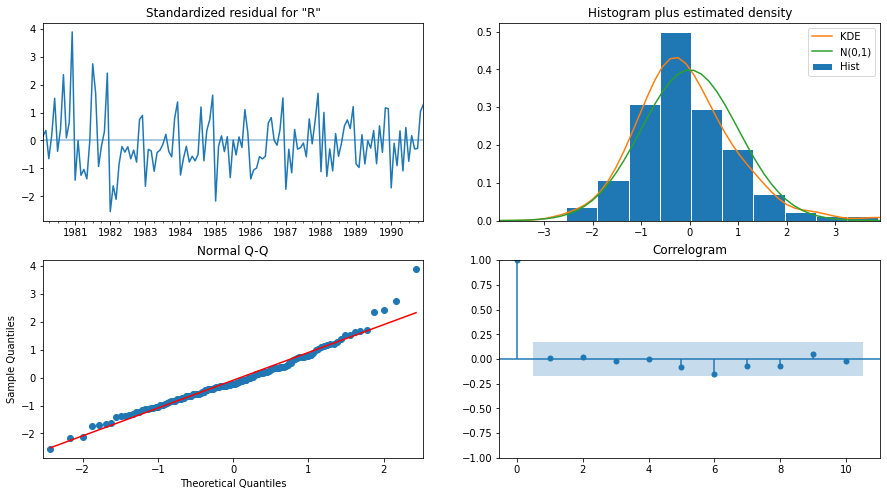

In [232]:
# Lets plot the ARIMA diagnostics plot
model_auto_ARIMA.plot_diagnostics();

In [233]:
# Using the above model lets forecast on the test set
ARIMA_test_df1 = test_df1.copy();
ARIMA_test_df1['Predict'] = model_ARIMA.forecast(steps=len(test_df1))
ARIMA_test_df1.head()

Sparkling  Predict
Time_Series                    
1991-01-31        1902   6047.0
1991-02-28        2049   6047.0
1991-03-31        1874   6047.0
1991-04-30        1279   6047.0
1991-05-31        1432   6047.0

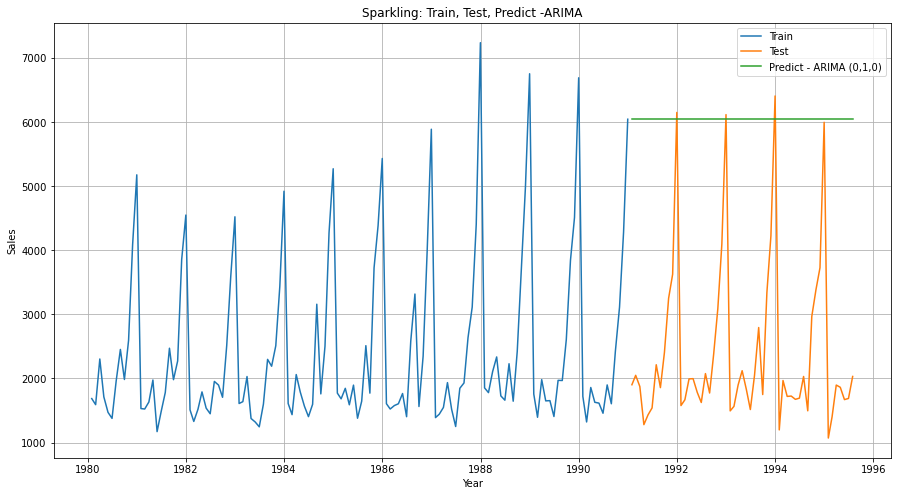

In [234]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df1['Sparkling'], label='Train')
plt.plot(ARIMA_test_df1['Sparkling'], label='Test')
plt.plot(ARIMA_test_df1['Predict'], label='Predict - ARIMA (0,1,0)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Sparkling: Train, Test, Predict -ARIMA")
plt.legend(loc = 'best')
plt.grid();

In [235]:
# Lets calculate the RMSE score
model_ARIMA_RMSE = mean_squared_error(ARIMA_test_df1['Sparkling'],ARIMA_test_df1['Predict'],squared = False);
model_ARIMA_RMSE

3864.2793518443914

In [236]:
# Lets store the model and RMSE value in results dataset
results_ARIMA = pd.DataFrame({'Test_RMSE': model_ARIMA_RMSE},
                                index = ['(0,1,0)_ARIMA'])
results_df1 = pd.concat([results_df1,results_ARIMA])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804
2_point_MovingAverage                                813.400684
(2,1,2)_ARIMA_auto                                  1299.979569
(2,1,2)(2,0,4,12)_SARIMA_auto                        487.388551
(0,1,0)_ARIMA                                       3864.279352

### <font color='violet'> ---- Rose Dataset</font>

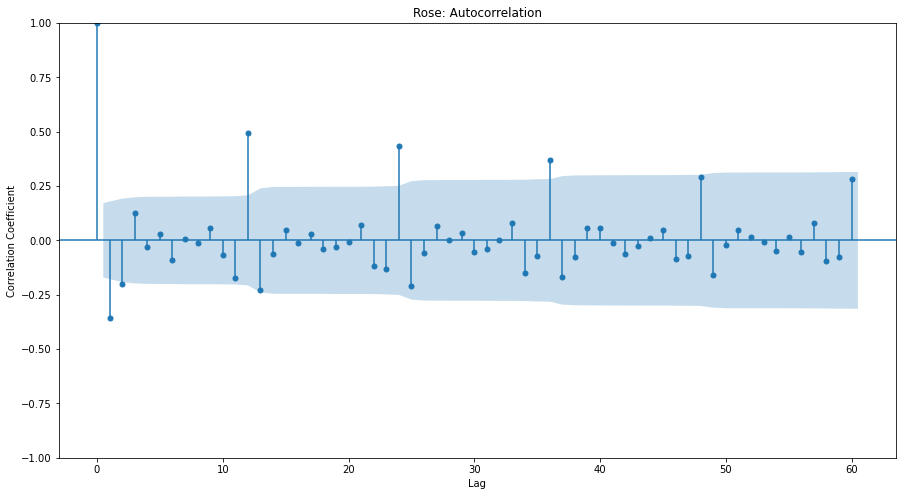

In [237]:
# Lets first plot the auto correlation function on Rose datatset. We have seen that data is stationary at 
# first order of differencing, hence d = 1
plot_acf(train_df2.diff().dropna(),alpha=0.05,lags = np.arange(0,61,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model visually q = 2


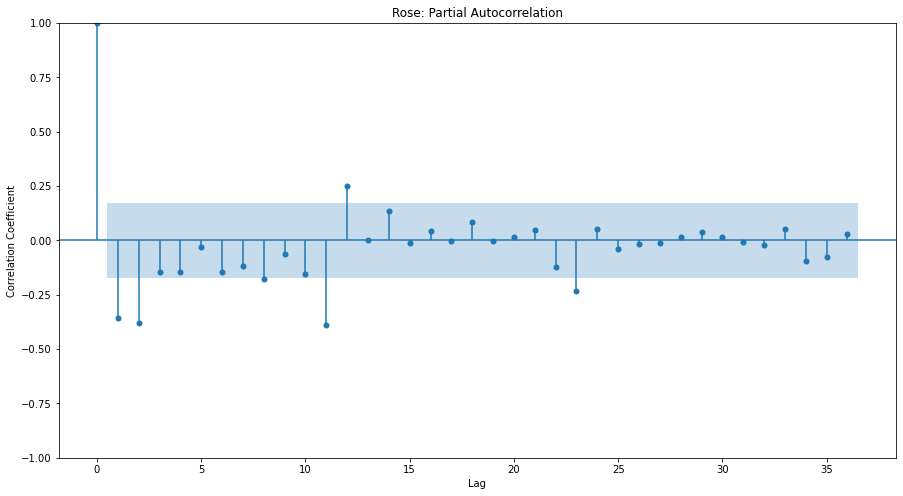

In [238]:
# Next lets plot the partial auto correlation function on Rose datatset.
plot_pacf(train_df2.diff().dropna(),alpha=0.05,method='ywmle',lags = np.arange(0,37,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model, visually  p = 2

In [239]:
# So for p=2,d=1 and q=2, the ARIMA model gives the best performance. Lets create the model and check the summary
model_ARIMA = ARIMA(train_df2['Rose'],order=(2,1,2)).fit()
print(model_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 13 Feb 2022   AIC                           1281.871
Time:                        20:57:50   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

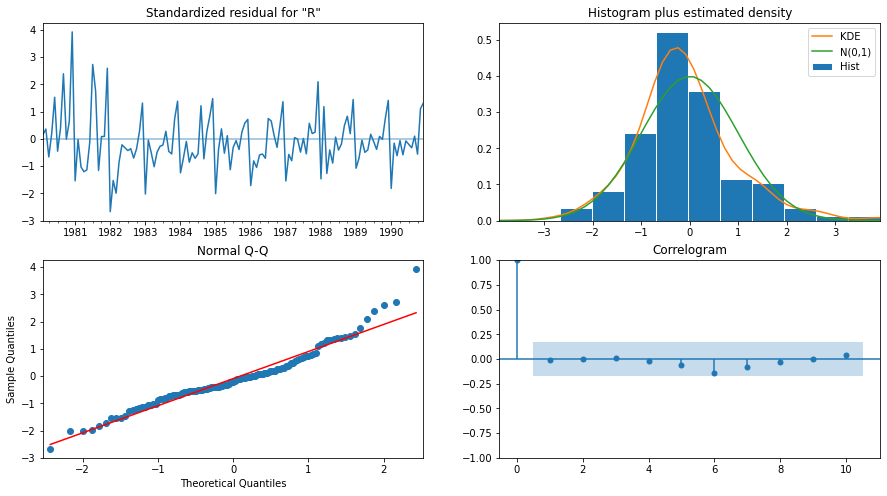

In [240]:
# Lets plot the ARIMA diagnostics plot
model_ARIMA.plot_diagnostics();

In [241]:
# Using the above model lets forecast on the test set
ARIMA_test_df2 = test_df2.copy();
ARIMA_test_df2['Predict'] = model_ARIMA.forecast(steps=len(test_df2))
ARIMA_test_df2.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  91.159512
1991-02-28   55.0  85.314628
1991-03-31   66.0  87.962468
1991-04-30   65.0  86.759563
1991-05-31   60.0  87.306038

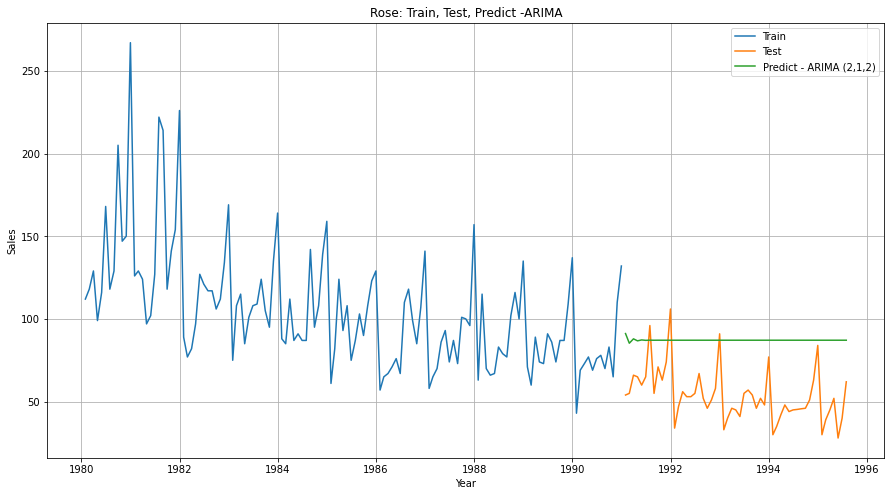

In [242]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df2['Rose'], label='Train')
plt.plot(ARIMA_test_df2['Rose'], label='Test')
plt.plot(ARIMA_test_df2['Predict'], label='Predict - ARIMA (2,1,2)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Rose: Train, Test, Predict -ARIMA")
plt.legend(loc = 'best')
plt.grid();

In [243]:
# Lets calculate the RMSE score
model_ARIMA_RMSE = mean_squared_error(ARIMA_test_df2['Rose'],ARIMA_test_df2['Predict'],squared = False);
model_ARIMA_RMSE

36.87120264924714

In [244]:
# Lets store the model and RMSE value in results dataset
results_ARIMA = pd.DataFrame({'Test_RMSE': model_ARIMA_RMSE},
                                index = ['(2,1,2)_ARIMA'])
results_df2 = pd.concat([results_df2,results_ARIMA])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574
2_point_MovingAverage                               11.529279
(2,1,3)_ARIMA_auto                                  36.817429
(0,1,2)(3,0,4,12)_SARIMA_auto                       18.479344
(2,1,2)_ARIMA                                       36.871203

### 7.2 SARIMA model

### <font color='violet'> ---- Sparkling Dataset</font>

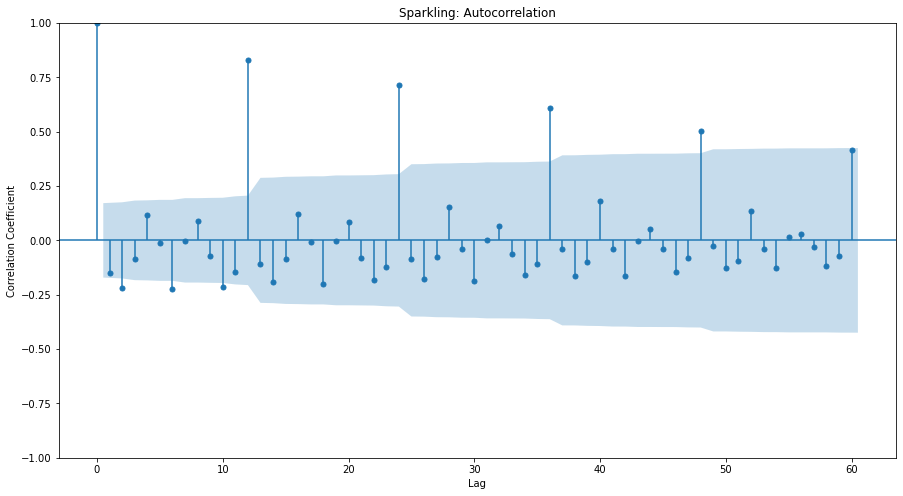

In [245]:
# Lets first plot the auto correlation function on Sparkling datatset. We have seen that data is stationary at 
# first order of differencing, hence d = 1
plot_acf(train_df1.diff().dropna(),alpha=0.05,lags = np.arange(0,61,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 0, hence in the ARIMA model visually q = 0
#### Also we can see that the data pattern repeats itself after lag of 12, hence seasonality is 12. If we see multiples of 12, we can 
#### see that the ACF cuts off below 95% CI after lag 48, i.e. after 4 occurences, hence Q = 4


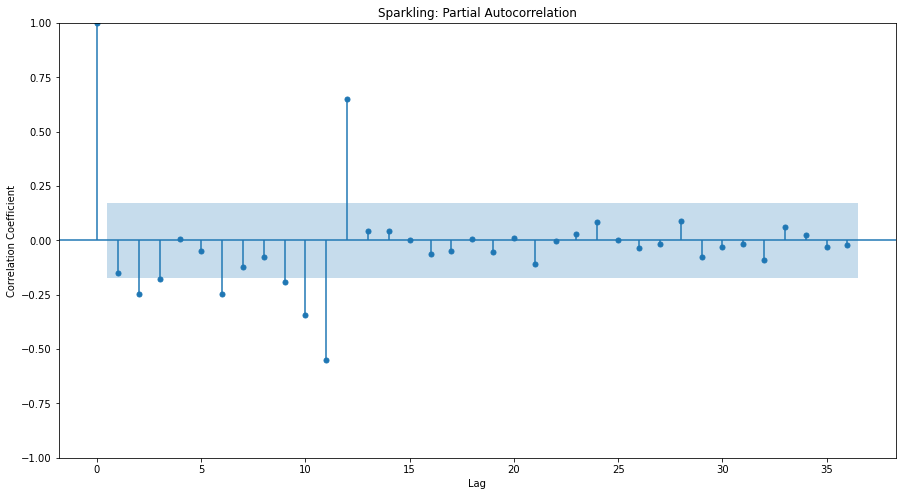

In [246]:
# Next lets plot the partial auto correlation function on Sparkling datatset.
plot_pacf(train_df1.diff().dropna(),alpha=0.05,method='ywmle',lags = np.arange(0,37,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Sparkling: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 0, hence in the ARIMA model, visually  p = 0
#### With seasonality as 12, we can see that PACF cuts off below 95% CI, after lag 12, i.e. after first occurence, hence P = 1

In [247]:
# So for p=0,d=1,q=0,P=1,D=0,Q=4, the SARIMA model gives the best performance. Lets create the model and check the summary
model_SARIMA = sm.tsa.statespace.SARIMAX(train_df1['Sparkling'].values,
                                            order=(0,1,0),
                                            seasonal_order=(1,0,4,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False).fit()
print(model_SARIMA.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                             y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3, 4], 12)   Log Likelihood                -632.314
Date:                                       Sun, 13 Feb 2022   AIC                           1276.628
Time:                                               20:57:56   BIC                           1291.068
Sample:                                                    0   HQIC                          1282.426
                                                       - 132                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.0333     

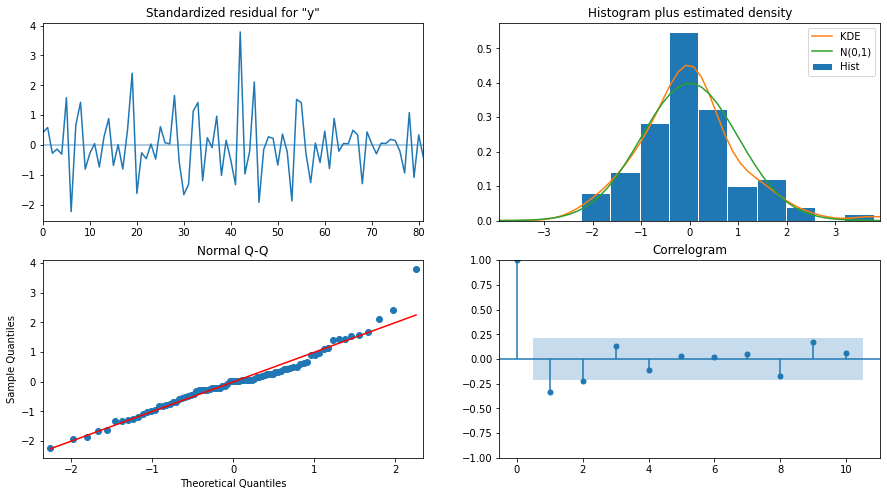

In [248]:
# Lets plot the SARIMA diagnostics plot
model_SARIMA.plot_diagnostics();

In [249]:
# Using the above model lets forecast on the test set
SARIMA_test_df1 = test_df1.copy();
SARIMA_test_df1['Predict'] = model_SARIMA.forecast(steps=len(test_df1))
SARIMA_test_df1.head()

Sparkling      Predict
Time_Series                        
1991-01-31        1902  1092.070849
1991-02-28        2049   784.815113
1991-03-31        1874  1286.337100
1991-04-30        1279  1016.410548
1991-05-31        1432  1009.884402

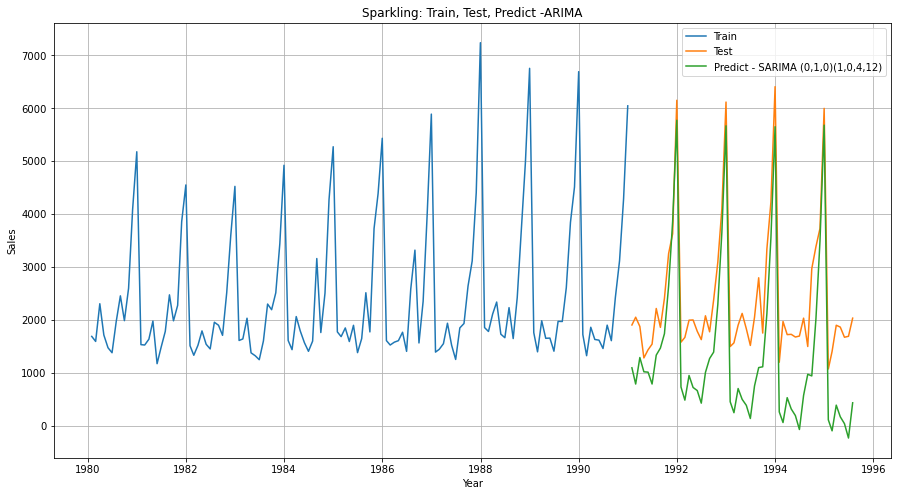

In [250]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df1['Sparkling'], label='Train')
plt.plot(SARIMA_test_df1['Sparkling'], label='Test')
plt.plot(SARIMA_test_df1['Predict'], label='Predict - SARIMA (0,1,0)(1,0,4,12)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Sparkling: Train, Test, Predict -ARIMA")
plt.legend(loc = 'best')
plt.grid();

In [251]:
# Lets calculate the RMSE score
model_SARIMA_RMSE = mean_squared_error(SARIMA_test_df1['Sparkling'],SARIMA_test_df1['Predict'],squared = False);
model_SARIMA_RMSE

1159.0083426709882

In [252]:
# Lets store the model and RMSE value in results dataset
results_SARIMA = pd.DataFrame({'Test_RMSE': model_SARIMA_RMSE},
                                index = ['(0,1,0)(1,0,4,12)_SARIMA'])
results_df1 = pd.concat([results_df1,results_SARIMA])
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804
2_point_MovingAverage                                813.400684
(2,1,2)_ARIMA_auto                                  1299.979569
(2,1,2)(2,0,4,12)_SARIMA_auto                        487.388551
(0,1,0)_ARIMA                                       3864.279352
(0,1,0)(1,0,4,12)_SARIMA                            1159.008343

### <font color='violet'> ---- Rose Dataset</font>

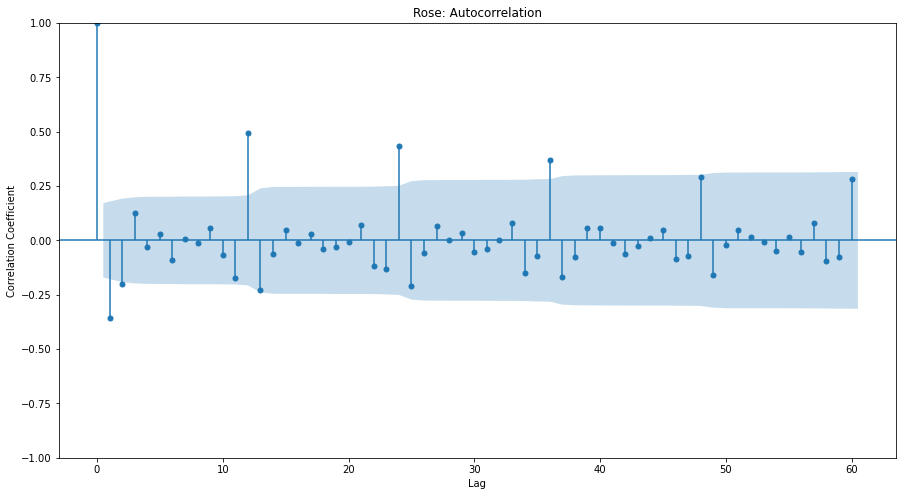

In [253]:
# Lets first plot the auto correlation function on Rose datatset. We have seen that data is stationary at 
# first order of differencing, hence d = 1
plot_acf(train_df2.diff().dropna(),alpha=0.05,lags = np.arange(0,61,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Autocorrelation");

#### We can see that the ACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model visually q = 2
#### Also we can see that the data pattern repeats itself after lag of 12, hence seasonality is 12. If we see multiples of 12, we can 
#### see that the ACF cuts off below 95% CI after lag 36, i.e. after 3 occurences, hence Q = 3

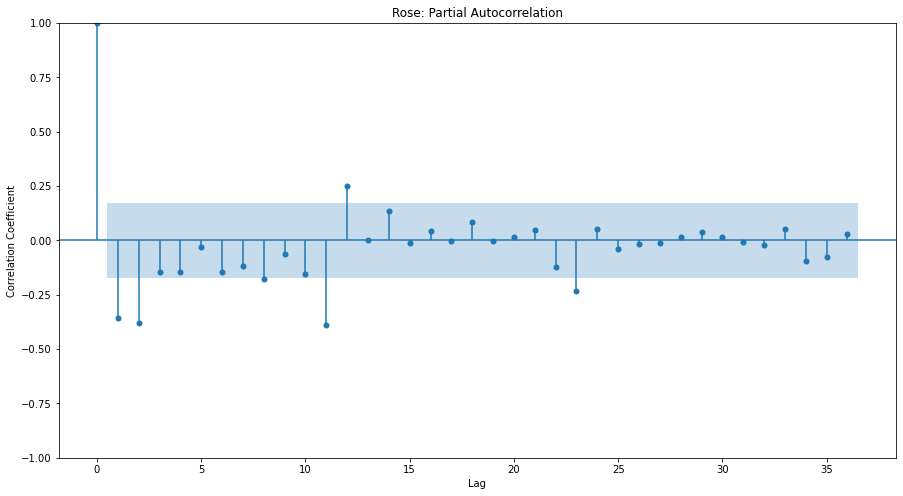

In [254]:
# Next lets plot the partial auto correlation function on Rose datatset.
plot_pacf(train_df2.diff().dropna(),alpha=0.05,method='ywmle',lags = np.arange(0,37,1));
plt.xlabel("Lag");
plt.ylabel("Correlation Coefficient");
plt.title("Rose: Partial Autocorrelation");

#### We can see that the PACF cuts off below 95% confidence interval after lag of 2, hence in the ARIMA model, visually  p = 2
#### With seasonality as 12, we can see that PACF cuts off below 95% CI, after lag 12, i.e. after first occurence, hence P = 1

In [255]:
# So for p=2,d=1,q=2,P=1,D=0,Q=3, the SARIMA model gives the best performance. Lets create the model and check the summary
model_SARIMA = sm.tsa.statespace.SARIMAX(train_df2['Rose'].values,
                                            order=(2,1,2),
                                            seasonal_order=(1,0,3,12)).fit(maxiter=500)
print(model_SARIMA.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -593.906
Date:                                    Sun, 13 Feb 2022   AIC                           1205.813
Time:                                            20:58:01   BIC                           1231.690
Sample:                                                 0   HQIC                          1216.328
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5020      0.194     -2.582      0

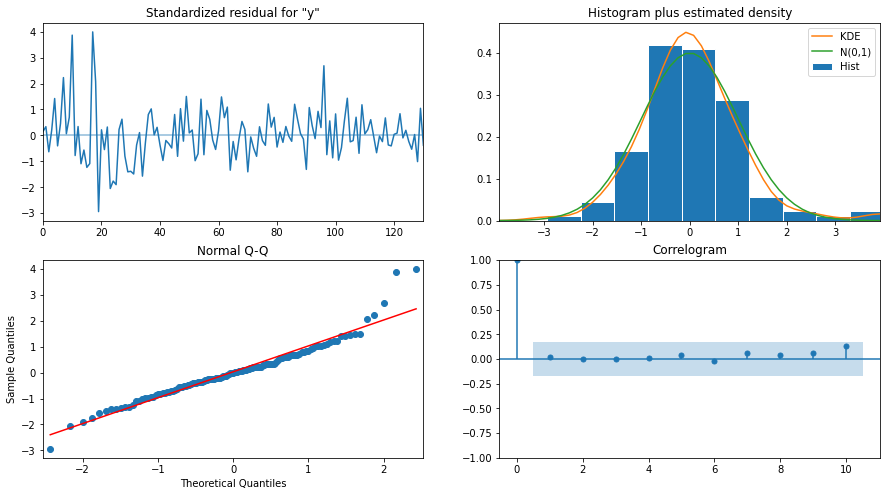

In [256]:
# Lets plot the ARIMA diagnostics plot
model_SARIMA.plot_diagnostics();

In [257]:
# Using the above model lets forecast on the test set
SARIMA_test_df2 = test_df2.copy();
SARIMA_test_df2['Predict'] = model_SARIMA.forecast(steps=len(test_df2))
SARIMA_test_df2.head()

Rose    Predict
Time_Series                 
1991-01-31   54.0  41.034658
1991-02-28   55.0  60.270925
1991-03-31   66.0  65.480501
1991-04-30   65.0  58.193135
1991-05-31   60.0  61.751357

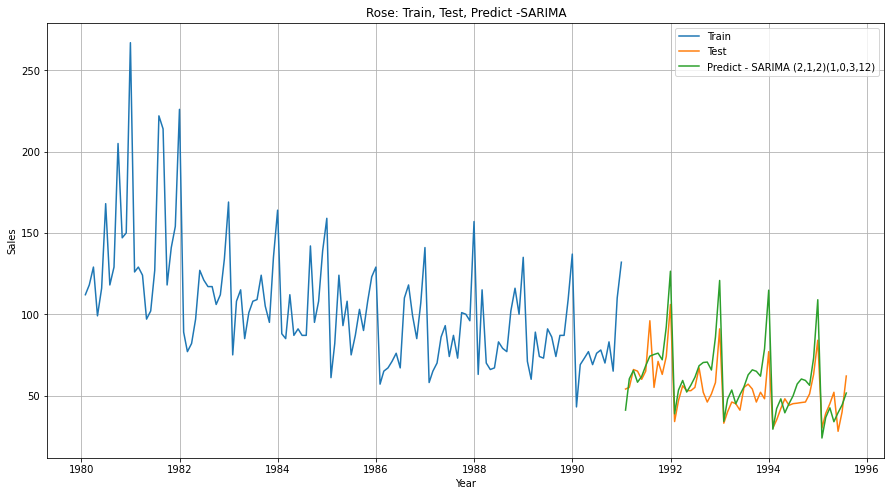

In [258]:
# Lets plot the train, test and prediction of auto ARIMA model.
plt.plot(train_df2['Rose'], label='Train')
plt.plot(SARIMA_test_df2['Rose'], label='Test')
plt.plot(SARIMA_test_df2['Predict'], label='Predict - SARIMA (2,1,2)(1,0,3,12)')
plt.xlabel('Year');
plt.ylabel('Sales');
plt.title("Rose: Train, Test, Predict -SARIMA")
plt.legend(loc = 'best')
plt.grid();

In [259]:
# Lets calculate the RMSE score
model_SARIMA_RMSE = mean_squared_error(SARIMA_test_df2['Rose'],SARIMA_test_df2['Predict'],squared = False);
model_SARIMA_RMSE

13.660427723818085

In [260]:
# Lets store the model and RMSE value in results dataset
results_SARIMA = pd.DataFrame({'Test_RMSE': model_SARIMA_RMSE},
                                index = ['(2,1,2)(1,0,3,12)_SARIMA'])
results_df2 = pd.concat([results_df2,results_SARIMA])
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574
2_point_MovingAverage                               11.529279
(2,1,3)_ARIMA_auto                                  36.817429
(0,1,2)(3,0,4,12)_SARIMA_auto                       18.479344
(2,1,2)_ARIMA                                       36.871203
(2,1,2)(1,0,3,12)_SARIMA                            13.660428

## <font color='blue'>8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</font>

### <font color='violet'> ---- Sparkling Dataset</font>

In [261]:
# Lets look at the results of various models created on Sparkling dataset
results_df1

Test_RMSE
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
LinearRegression                                    1389.135175
NaiveForecast                                       3864.279352
SimpleAverage                                       1275.081804
2_point_MovingAverage                                813.400684
(2,1,2)_ARIMA_auto                                  1299.979569
(2,1,2)(2,0,4,12)_SARIMA_auto                        487.388551
(0,1,0)_ARIMA                                       3864.279352
(0,1,0)(1,0,4,12)_SARIMA                            1159.008343

In [262]:
# Lets order the Test_RMSE in ascending order and find the model with best performance
results_df1.sort_values('Test_RMSE')

Test_RMSE
alpha=0.4_beta=0.1_gamma=0.2_TripleExponentialS...   317.434302
(2,1,2)(2,0,4,12)_SARIMA_auto                        487.388551
2_point_MovingAverage                                813.400684
(0,1,0)(1,0,4,12)_SARIMA                            1159.008343
SimpleAverage                                       1275.081804
(2,1,2)_ARIMA_auto                                  1299.979569
alpha=0.0496_SimpleExponentialSmoothing             1316.035487
LinearRegression                                    1389.135175
alpha=0.1_beta=0.1_DoubleExponentialSmoothing       1778.564670
NaiveForecast                                       3864.279352
(0,1,0)_ARIMA                                       3864.279352

#### For sparkling dataset we have the best model as Triple Exponential Smoothing (Holt-Winter's forecasting) with 
#### alpha = 0.4, beta = 0.1 and gamma = 0.2

### <font color='violet'> ---- Rose Dataset</font>

In [263]:
# Lets look at the results of various models created on Rose dataset
results_df2

Test_RMSE
alpha=0.0987_SimpleExponentialSmoothing             36.796233
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
LinearRegression                                    15.268989
NaiveForecast                                       79.718776
SimpleAverage                                       53.460574
2_point_MovingAverage                               11.529279
(2,1,3)_ARIMA_auto                                  36.817429
(0,1,2)(3,0,4,12)_SARIMA_auto                       18.479344
(2,1,2)_ARIMA                                       36.871203
(2,1,2)(1,0,3,12)_SARIMA                            13.660428

In [264]:
# Lets order the Test_RMSE in ascending order and find the model with best performance
results_df2.sort_values('Test_RMSE')

Test_RMSE
alpha=0.1_beta=0.2_gamma=0.1_TripleExponentialS...   9.223453
2_point_MovingAverage                               11.529279
(2,1,2)(1,0,3,12)_SARIMA                            13.660428
LinearRegression                                    15.268989
alpha=0.0175_beta=0.00003_DoubleExponentialSmoo...  15.707085
(0,1,2)(3,0,4,12)_SARIMA_auto                       18.479344
alpha=0.0987_SimpleExponentialSmoothing             36.796233
(2,1,3)_ARIMA_auto                                  36.817429
(2,1,2)_ARIMA                                       36.871203
SimpleAverage                                       53.460574
NaiveForecast                                       79.718776

#### For Rose dataset we have the best model as Triple Exponential Smoothing (Holt-Winter's forecasting) with 
#### alpha = 0.1, beta = 0.2 and gamma = 0.1

## <font color='blue'>9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</font>

### <font color='violet'> ---- Sparkling Dataset</font>

In [265]:
# We have seen that the best model as Triple Exponential Smoothing (Holt-Winter's forecasting) with 
# alpha = 0.4, beta = 0.1 and gamma = 0.2. Lets build the model on the complete data
TES = ExponentialSmoothing(df1['Sparkling'],trend='additive',seasonal='multiplicative',freq='M');
model_TES = TES.fit(smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)

In [266]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
TES_predict = model_TES.forecast(steps = 12)

pred_df1 = pd.DataFrame({'lower_CI':TES_predict - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':TES_predict,
                          'upper_ci': TES_predict + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df1

lower_CI   prediction     upper_ci
1995-08-31  1329.842420  2088.425429  2847.008439
1995-09-30  1855.456792  2614.039802  3372.622811
1995-10-31  2699.393185  3457.976195  4216.559204
1995-11-30  3572.112868  4330.695877  5089.278887
1995-12-31  5836.561291  6595.144301  7353.727310
1996-01-31   792.185485  1550.768494  2309.351503
1996-02-29  1073.699166  1832.282175  2590.865185
1996-03-31  1316.339496  2074.922505  2833.505515
1996-04-30  1243.832684  2002.415693  2760.998702
1996-05-31  1063.045990  1821.629000  2580.212009
1996-06-30   949.903714  1708.486723  2467.069733
1996-07-31  1431.596429  2190.179438  2948.762447

In [267]:
# Lets calculate the RMSE value of the model.
df1_RMSE = mean_squared_error(df1['Sparkling'],model_TES.fittedvalues,squared=False)
print("The RMSE value for the best optimal model on Sparkling dataset is {}".format(df1_RMSE));

The RMSE value for the best optimal model on Sparkling dataset is 386.42148250472866


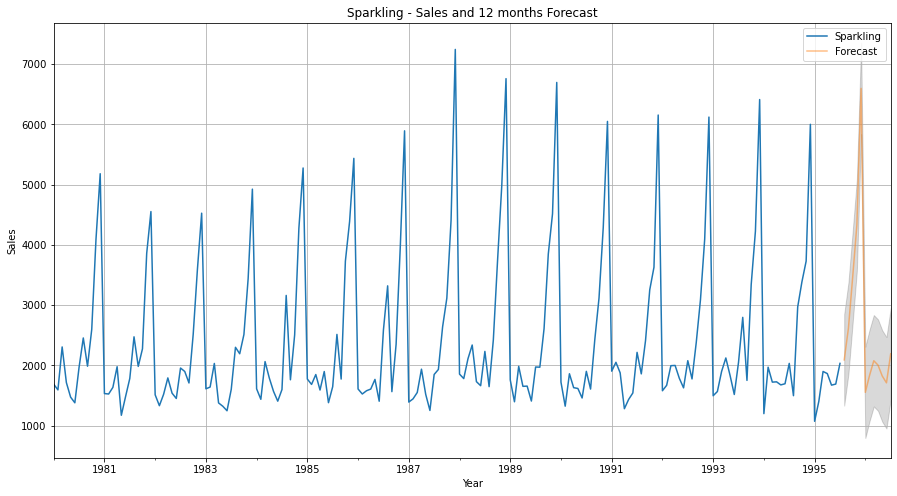

In [268]:
# Lets plot a graph for the above predicted value
axis = df1.plot(label='Sales', figsize=(15,8));
pred_df1['prediction'].plot(ax=axis, label='Forecast', alpha=0.5);
axis.fill_between(pred_df1.index, pred_df1['lower_CI'], pred_df1['upper_ci'], color='k',alpha = .15);
axis.set_xlabel('Year');
axis.set_ylabel('Sales');
plt.title("Sparkling - Sales and 12 months Forecast");
plt.legend(loc='best');
plt.grid();
plt.show();

### <font color='violet'> ---- Rose Dataset</font>

In [269]:
# We have seen that the best model as Triple Exponential Smoothing (Holt-Winter's forecasting) with 
# alpha = 0.1, beta = 0.2 and gamma = 0.1. Lets build the model on the complete data
TES = ExponentialSmoothing(df2['Rose'],trend='additive',seasonal='multiplicative',freq='M');
model_TES = TES.fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.1,optimized=False,use_brute=True)

In [270]:
# Lets calculate the RMSE value of the model.
df2_RMSE = mean_squared_error(df2['Rose'],model_TES.fittedvalues,squared=False)
print("The RMSE value for the best optimal model on Rose dataset is {}".format(df2_RMSE));

The RMSE value for the best optimal model on Rose dataset is 17.11548594699025


In [271]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
TES_predict = model_TES.forecast(steps = 12)

pred_df2 = pd.DataFrame({'lower_CI':TES_predict - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':TES_predict,
                          'upper_ci': TES_predict + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df2

lower_CI  prediction    upper_ci
1995-08-31  16.559925   50.193546   83.827168
1995-09-30  16.282068   49.915689   83.549310
1995-10-31  16.722976   50.356597   83.990219
1995-11-30  25.376959   59.010580   92.644201
1995-12-31  48.538231   82.171853  115.805474
1996-01-31   0.168590   33.802212   67.435833
1996-02-29   7.099903   40.733524   74.367146
1996-03-31  12.503737   46.137358   79.770980
1996-04-30  11.206335   44.839956   78.473578
1996-05-31   9.681486   43.315107   76.948729
1996-06-30  14.119145   47.752766   81.386388
1996-07-31  21.402491   55.036112   88.669733

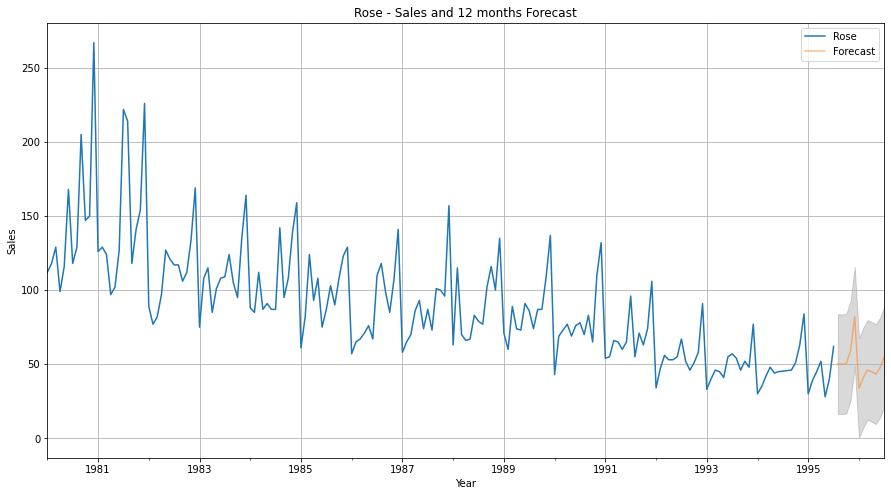

In [272]:
# Lets plot a graph for the above predicted value
axis = df2.plot(label='Sales', figsize=(15,8));
pred_df2['prediction'].plot(ax=axis, label='Forecast', alpha=0.5);
axis.fill_between(pred_df2.index, pred_df2['lower_CI'], pred_df2['upper_ci'], color='k',alpha = .15);
axis.set_xlabel('Year');
axis.set_ylabel('Sales');
plt.legend(loc='best');
plt.title("Rose - Sales and 12 months Forecast");
plt.grid();
plt.show();